# TMDB Box Office Prediction EDA + ML

![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)
[image-source](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

## *Kernel in progress, is continuously being updated and extended*

## Preparations - Prerequisities

![](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)
[image-source](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)

### Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
train_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\train.csv')
test_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\test.csv')
sub_df = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\sample_submission.csv')

### Inspecting the train set

In [3]:
train_df.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

We have a variaty of data, numerical, categorical and even lists of json formats.

In [4]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [5]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
test_df.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

## Exploratory Data Analysis

![](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)
[image-source](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)

In [7]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

So many columns and features to investigate, lets start by inspecting one by one each feature.

### Univariate Analysis

#### Revenue
Our target variable that must be predicted

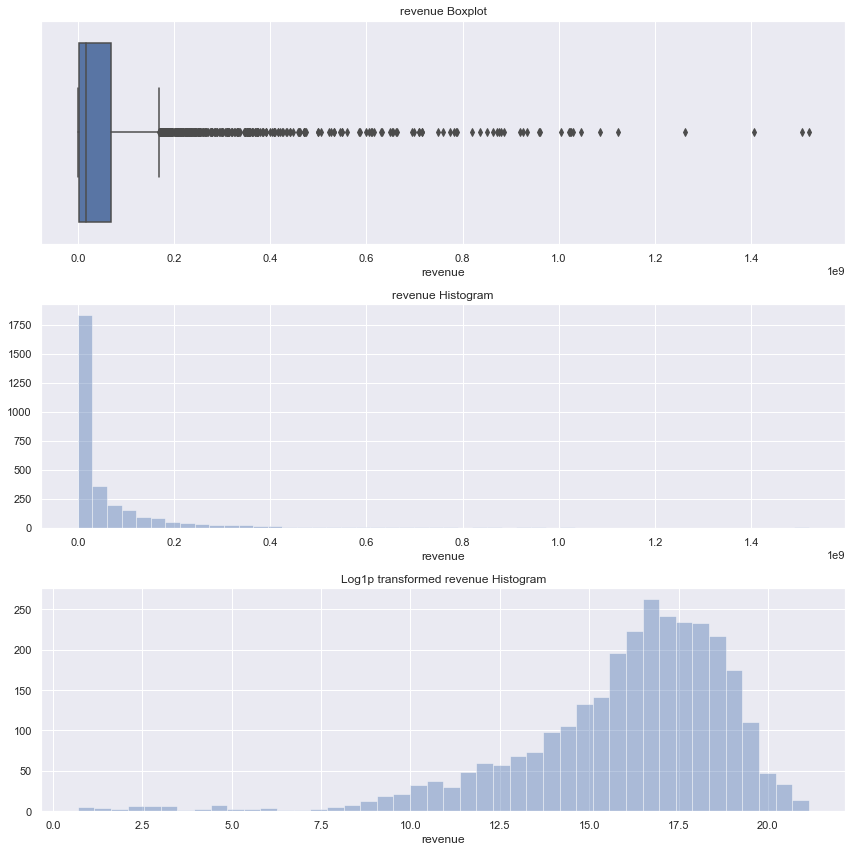

In [9]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc = {'figure.figsize':(12,8)})

sns.boxplot(x = train_df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")

sns.distplot(a = train_df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")

sns.distplot(a = np.log1p(train_df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")

f.tight_layout()

In [10]:
train_df["log_revenue"] = np.log1p(train_df.revenue)

#### Title
Lets generate a wordcloud

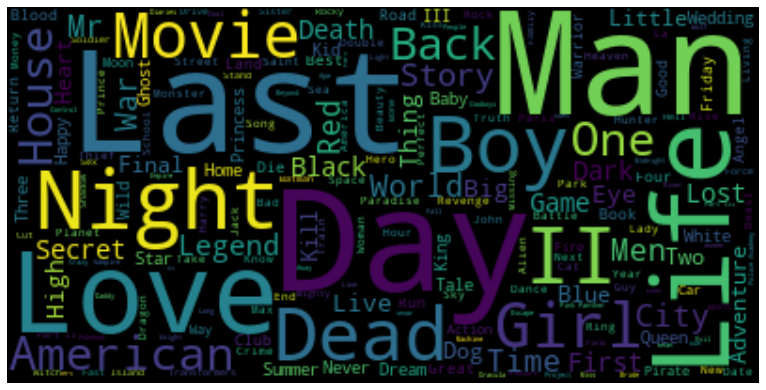

In [11]:
wordcloud = WordCloud().generate(train_df.title.to_string())

sns.set(rc = {'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets see the length of each movie

In [12]:
train_df["title"] = train_df["title"].fillna("")
test_df["title"] = test_df["title"].fillna("")

train_df["title_len"] = train_df["title"].apply(len)
test_df["title_len"] = test_df["title"].apply(len)

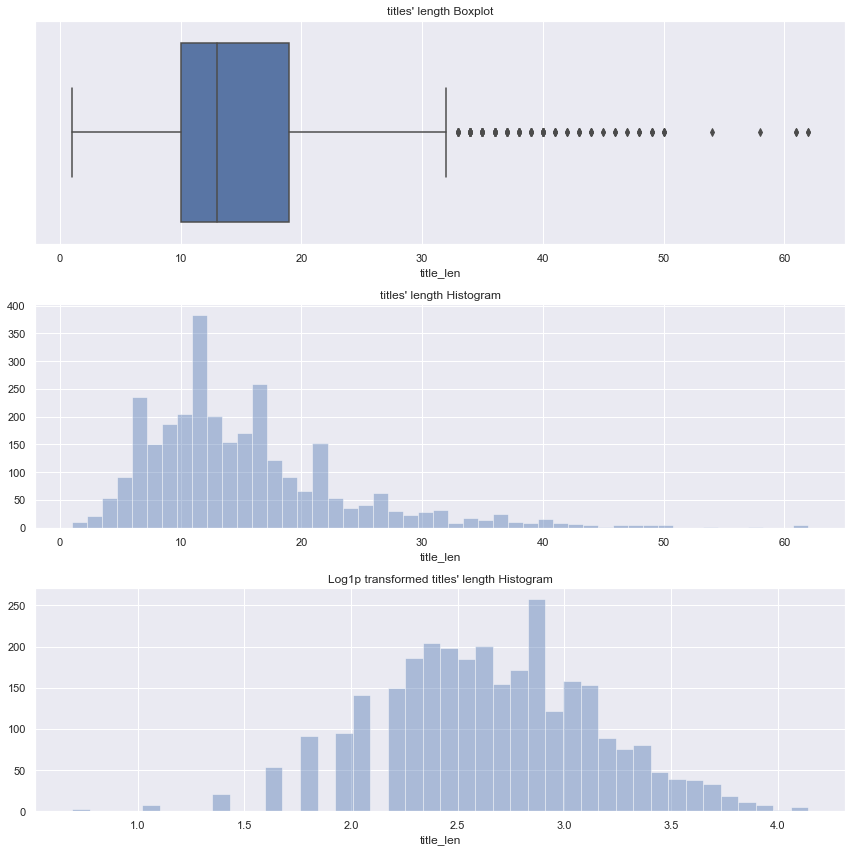

In [14]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")

sns.distplot(a = train_df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")

sns.distplot(a = np.log1p(train_df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")

f.tight_layout()

In [15]:
train_df["log_title_len"] = np.log1p(train_df.title_len)
test_df["log_title_len"] = np.log1p(test_df.title_len)

#### Overview
Lets visualize movies' overview wordcloud

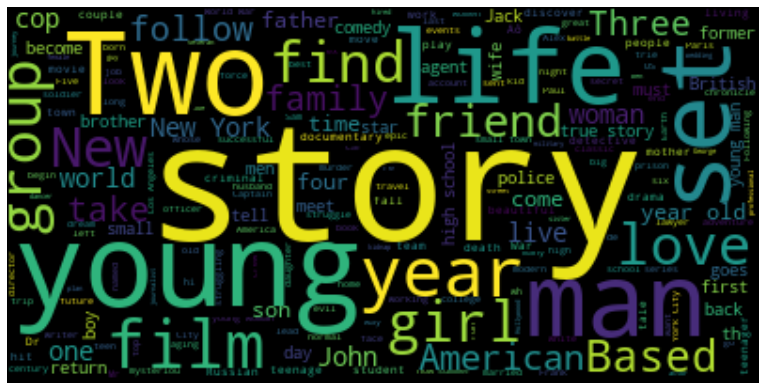

In [16]:
wordcloud = WordCloud().generate(train_df.overview.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inspecting movies' overview length

In [17]:
train_df["overview"] = train_df["overview"].fillna("")
test_df["overview"] = test_df["overview"].fillna("")

train_df["overview_len"] = train_df["overview"].apply(len)
test_df["overview_len"] = test_df["overview"].apply(len)

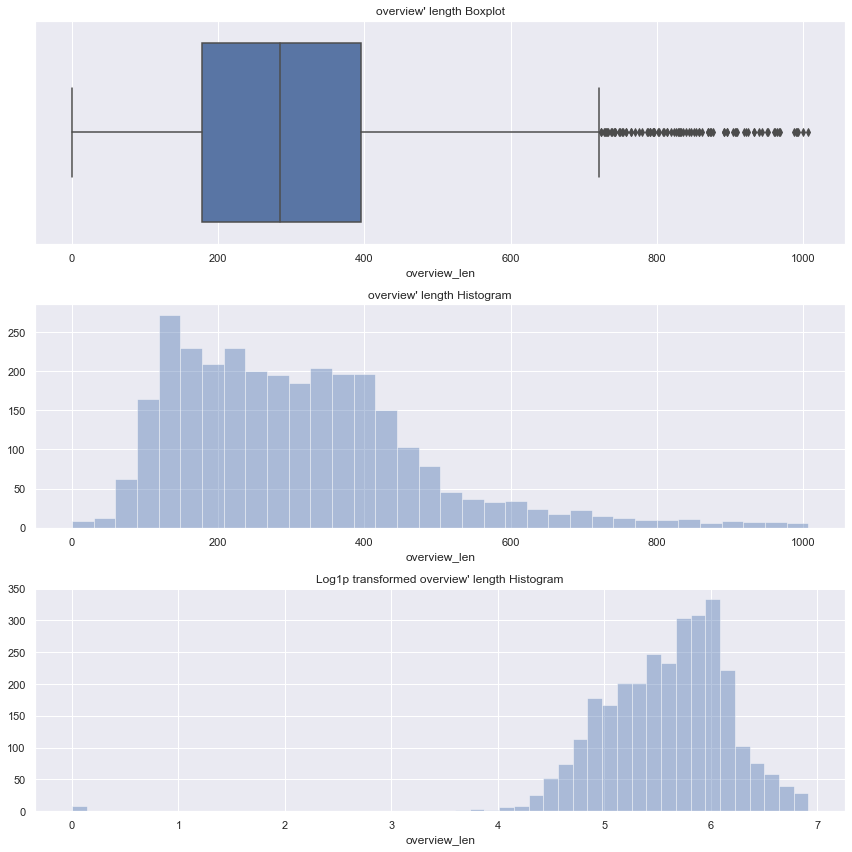

In [18]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")

sns.distplot(a = train_df.overview_len, kde = False, ax = ax[1])
ax[1].set_title("overview' length Histogram")

sns.distplot(a = np.log1p(train_df.overview_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed overview' length Histogram")

f.tight_layout()

In [19]:
train_df["log_overview_len"] = np.log1p(train_df.overview_len)
test_df["log_overview_len"] = np.log1p(test_df.overview_len)

#### Tagline

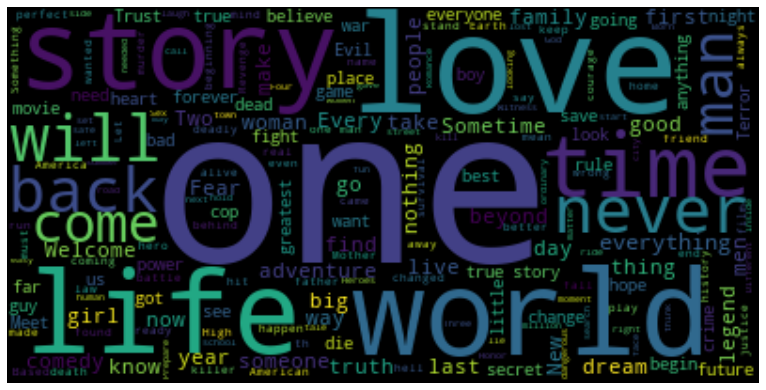

In [22]:
wordcloud = WordCloud().generate(train_df.tagline.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
train_df["tagline"] = train_df["tagline"].fillna("")
test_df["tagline"] = test_df["tagline"].fillna("")

train_df["tagline_len"] = train_df["tagline"].apply(len)
test_df["tagline_len"] = test_df["tagline"].apply(len)

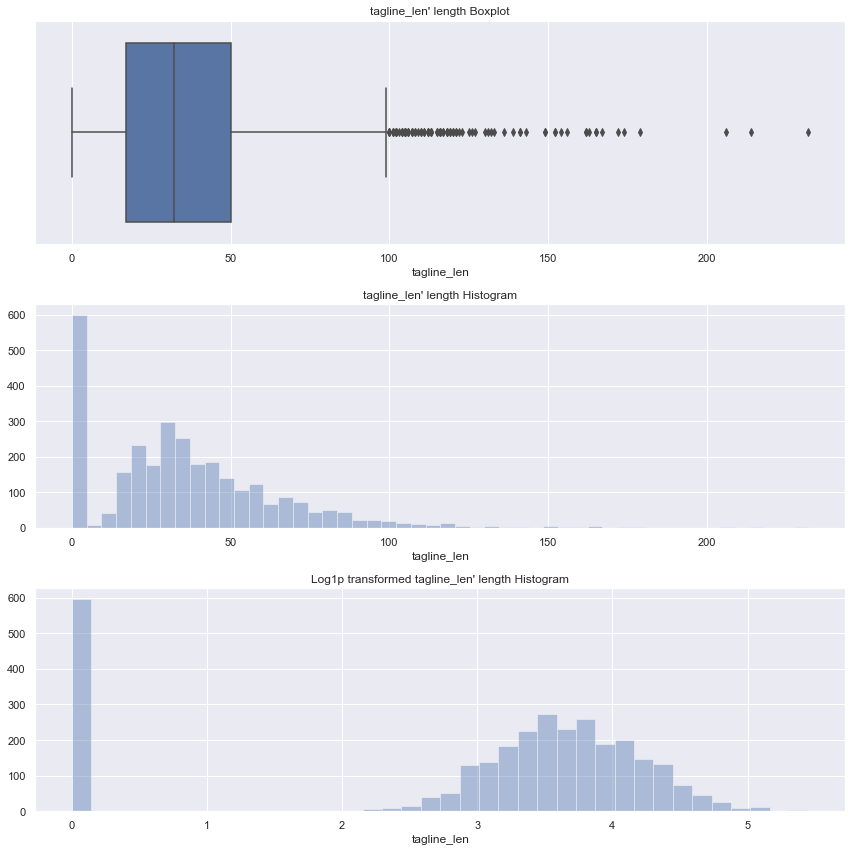

In [23]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.tagline_len, ax = ax[0])
ax[0].set_title("tagline_len' length Boxplot")

sns.distplot(a = train_df.tagline_len, kde = False, ax = ax[1])
ax[1].set_title("tagline_len' length Histogram")

sns.distplot(a = np.log1p(train_df.tagline_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed tagline_len' length Histogram")

f.tight_layout()

In [24]:
train_df["log_tagline_len"] = np.log1p(train_df.tagline_len)
test_df["log_tagline_len"] = np.log1p(test_df.tagline_len)

#### Budget

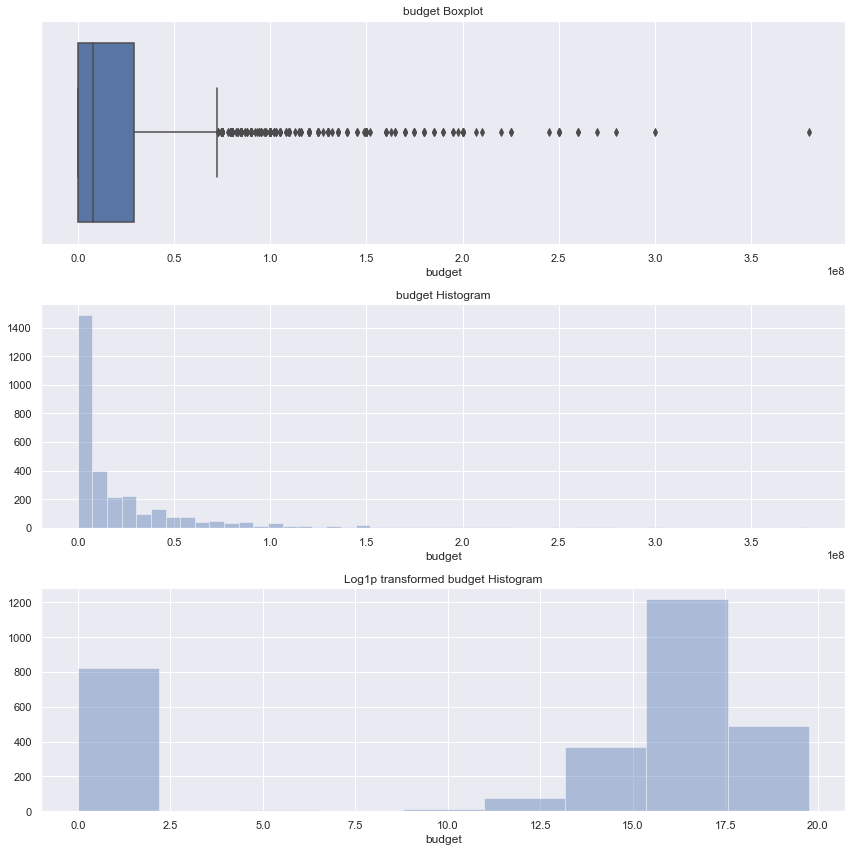

In [25]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.set(rc={'figure.figsize':(12,8)})

sns.boxplot(x = train_df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")

sns.distplot(a = train_df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")

sns.distplot(a = np.log1p(train_df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")

f.tight_layout()

In [26]:
train_df["log_budget"] = np.log1p(train_df.budget)
test_df["log_budget"] = np.log1p(test_df.budget)

#### Genres

In [27]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

In [28]:
train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

In [29]:
genres_dict = dict()

In [30]:
for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1

In [31]:
genres_dict

{'Comedy': 1028,
 'Drama': 1531,
 'Family': 260,
 'Romance': 571,
 'Thriller': 789,
 'Action': 741,
 'Animation': 141,
 'Adventure': 439,
 'Horror': 301,
 'Documentary': 87,
 'Music': 100,
 'Crime': 469,
 'ScienceFiction': 290,
 'Mystery': 225,
 'Foreign': 31,
 'Fantasy': 232,
 'War': 100,
 'Western': 43,
 'History': 132,
 'TVMovie': 1}

In [32]:
sns.set(rc = {'figure.figsize':(12,8)})

genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')

genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by = "number_of_movies", ascending=False)

Text(0.5, 1.0, 'Number of films per genre')

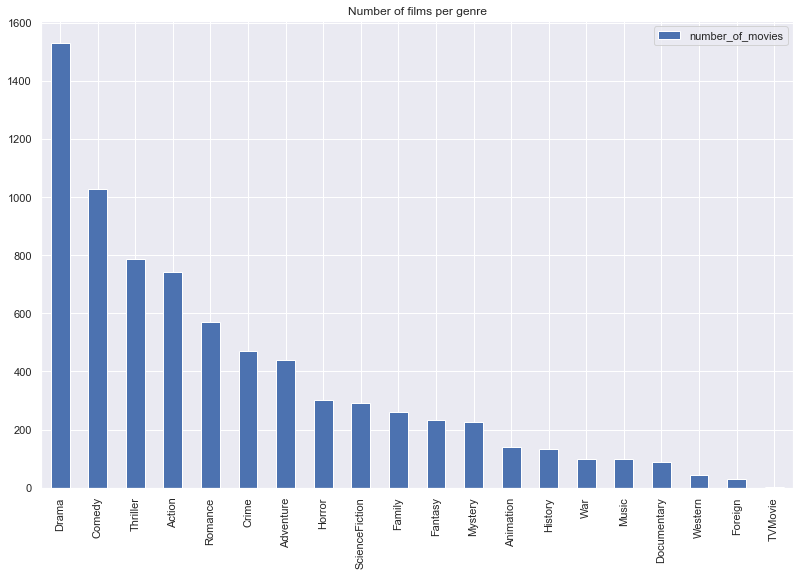

In [33]:
genres_df.plot.bar()
plt.title("Number of films per genre")

#### Number of Genres

In [34]:
sns.set(rc = {'figure.figsize':(9,8)})
train_df['num_genres'] = train_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

Text(0.5, 1.0, 'Number of films with more than 1 genre')

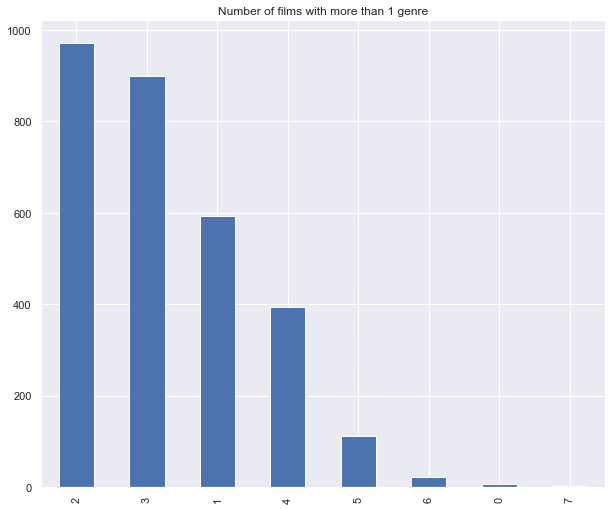

In [35]:
train_df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

#### isGenre, feature engineering, creating new feature
isDrama, isComedy etc.

In [36]:
# genres_df.index.values
# for g in genres_df.index.values:
#     train_df['isGenre_' + g] = train_df['genres_processed'].apply(lambda x: 1 if g in x else 0)
#     test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [37]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres'],
      dtype='object')

#### Original Language

Text(0.5, 1.0, 'Number of films per language')

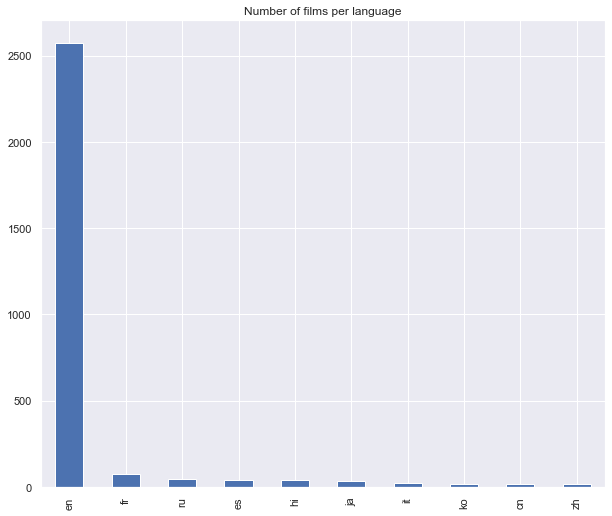

In [38]:
train_df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

#### English and Non-English movies

In [39]:
train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

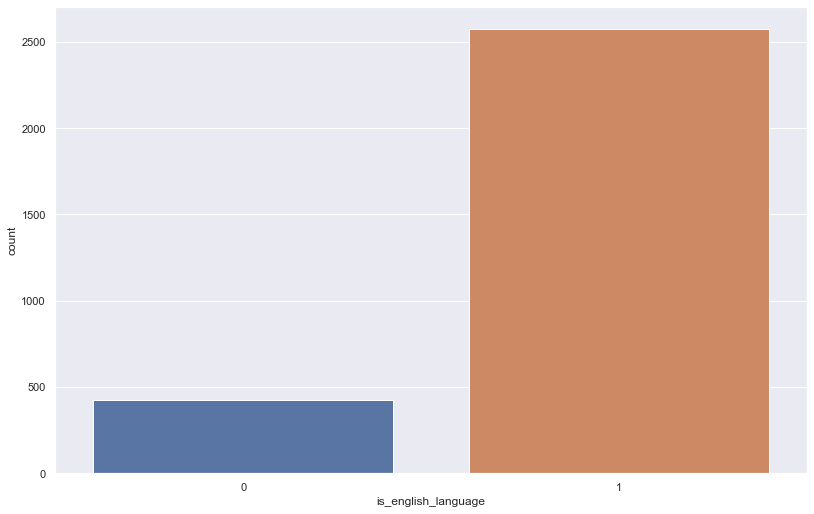

In [40]:
train_df.is_english_language = train_df.is_english_language.fillna(1)
test_df.is_english_language = test_df.is_english_language.fillna(1)

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.countplot(x = "is_english_language", data=train_df)

#### Production Companies

In [41]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

In [42]:
train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

In [43]:
train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

In [44]:
production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1

In [45]:
sns.set(rc={'figure.figsize':(12,8)})

production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')

Text(0.5, 1.0, 'Number of films per production company')

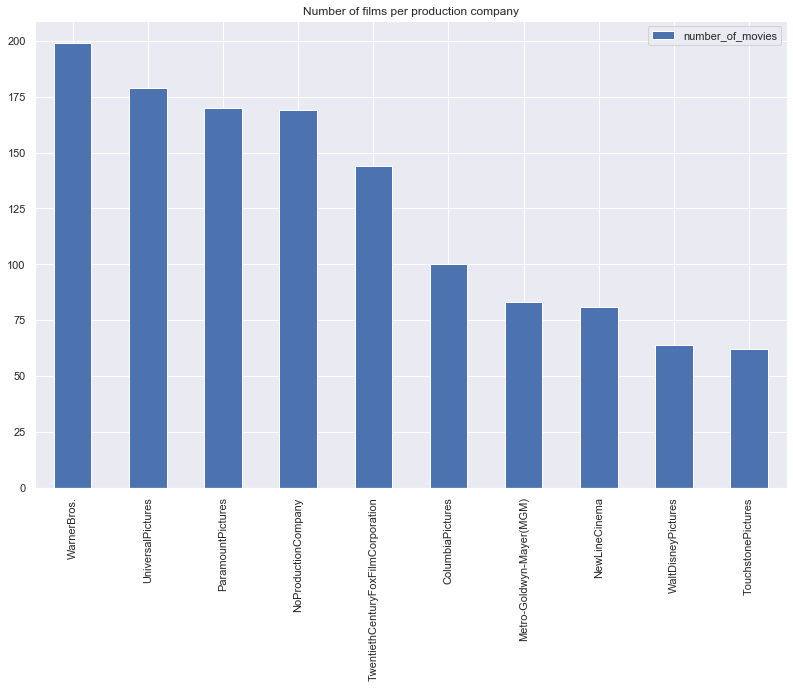

In [46]:
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

#### Number of Production Companies

Text(0.5, 1.0, 'Number of multiple production companies per movie')

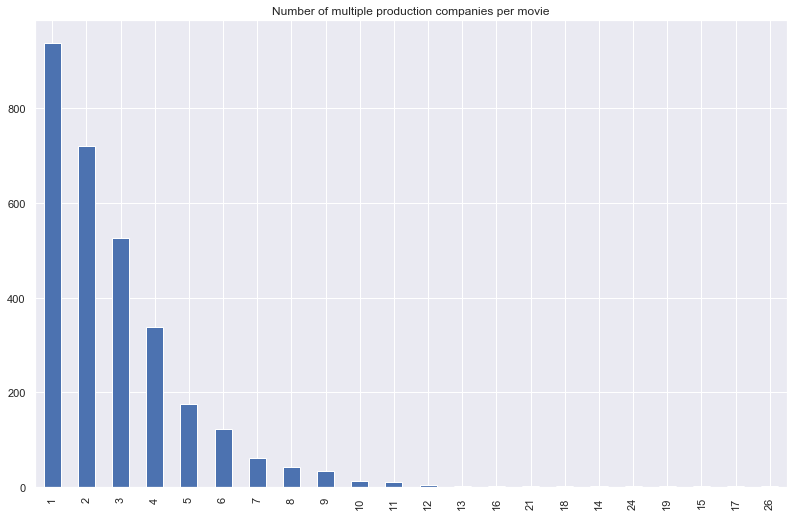

In [47]:
train_df["num_of_production_companies"] = train_df.production_companies_processed.apply(len)
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

train_df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

#### isProductionCompany feature engineering
Feature Engineering with all the production companies

In [48]:
# for g in production_companies_df.index.values:
#     train_df['isProductionCompany_' + g] = train_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)
#     test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

In [50]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies'],
      dtype='object')

#### production_countries

In [51]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

In [52]:
train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))

In [53]:
production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1

Text(0.5, 1.0, 'Number of films per production country')

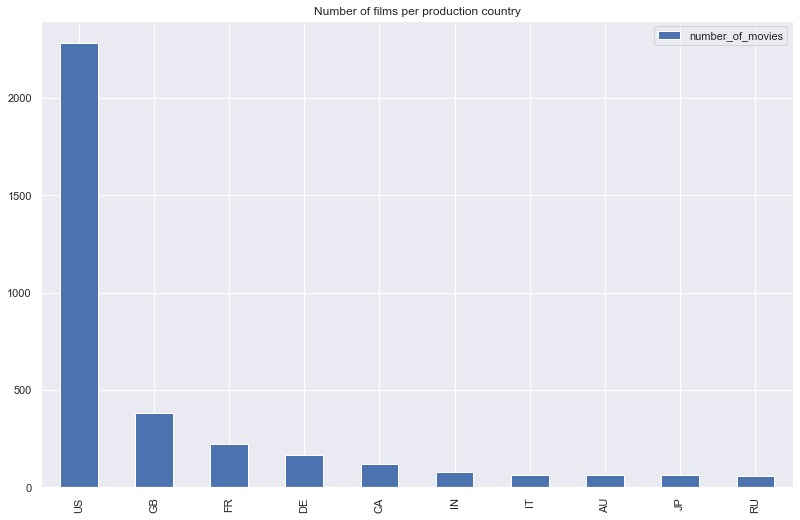

In [54]:
production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

#### isProduction_country feature engineering

In [55]:
# for c in production_countries_df.index.values:
#     train_df['isProductionCountry_' + c] = train_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)
#     test_df['isProductionCountry_' + c] = test_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)

#### popularity

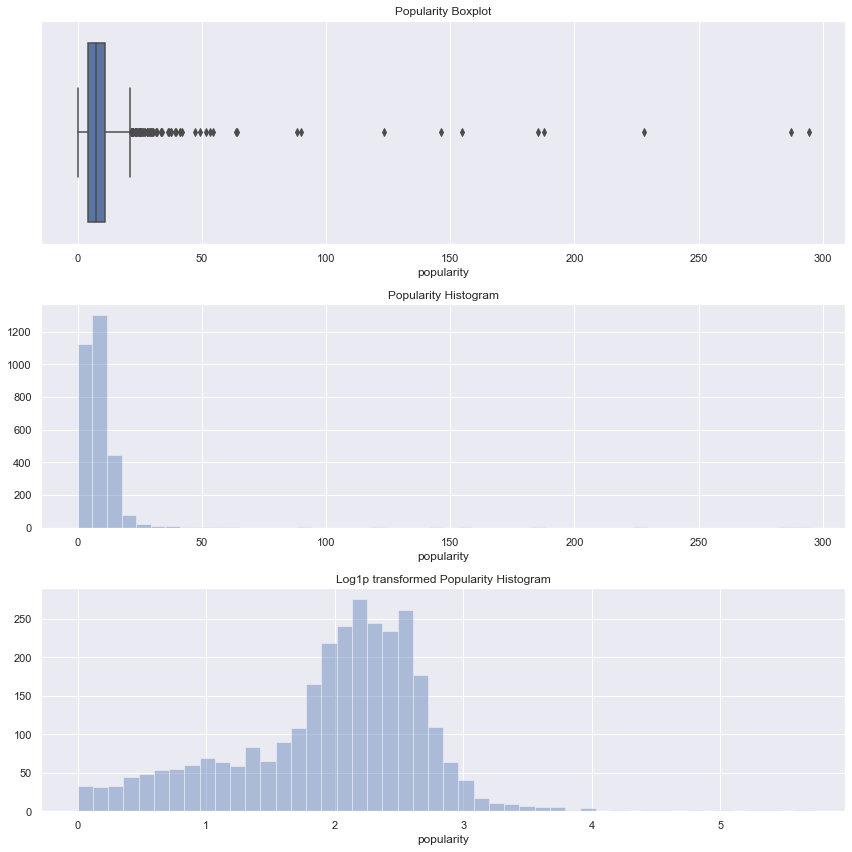

In [56]:
f, ax = plt.subplots(3, figsize=(12,12))

sns.boxplot(x = train_df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")

sns.distplot(a = train_df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")

sns.distplot(a = np.log1p(train_df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")

f.tight_layout()

In [57]:
train_df["log_popularity"] = np.log1p(train_df.popularity)
test_df["log_popularity"] = np.log1p(test_df.popularity)

#### Runtime

In [58]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mode()[0])
test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])

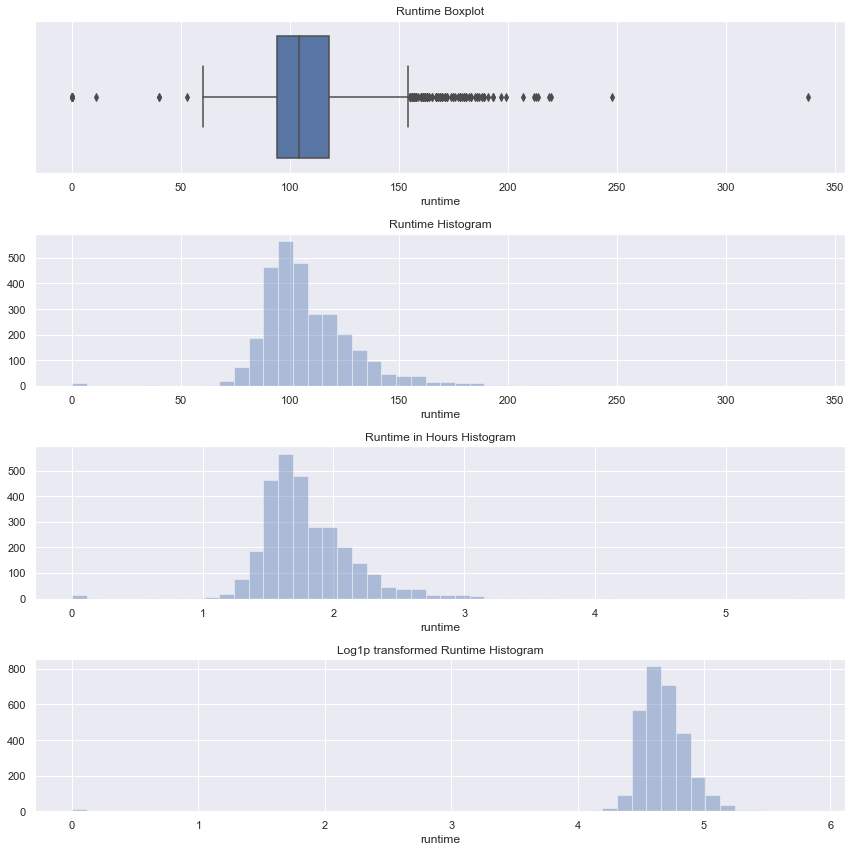

In [59]:
f, ax = plt.subplots(4, figsize=(12,12))

train_df.runtime = train_df.runtime.fillna(train_df.runtime.mode())

sns.boxplot(x = train_df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")

sns.distplot(a = train_df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")

sns.distplot(a = train_df.runtime/60, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")

sns.distplot(a = np.log1p(train_df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")

f.tight_layout()

In [60]:
train_df["runtime_in_hours"] = train_df.runtime/60
test_df["runtime_in_hours"] = test_df.runtime/60

train_df["log_runtime"] = np.log1p(train_df.runtime)
test_df["log_runtime"] = np.log1p(test_df.runtime)

In [61]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime'],
      dtype='object')

#### Release Date preprocessing before EDA and ML

In [62]:
from datetime import datetime

# fill possible NA values with the statistical mode
train_df["release_date"] = train_df["release_date"].fillna(train_df["release_date"].mode()[0])
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])

In [63]:
train_df['temp'] = train_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train_df["month"] = train_df.temp.apply(lambda x: x.month)
train_df["season"] = train_df["month"]%4
train_df["year"] = train_df.temp.apply(lambda x: x.year)
train_df["day_of_week"] = train_df.temp.apply(lambda x: x.weekday()+1)
train_df["week_of_year"] = train_df.temp.apply(lambda x: x.isocalendar()[1])

train_df = train_df.drop(['temp'], axis=1)


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["season"] = test_df["month"]%4
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)
test_df["week_of_year"] = test_df.temp.apply(lambda x: x.isocalendar()[1])

test_df = test_df.drop(['temp'], axis=1)

In [64]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week',
       'week_of_year'],
      dtype='object')

In [65]:
train_df["day_of_week"] = train_df["day_of_week"].fillna(train_df["day_of_week"].mode()[0])
test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

train_df["year"] = train_df["year"].fillna(train_df["year"].mode()[0])
test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

train_df["week_of_year"] = train_df["week_of_year"].fillna(train_df["week_of_year"].mode()[0])
test_df["week_of_year"] = test_df["week_of_year"].fillna(test_df["week_of_year"].mode()[0])

train_df["season"] = train_df["season"].fillna(train_df["season"].mode()[0])
test_df["season"] = test_df["season"].fillna(test_df["season"].mode()[0])

train_df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()

release_date  month  year  day_of_week  week_of_year  season
0      2/20/15      2  2015            5             8       2
1       8/6/04      8  2004            5            32       0
2     10/10/14     10  2014            5            41       2
3       3/9/12      3  2012            5            10       3
4       2/5/09      2  2009            4             6       2

#### Month of Release, which month has most of the releases

Text(0.5, 1.0, 'Number of films per month')

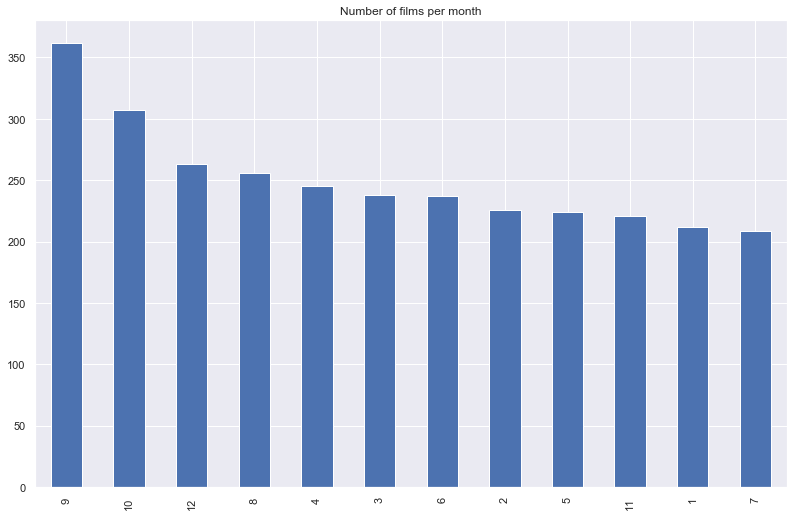

In [66]:
sns.set(rc = {'figure.figsize':(12,8)})

train_df.month.value_counts().plot.bar()
plt.title('Number of films per month')

#### Week of year, which week of the year has most of the releases

Text(0.5, 1.0, 'Number of films per week_of_year')

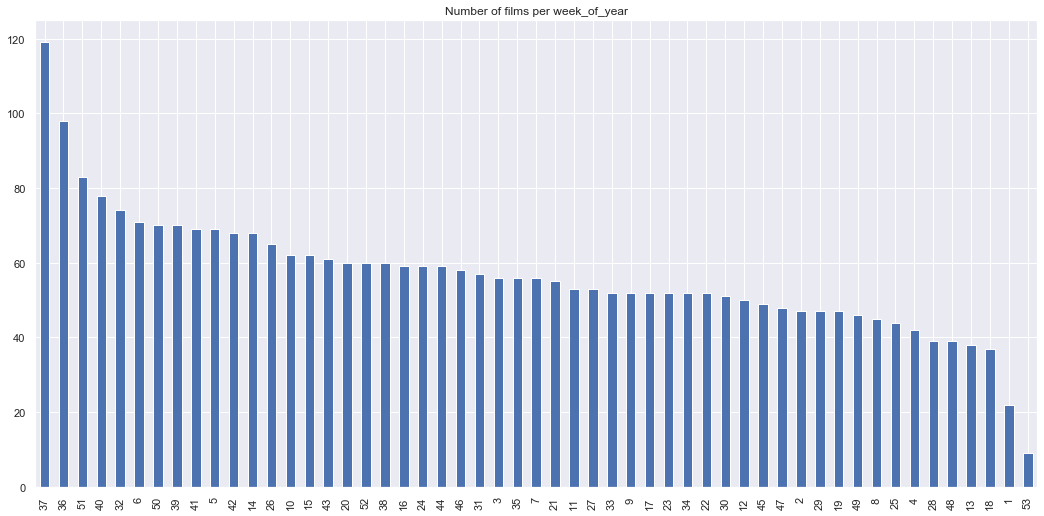

In [67]:
sns.set(rc={'figure.figsize':(16,8)})

train_df.week_of_year.value_counts().plot.bar()
plt.title('Number of films per week_of_year')

#### Season of Release, which season has most of the releases

Text(0.5, 1.0, 'Number of films per season')

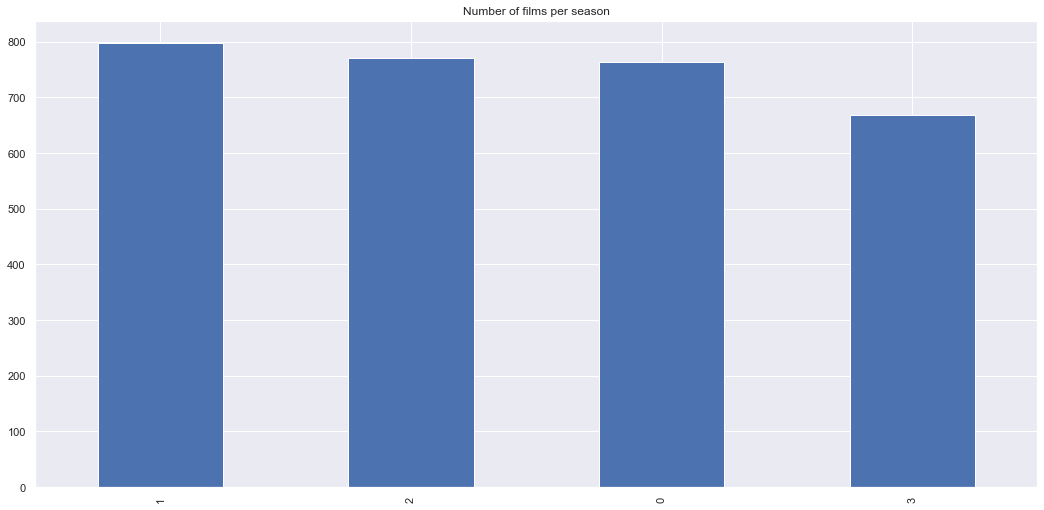

In [68]:
sns.set(rc={'figure.figsize':(16,8)})

train_df.season.value_counts().plot.bar()
plt.title('Number of films per season')

#### Day of Release, which day of the week has most of the releases

Text(0.5, 1.0, 'Number of films per day_of_week')

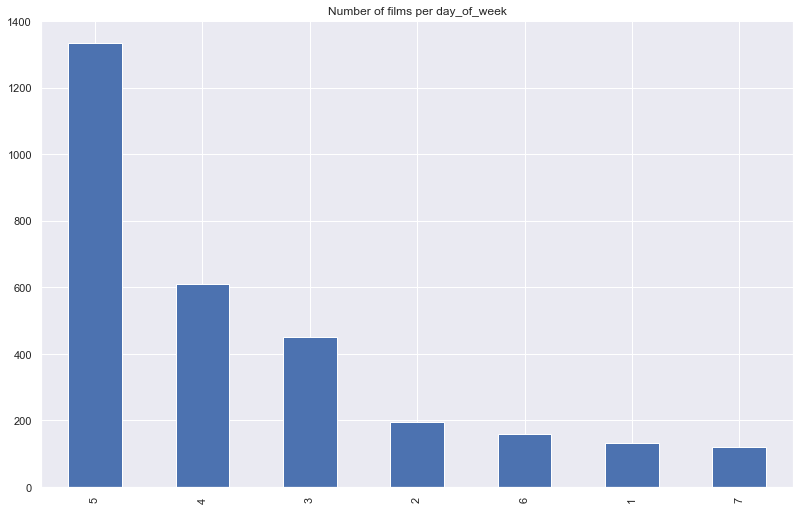

In [69]:
sns.set(rc={'figure.figsize':(12,8)})

train_df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

#### Year of Release, which year has most of the releases

In [70]:
for i in range(train_df.shape[0]):
    if train_df.year[i] > 2017:
        train_df.year[i] = train_df.year[i] - 100

Text(0.5, 1.0, 'Number of films per year')

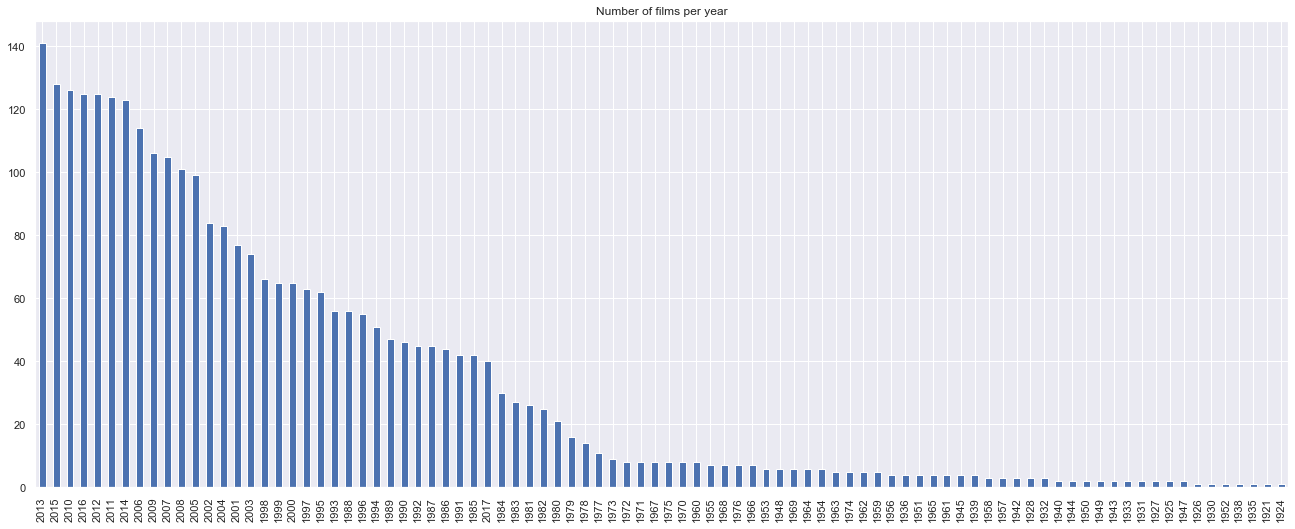

In [71]:
sns.set(rc={'figure.figsize':(20,8)})

train_df.year.value_counts().plot.bar()
plt.title('Number of films per year')

#### Identifying top actors in movies based on mean movies' revenue

In [72]:
import re

actors_dict = {}
size_of_actors = len(train_df) - train_df.cast.isna().sum()

In [73]:
for element in train_df[["revenue", "cast"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for actor in result:
            if actor not in actors_dict:
                actors_dict[actor] = element[0]
            else:
                actors_dict[actor] += element[0]

In [74]:
for actor in actors_dict:
    actors_dict[actor] = actors_dict[actor]/size_of_actors

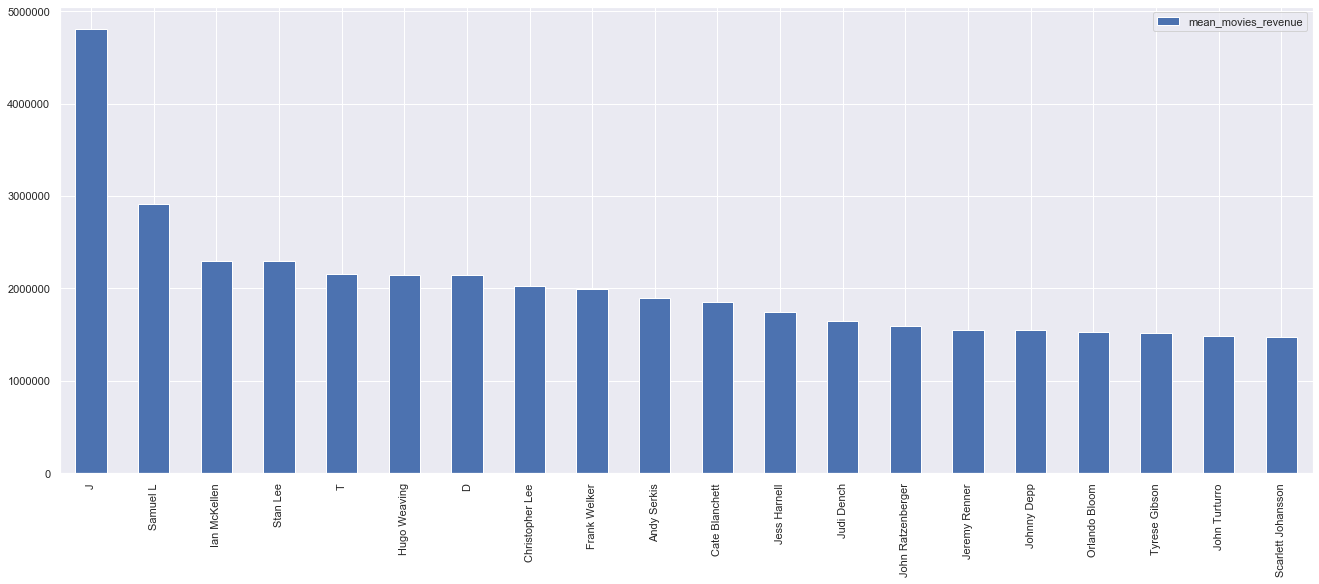

In [75]:
actors_df = pd.DataFrame.from_dict(actors_dict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

#### feature engineering, creating the has_top_actor columns

In [76]:
# def find_top_actor_from_cast(top_actor, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('name\': \'\w+\s*\w*', element)
#         result = [x.replace("name\': \'", "") for x in result]
        
#     if top_actor in result:
#         return 1
#     else:
#         return 0

In [77]:
# for top_actor in actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_actor_"+ top_actor] = train_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))
#     test_df["has_top_actor_"+ top_actor] = test_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))

#### Identifying the top keywords based on mean movie revenue

In [78]:
import re

keywords_dict = {}
size_of_keywords = len(train_df) - train_df.Keywords.isna().sum()

In [79]:
for element in train_df[["revenue", "Keywords"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for key in result:
            if key not in keywords_dict:
                keywords_dict[key] = element[0]
            else:
                keywords_dict[key] += element[0]

In [80]:
for key in keywords_dict:
    keywords_dict[key] = keywords_dict[key]/size_of_keywords

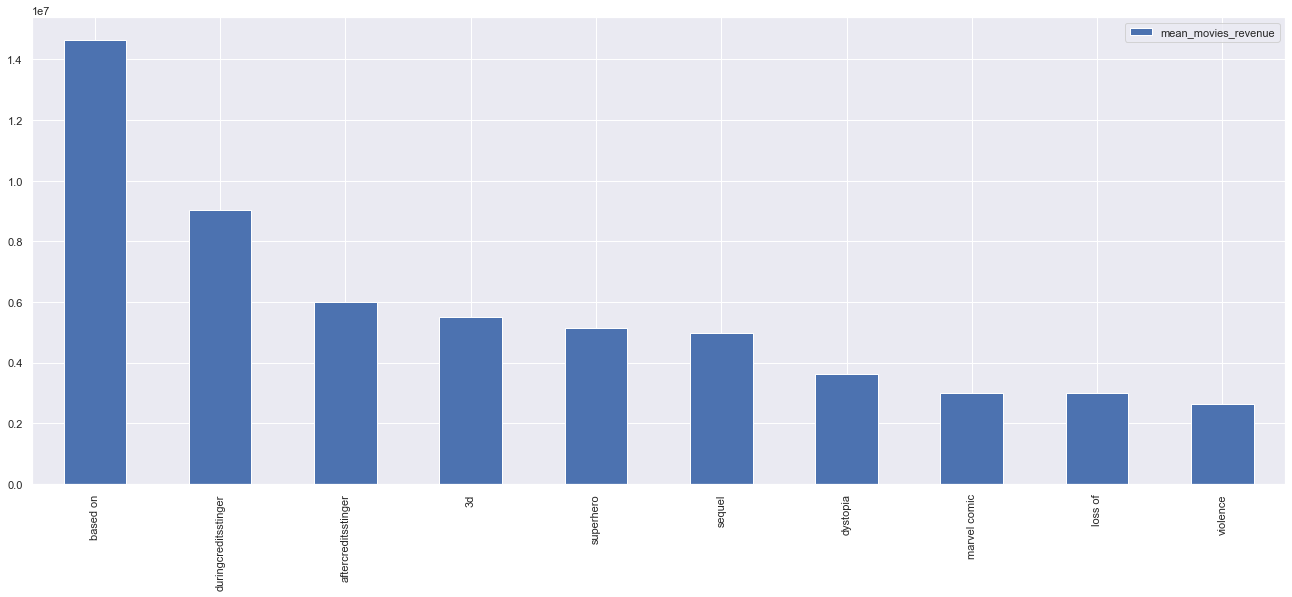

In [81]:
keywords_df = pd.DataFrame.from_dict(keywords_dict, orient='index', columns=["mean_movies_revenue"])
keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

#### feature engineering has_top_keyword based on mean movies' revenue

In [82]:
# def find_top_keywords_from_cast(top_keyword, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('name\': \'\w+\s*\w*', element)
#         result = [x.replace("name\': \'", "") for x in result]
        
#     if top_keyword in result:
#         return 1
#     else:
#         return 0

In [83]:
# for top_keyword in keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_keyword_"+ top_keyword] = train_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))
#     test_df["has_top_keyword_"+ top_keyword] = test_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))

#### Cast
Number of cast

In [84]:
train_df["num_of_cast"] = train_df["cast"].str.count("name")
test_df["num_of_cast"] = test_df["cast"].str.count("name")

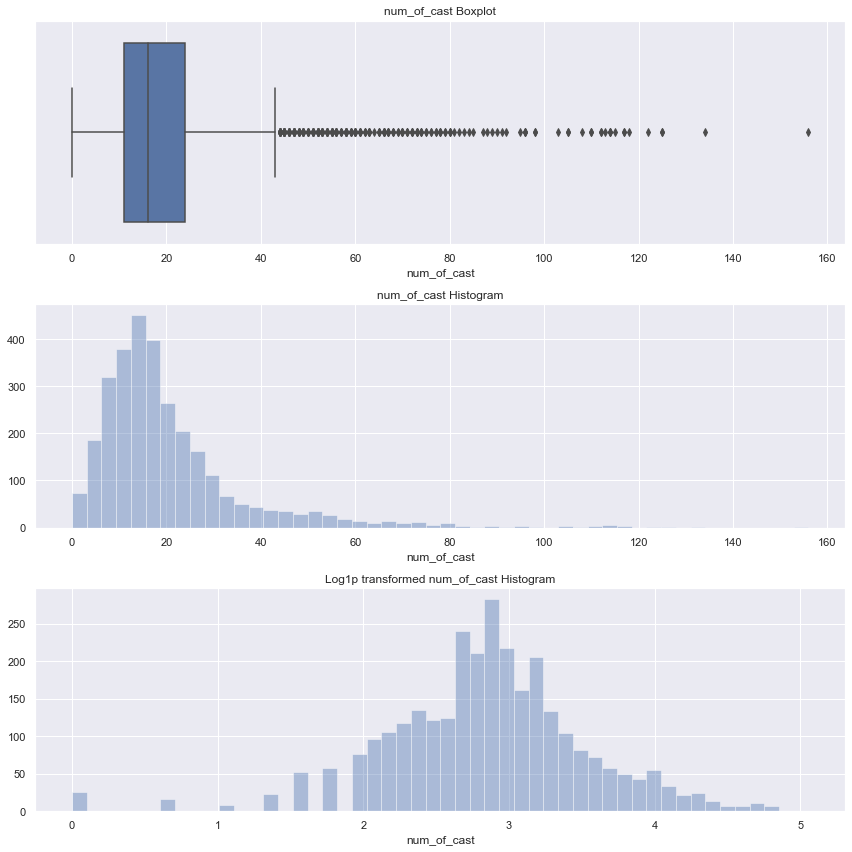

In [85]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_cast = train_df.num_of_cast.fillna(0)
test_df.num_of_cast = test_df.num_of_cast.fillna(0)

sns.boxplot(x = train_df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")

sns.distplot(a = train_df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")

sns.distplot(a = np.log1p(train_df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")

f.tight_layout()


train_df["log_num_of_cast"] = np.log1p(train_df.num_of_cast)
test_df["log_num_of_cast"] = np.log1p(test_df.num_of_cast)

#### Male cast
number of male cast

In [86]:
train_df["num_of_male_cast"] = train_df["cast"].str.count("'gender': 2")
test_df["num_of_male_cast"] = test_df["cast"].str.count("'gender': 2")

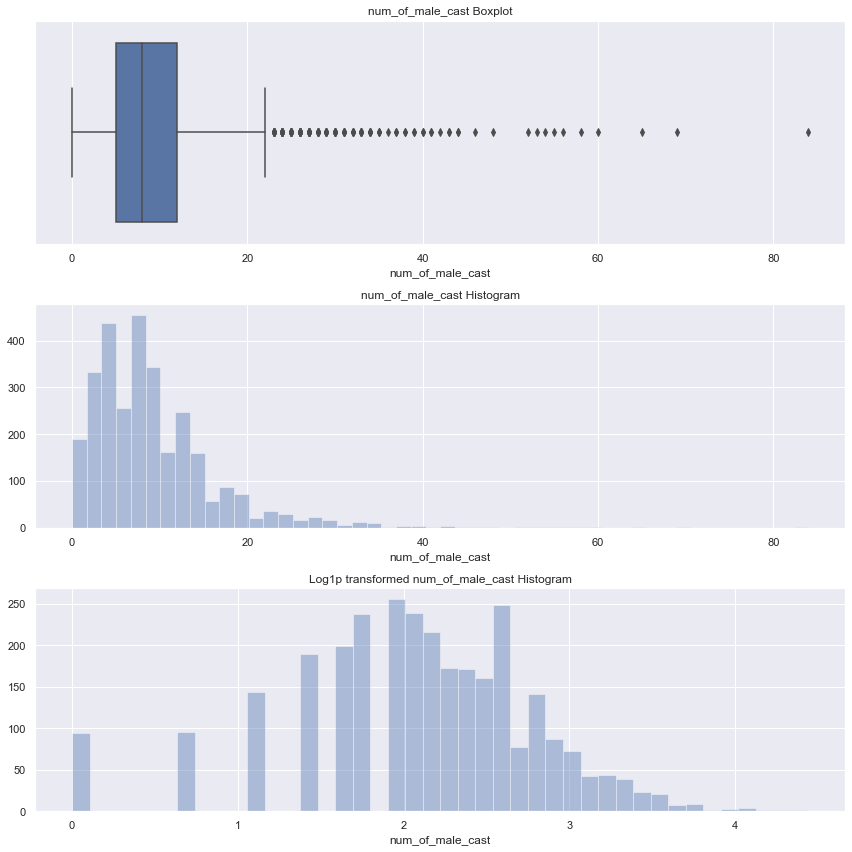

In [87]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_male_cast = train_df.num_of_male_cast.fillna(0)
test_df.num_of_male_cast = test_df.num_of_male_cast.fillna(0)

sns.boxplot(x = train_df.num_of_male_cast, ax = ax[0])
ax[0].set_title("num_of_male_cast Boxplot")

sns.distplot(a = train_df.num_of_male_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_cast Histogram")

sns.distplot(a = np.log1p(train_df.num_of_male_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_cast Histogram")

f.tight_layout()


train_df["log_num_of_male_cast"] = np.log1p(train_df.num_of_male_cast)
test_df["log_num_of_male_cast"] = np.log1p(test_df.num_of_male_cast)

#### Female cast
number of female cast

In [88]:
train_df["num_of_female_cast"] = train_df["cast"].str.count("'gender': 1")
test_df["num_of_female_cast"] = test_df["cast"].str.count("'gender': 1")

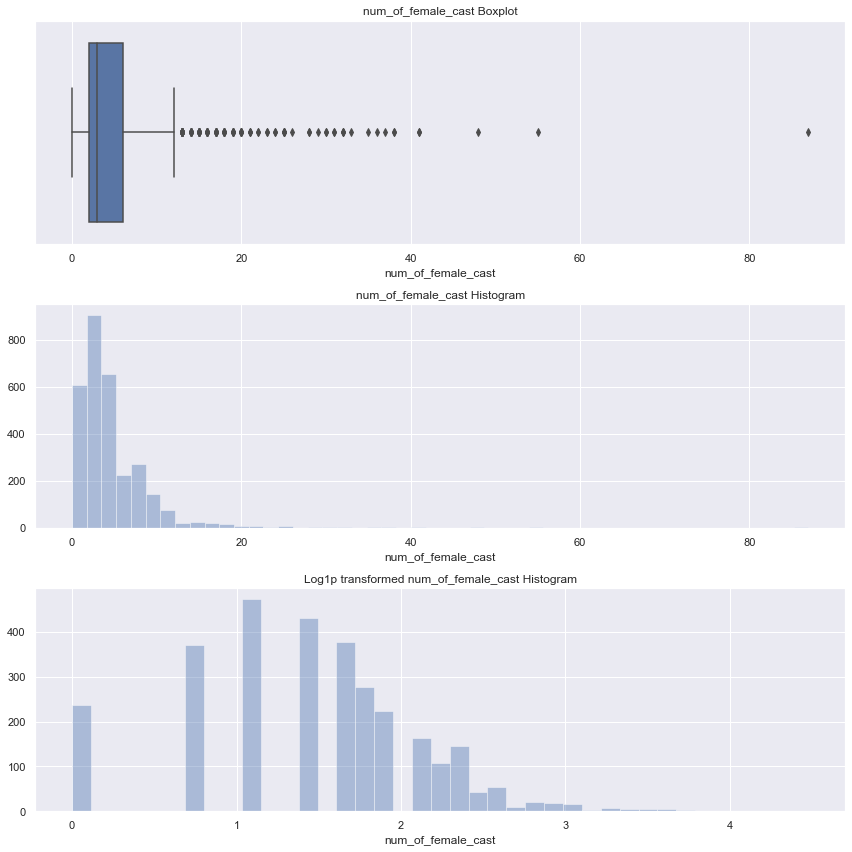

In [89]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_female_cast = train_df.num_of_female_cast.fillna(0)
test_df.num_of_female_cast = test_df.num_of_female_cast.fillna(0)

sns.boxplot(x=train_df.num_of_female_cast, ax = ax[0])
ax[0].set_title("num_of_female_cast Boxplot")

sns.distplot(a=train_df.num_of_female_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_cast Histogram")

sns.distplot(a=np.log1p(train_df.num_of_female_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_cast Histogram")

f.tight_layout()


train_df["log_num_of_female_cast"] = np.log1p(train_df.num_of_female_cast)
test_df["log_num_of_female_cast"] = np.log1p(test_df.num_of_female_cast)

### Crew
Counting the number of crew

In [90]:
train_df["num_of_crew"] = train_df["crew"].str.count("'job")
test_df["num_of_crew"] = test_df["crew"].str.count("'job")

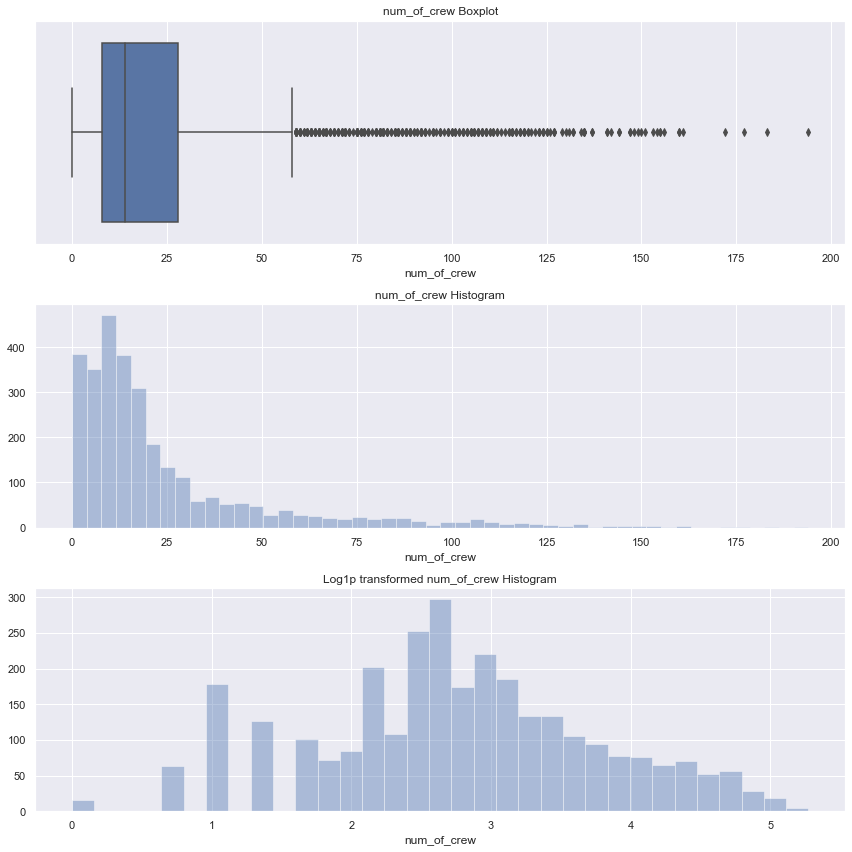

In [91]:
f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_crew = train_df.num_of_crew.fillna(0)
test_df.num_of_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_crew, ax = ax[0])
ax[0].set_title("num_of_crew Boxplot")

sns.distplot(a=train_df.num_of_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_crew Histogram")

f.tight_layout()

train_df["log_num_of_crew"] = np.log1p(train_df.num_of_crew)
test_df["log_num_of_crew"] = np.log1p(test_df.num_of_crew)

### Male Crew
Counting the number of male crew

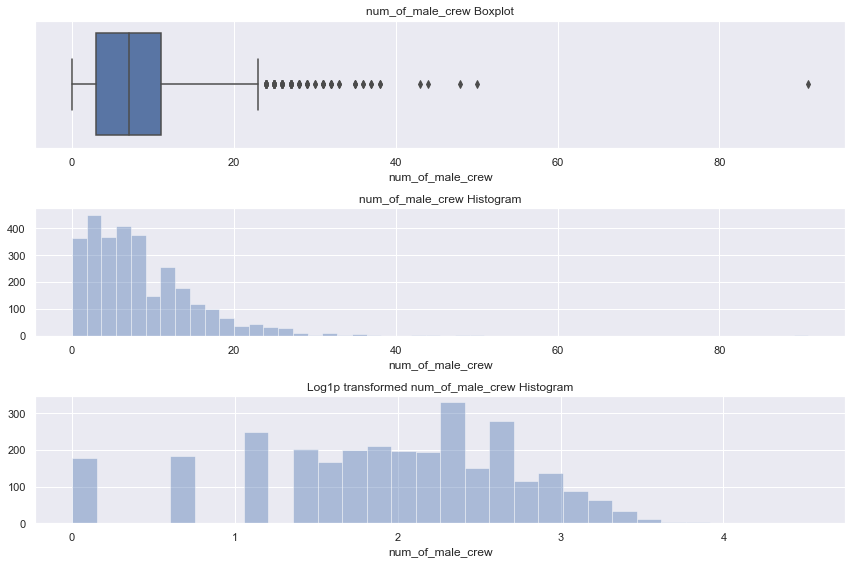

In [92]:
train_df["num_of_male_crew"] = train_df["crew"].str.count("'gender': 2")
test_df["num_of_male_crew"] = test_df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,8))

train_df.num_of_male_crew = train_df.num_of_male_crew.fillna(0)
test_df.num_of_male_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_male_crew, ax = ax[0])
ax[0].set_title("num_of_male_crew Boxplot")

sns.distplot(a=train_df.num_of_male_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_male_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_crew Histogram")

f.tight_layout()


train_df["log_num_of_male_crew"] = np.log1p(train_df.num_of_male_crew)
test_df["log_num_of_male_crew"] = np.log1p(test_df.num_of_male_crew)

### Female Crew
Counting the number of female crew

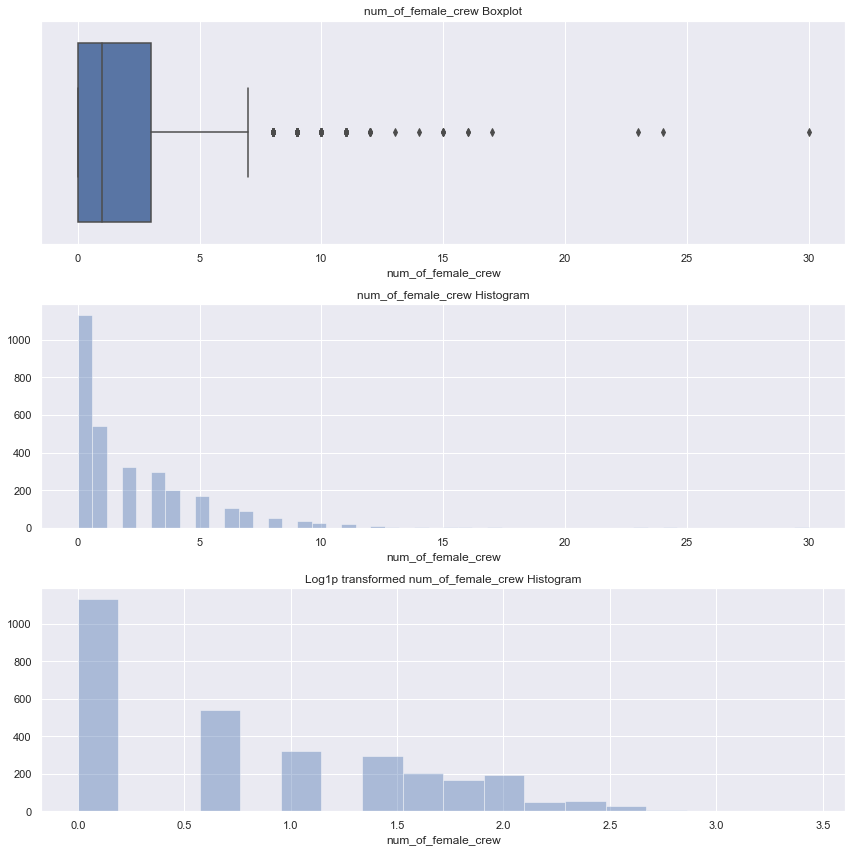

In [93]:
train_df["num_of_female_crew"] = train_df["crew"].str.count("'gender': 1")
test_df["num_of_female_crew"] = test_df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_female_crew = train_df.num_of_female_crew.fillna(0)
test_df.num_of_female_crew = test_df.num_of_female_crew.fillna(0)

sns.boxplot(x=train_df.num_of_female_crew, ax = ax[0])
ax[0].set_title("num_of_female_crew Boxplot")

sns.distplot(a=train_df.num_of_female_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_crew Histogram")

sns.distplot(a=np.log1p(train_df.num_of_female_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_crew Histogram")

f.tight_layout()


train_df["log_num_of_female_crew"] = np.log1p(train_df.num_of_female_crew)
test_df["log_num_of_female_crew"] = np.log1p(test_df.num_of_female_crew)

### Identifying top directors based on average movie revenue

In [94]:
# import re

# directors_dict = {}
# size_of_crew = len(train_df) - train_df.crew.isna().sum()

# for element in train_df[["revenue", "crew"]].values:
#     if type(element[1]) == type(str()):
        
#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element[1])
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]

#         for key in result:
#             if key not in directors_dict:
#                 directors_dict[key] = element[0]
#             else:
#                 directors_dict[key] += element[0]
                
# for key in directors_dict:
#     directors_dict[key] = directors_dict[key]/size_of_crew
    
# directors_df = pd.DataFrame.from_dict(directors_dict, orient='index', columns=["mean_movies_revenue"])
# directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_director in movies

In [95]:
# def find_top_directors_from_crew(top_director, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
#     if top_director in result:
#         return 1
#     else:
#         return 0

# for top_director in directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_director_"+ top_director] = train_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))
#     test_df["has_top_director_"+ top_director] = test_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))

### Identifying top Producers based on average movie salary

In [96]:
# import re

# producers_dict = {}
# size_of_crew = len(train_df) - train_df.crew.isna().sum()

# for element in train_df[["revenue", "crew"]].values:
#     if type(element[1]) == type(str()):
        
#         result = re.findall('Producer\', \'name\': \'\w+\s*\w*', element[1])
#         result = [x.replace("Producer\', \'name\': \'", "") for x in result]

#         for key in result:
#             if key not in producers_dict:
#                 producers_dict[key] = element[0]
#             else:
#                 producers_dict[key] += element[0]
                
# for key in producers_dict:
#     producers_dict[key] = producers_dict[key]/size_of_crew
    
# producers_df = pd.DataFrame.from_dict(producers_dict, orient='index', columns=["mean_movies_revenue"])
# producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_producers in movies

In [97]:
# def find_top_producers_from_crew(top_producer, element):
    
#     result = []
#     if type(element) == type(str()):

#         result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
#         result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
#     if top_producer in result:
#         return 1
#     else:
#         return 0

# for top_producer in producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
#     train_df["has_top_producer_"+ top_producer] = train_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))
#     test_df["has_top_producer_"+ top_producer] = test_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))

#### Number of Directors in a movie

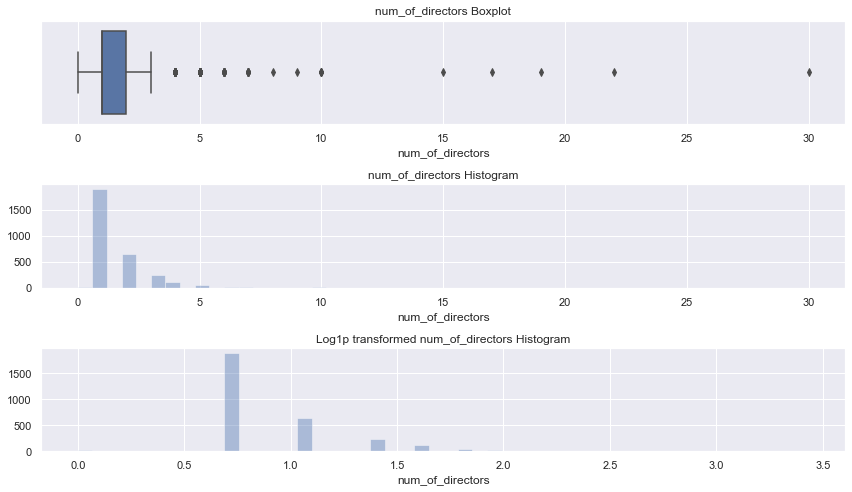

In [98]:
train_df["num_of_directors"] = train_df["crew"].str.count("Directing")
test_df["num_of_directors"] = test_df["crew"].str.count("Directing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_directors = train_df.num_of_directors.fillna(0)
test_df.num_of_directors = test_df.num_of_directors.fillna(0)

sns.boxplot(x=train_df.num_of_directors, ax = ax[0])
ax[0].set_title("num_of_directors Boxplot")
sns.distplot(a=train_df.num_of_directors, kde = False, ax = ax[1])
ax[1].set_title("num_of_directors Histogram")
sns.distplot(a=np.log1p(train_df.num_of_directors), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_directors Histogram")
f.tight_layout()


train_df["log_num_of_directors"] = np.log1p(train_df.num_of_directors)
test_df["log_num_of_directors"] = np.log1p(test_df.num_of_directors)

#### Number of Producers

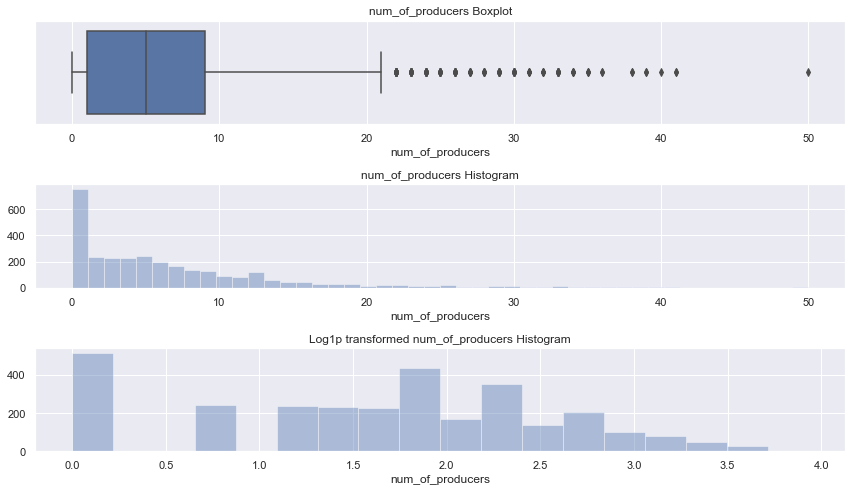

In [99]:
train_df["num_of_producers"] = train_df["crew"].str.count("Production")
test_df["num_of_producers"] = test_df["crew"].str.count("Production")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_producers = train_df.num_of_producers.fillna(0)
test_df.num_of_producers = test_df.num_of_producers.fillna(0)

sns.boxplot(x=train_df.num_of_producers, ax = ax[0])
ax[0].set_title("num_of_producers Boxplot")
sns.distplot(a=train_df.num_of_producers, kde = False, ax = ax[1])
ax[1].set_title("num_of_producers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_producers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_producers Histogram")
f.tight_layout()


train_df["log_num_of_producers"] = np.log1p(train_df.num_of_producers)
test_df["log_num_of_producers"] = np.log1p(test_df.num_of_producers)

#### Number of Writers

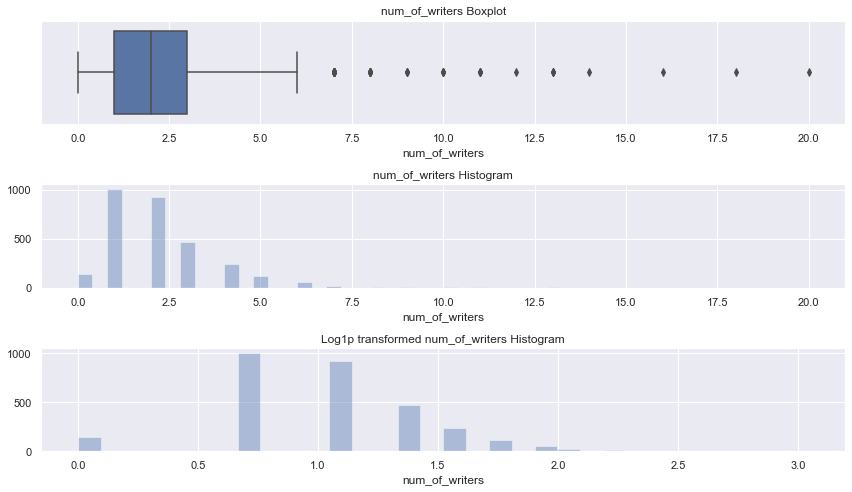

In [100]:
train_df["num_of_writers"] = train_df["crew"].str.count("Writing")
test_df["num_of_writers"] = test_df["crew"].str.count("Writing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_writers = train_df.num_of_writers.fillna(0)
test_df.num_of_writers = test_df.num_of_writers.fillna(0)

sns.boxplot(x=train_df.num_of_writers, ax = ax[0])
ax[0].set_title("num_of_writers Boxplot")
sns.distplot(a=train_df.num_of_writers, kde = False, ax = ax[1])
ax[1].set_title("num_of_writers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_writers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_writers Histogram")
f.tight_layout()


train_df["log_num_of_writers"] = np.log1p(train_df.num_of_writers)
test_df["log_num_of_writers"] = np.log1p(test_df.num_of_writers)

#### Number of Editors

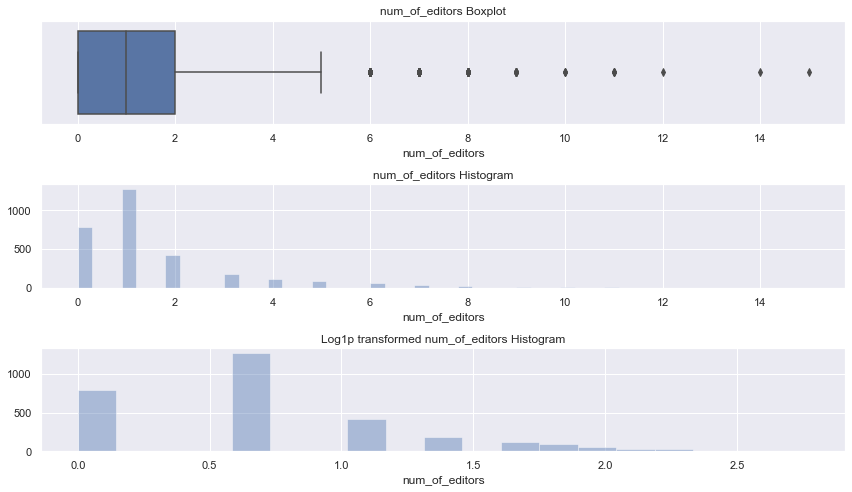

In [101]:
train_df["num_of_editors"] = train_df["crew"].str.count("Editing")
test_df["num_of_editors"] = test_df["crew"].str.count("Editing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_editors = train_df.num_of_editors.fillna(0)
test_df.num_of_editors = test_df.num_of_editors.fillna(0)

sns.boxplot(x=train_df.num_of_editors, ax = ax[0])
ax[0].set_title("num_of_editors Boxplot")
sns.distplot(a=train_df.num_of_editors, kde = False, ax = ax[1])
ax[1].set_title("num_of_editors Histogram")
sns.distplot(a=np.log1p(train_df.num_of_editors), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_editors Histogram")
f.tight_layout()


train_df["log_num_of_editors"] = np.log1p(train_df.num_of_editors)
test_df["log_num_of_editors"] = np.log1p(test_df.num_of_editors)

#### Number of Art crew

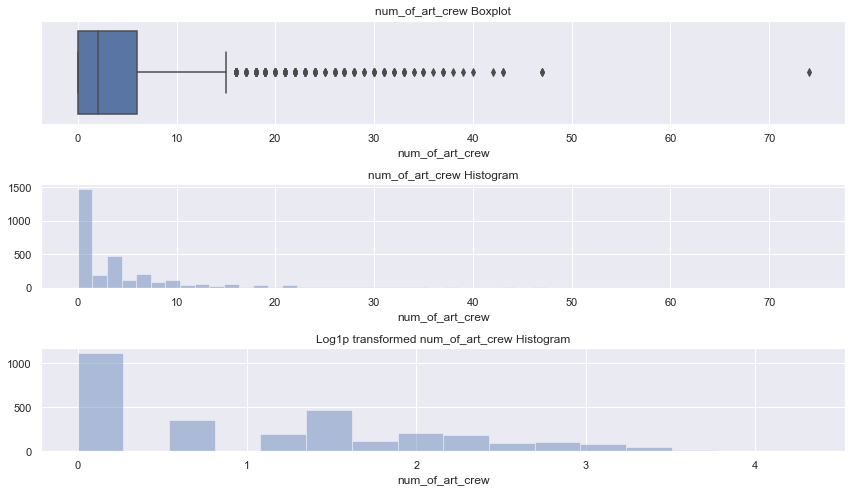

In [102]:
train_df["num_of_art_crew"] = train_df["crew"].str.count("Art")
test_df["num_of_art_crew"] = test_df["crew"].str.count("Art")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_art_crew = train_df.num_of_art_crew.fillna(0)
test_df.num_of_art_crew = test_df.num_of_art_crew.fillna(0)

sns.boxplot(x=train_df.num_of_art_crew, ax = ax[0])
ax[0].set_title("num_of_art_crew Boxplot")
sns.distplot(a=train_df.num_of_art_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_art_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_art_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_art_crew Histogram")
f.tight_layout()


train_df["log_num_of_art_crew"] = np.log1p(train_df.num_of_art_crew)
test_df["log_num_of_art_crew"] = np.log1p(test_df.num_of_art_crew)

#### Number of Sound crew

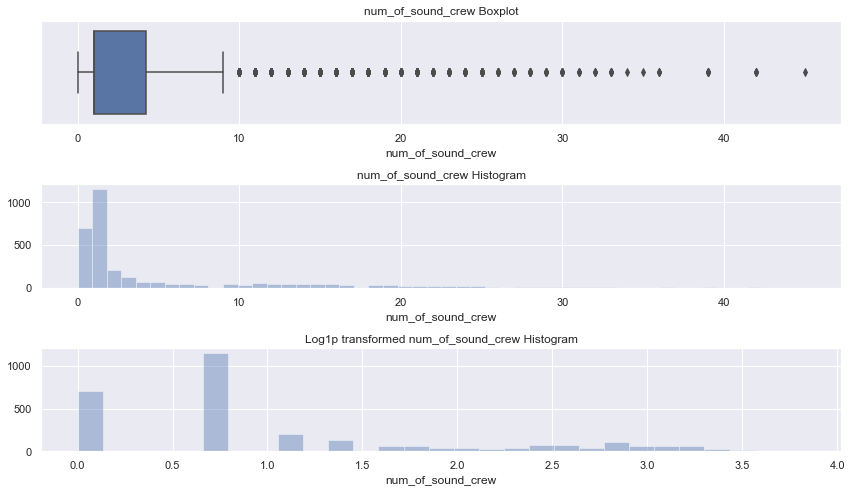

In [103]:
train_df["num_of_sound_crew"] = train_df["crew"].str.count("Sound")
test_df["num_of_sound_crew"] = test_df["crew"].str.count("Sound")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_sound_crew = train_df.num_of_sound_crew.fillna(0)
test_df.num_of_sound_crew = test_df.num_of_sound_crew.fillna(0)

sns.boxplot(x=train_df.num_of_sound_crew, ax = ax[0])
ax[0].set_title("num_of_sound_crew Boxplot")
sns.distplot(a=train_df.num_of_sound_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_sound_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_sound_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_sound_crew Histogram")
f.tight_layout()


train_df["log_num_of_sound_crew"] = np.log1p(train_df.num_of_sound_crew)
test_df["log_num_of_sound_crew"] = np.log1p(test_df.num_of_sound_crew)

#### Number of Costume and Make-Up crew

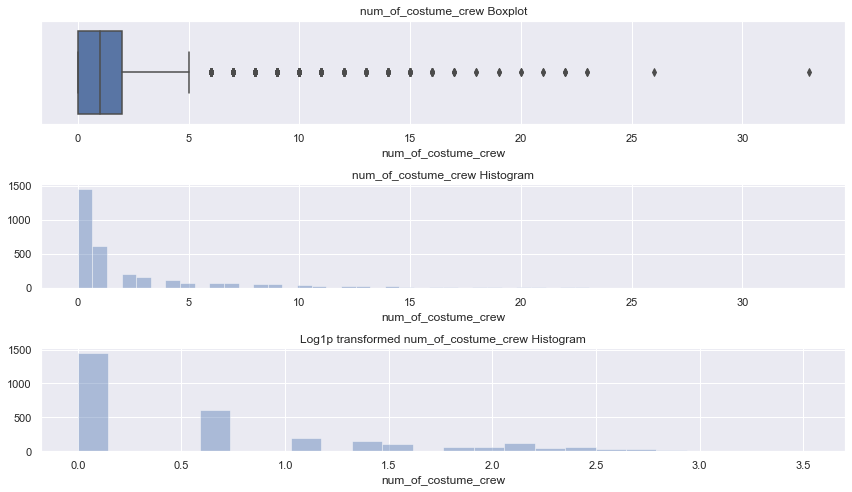

In [104]:
train_df["num_of_costume_crew"] = train_df["crew"].str.count("Costume & Make-Up")
test_df["num_of_costume_crew"] = test_df["crew"].str.count("Costume & Make-Up")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_costume_crew = train_df.num_of_costume_crew.fillna(0)
test_df.num_of_costume_crew = test_df.num_of_costume_crew.fillna(0)

sns.boxplot(x=train_df.num_of_costume_crew, ax = ax[0])
ax[0].set_title("num_of_costume_crew Boxplot")
sns.distplot(a=train_df.num_of_costume_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_costume_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_costume_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_costume_crew Histogram")
f.tight_layout()


train_df["log_num_of_costume_crew"] = np.log1p(train_df.num_of_costume_crew)
test_df["log_num_of_costume_crew"] = np.log1p(test_df.num_of_costume_crew)

#### Number of Camera crew

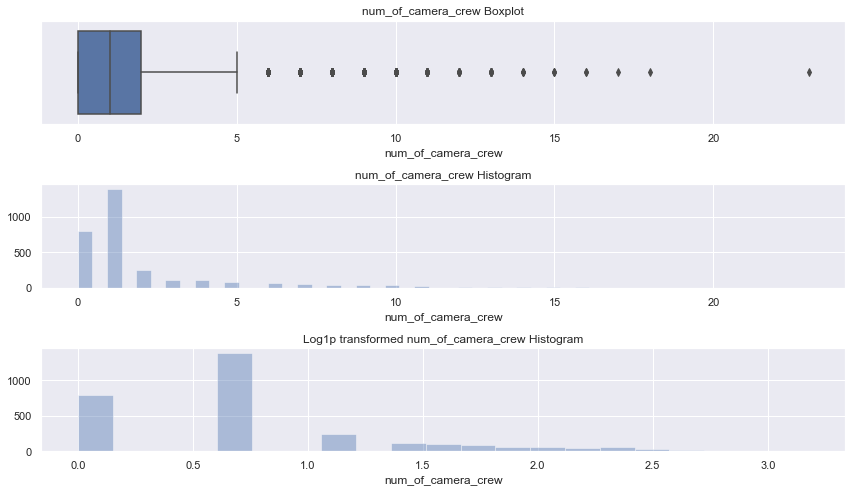

In [105]:
train_df["num_of_camera_crew"] = train_df["crew"].str.count("\'department\': \'Camera\'")
test_df["num_of_camera_crew"] = test_df["crew"].str.count("\'department\': \'Camera\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_camera_crew = train_df.num_of_camera_crew.fillna(0)
test_df.num_of_camera_crew = test_df.num_of_camera_crew.fillna(0)

sns.boxplot(x=train_df.num_of_camera_crew, ax = ax[0])
ax[0].set_title("num_of_camera_crew Boxplot")
sns.distplot(a=train_df.num_of_camera_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_camera_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_camera_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_camera_crew Histogram")
f.tight_layout()


train_df["log_num_of_camera_crew"] = np.log1p(train_df.num_of_camera_crew)
test_df["log_num_of_camera_crew"] = np.log1p(test_df.num_of_camera_crew)

#### Number of Visual Effects Crew

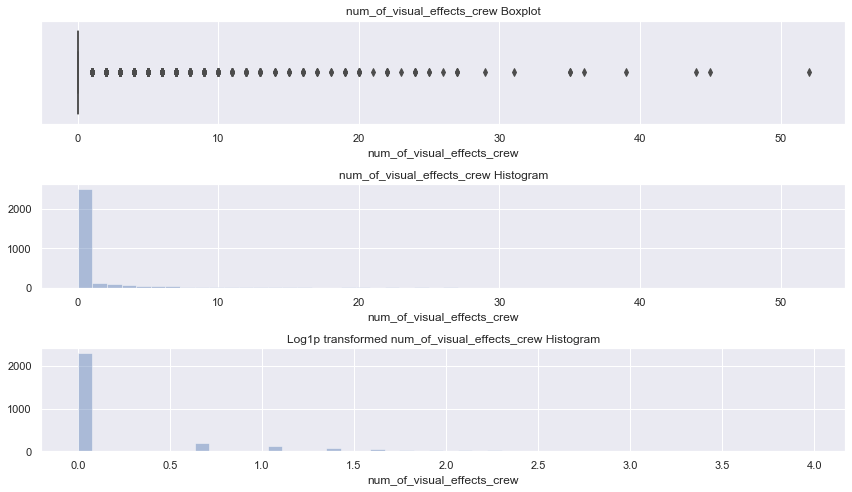

In [106]:
train_df["num_of_visual_effects_crew"] = train_df["crew"].str.count("\'department\': \'Visual Effects\'")
test_df["num_of_visual_effects_crew"] = test_df["crew"].str.count("\'department\': \'Visual Effects\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_visual_effects_crew = train_df.num_of_visual_effects_crew.fillna(0)
test_df.num_of_visual_effects_crew = test_df.num_of_visual_effects_crew.fillna(0)

sns.boxplot(x=train_df.num_of_visual_effects_crew, ax = ax[0])
ax[0].set_title("num_of_visual_effects_crew Boxplot")
sns.distplot(a=train_df.num_of_visual_effects_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_visual_effects_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_visual_effects_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_visual_effects_crew Histogram")
f.tight_layout()


train_df["log_num_of_visual_effects_crew"] = np.log1p(train_df.num_of_visual_effects_crew)
test_df["log_num_of_visual_effects_crew"] = np.log1p(test_df.num_of_visual_effects_crew)

#### Number of Lighting crew

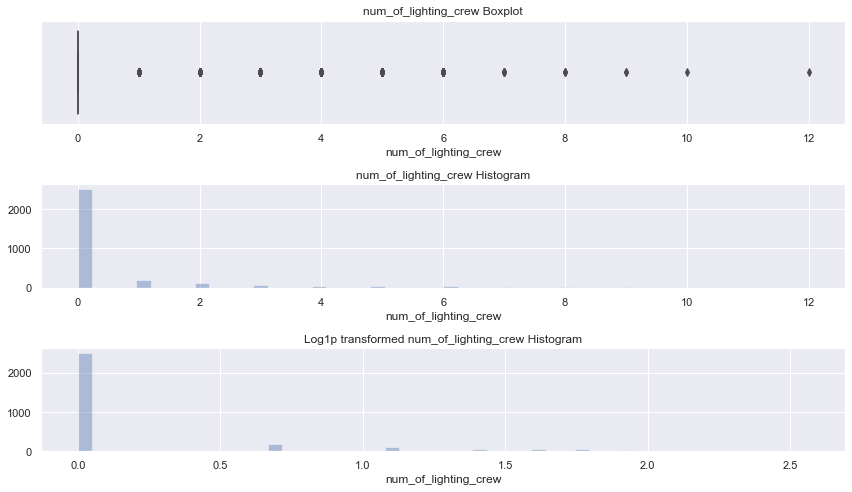

In [107]:
train_df["num_of_lighting_crew"] = train_df["crew"].str.count("\'department\': \'Lighting\'")
test_df["num_of_lighting_crew"] = test_df["crew"].str.count("\'department\': \'Lighting\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_lighting_crew = train_df.num_of_lighting_crew.fillna(0)
test_df.num_of_lighting_crew = test_df.num_of_lighting_crew.fillna(0)

sns.boxplot(x=train_df.num_of_lighting_crew, ax = ax[0])
ax[0].set_title("num_of_lighting_crew Boxplot")
sns.distplot(a=train_df.num_of_lighting_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_lighting_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_lighting_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_lighting_crew Histogram")
f.tight_layout()


train_df["log_num_of_lighting_crew"] = np.log1p(train_df.num_of_lighting_crew)
test_df["log_num_of_lighting_crew"] = np.log1p(test_df.num_of_lighting_crew)

#### Number of Other crew

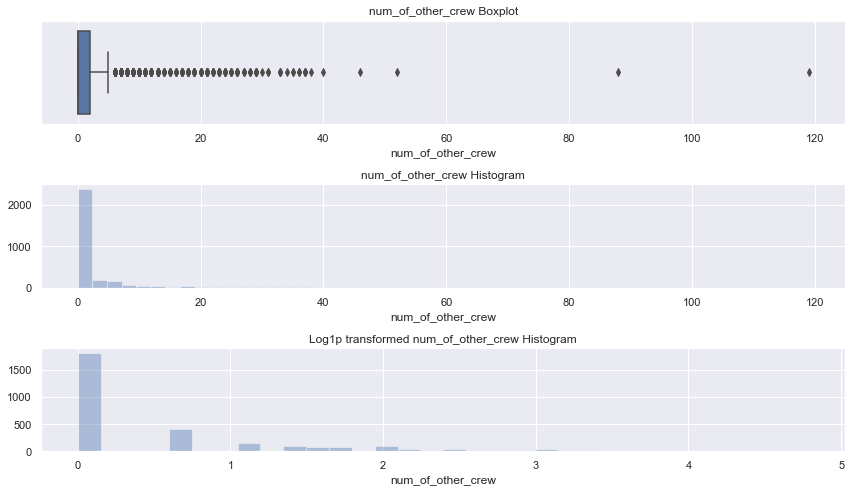

In [108]:
train_df["num_of_other_crew"] = train_df["crew"].str.count("\'department\': \'Crew\'")
test_df["num_of_other_crew"] = test_df["crew"].str.count("\'department\': \'Crew\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_other_crew = train_df.num_of_other_crew.fillna(0)
test_df.num_of_other_crew = test_df.num_of_other_crew.fillna(0)

sns.boxplot(x=train_df.num_of_other_crew, ax = ax[0])
ax[0].set_title("num_of_other_crew Boxplot")
sns.distplot(a=train_df.num_of_other_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_other_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_other_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_other_crew Histogram")
f.tight_layout()


train_df["log_num_of_other_crew"] = np.log1p(train_df.num_of_other_crew)
test_df["log_num_of_other_crew"] = np.log1p(test_df.num_of_other_crew)

#### Production Countries

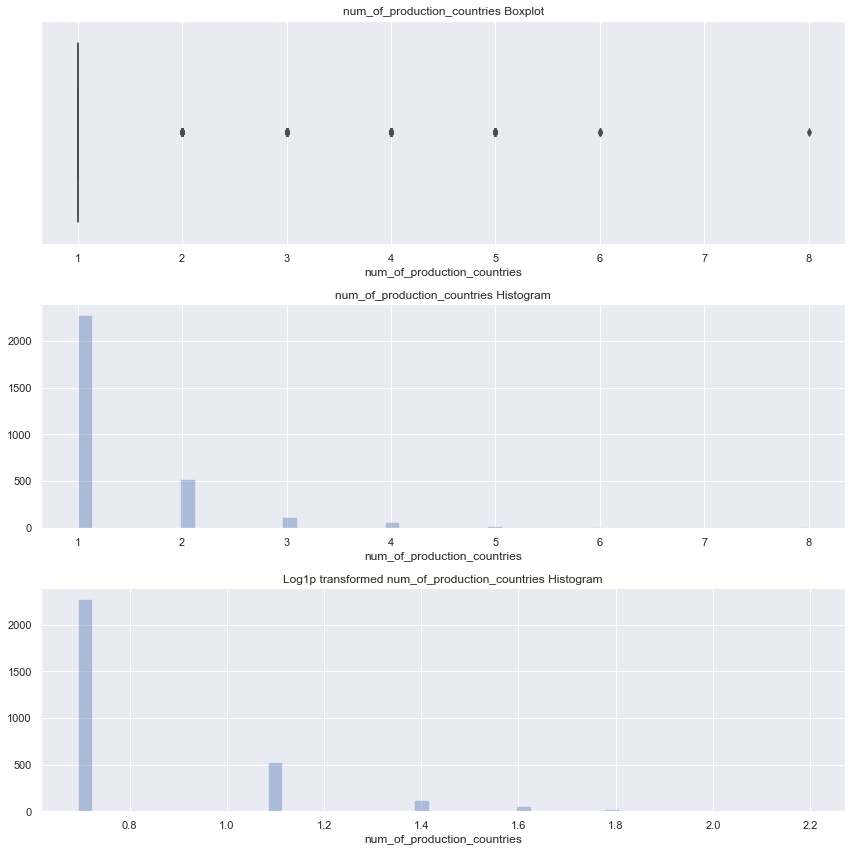

In [109]:
train_df["num_of_production_countries"] = train_df.production_countries_processed.apply(len)
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,12))

train_df.num_of_production_countries = train_df.num_of_production_countries.fillna(0)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)

sns.boxplot(x=train_df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")

sns.distplot(a=train_df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")

sns.distplot(a=np.log1p(train_df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")

f.tight_layout()


train_df["log_num_of_production_countries"] = np.log1p(train_df.num_of_production_countries)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

#### Number of Genres in a movie

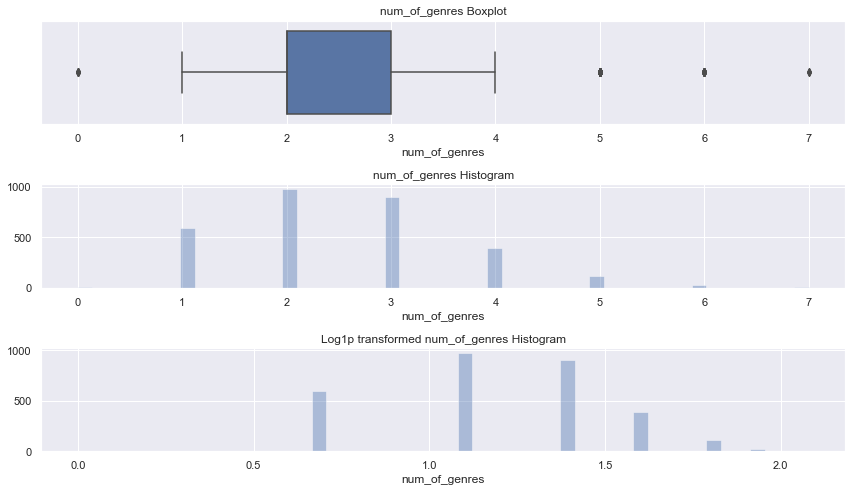

In [110]:
train_df["num_of_genres"] = train_df.genres_processed.apply(len)
test_df["num_of_genres"] = test_df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_genres = train_df.num_of_genres.fillna(0)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)

sns.boxplot(x=train_df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=train_df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(train_df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


train_df["log_num_of_genres"] = np.log1p(train_df.num_of_genres)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

### EDA - Bivariate Analysis

#### Bivariate Analysis for numerical features

In [111]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week', 'week_of_year',
       'num_of_cast', 'log_num_of_cast', 'num_of_male_cast',
       'log_num_of_male_cast', 'num_of_female_cast', 'log_num_of_female_cast',
       'num_of_crew', 'log_num_of_crew', 'num_of_male_crew',
       '

In [112]:
sns.set(rc = {'figure.figsize':(20,27)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_of_male_cast",
                 "num_of_female_cast",
                 "num_genres", "num_of_production_countries", "day_of_week", "month", "year", "week_of_year", "season",
                 "title_len", "overview_len", "tagline_len",
                 "num_of_directors", "num_of_producers", "num_of_editors", "num_of_art_crew", "num_of_sound_crew",
                 "num_of_costume_crew", "num_of_camera_crew", "num_of_visual_effects_crew", "num_of_lighting_crew",
                 "num_of_other_crew"]].corr()

Text(0.5, 1, 'Correlation between numerical features')

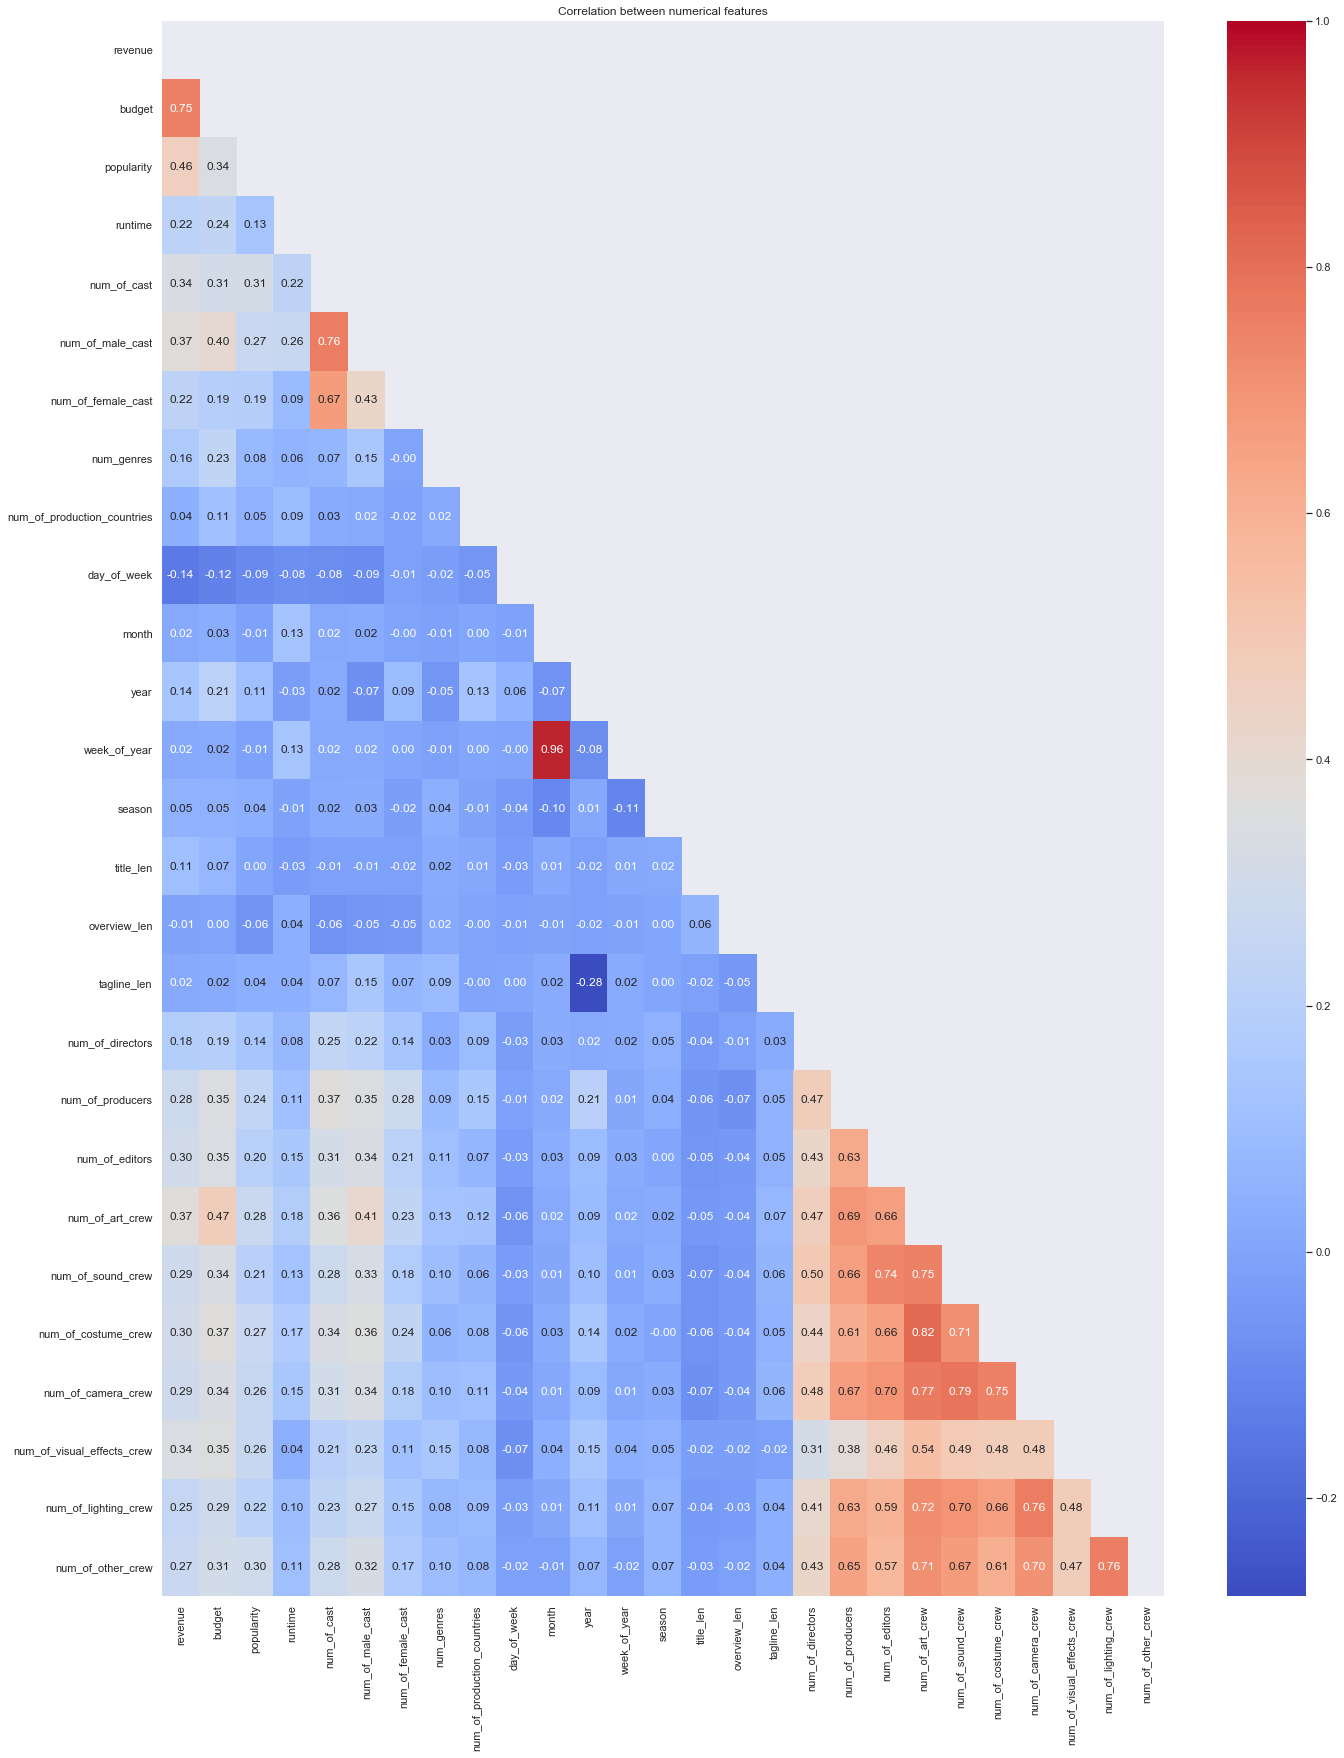

In [113]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

#### Bivariate Analysis for log-transformed numerical features

Text(0.5, 1, 'Correlation between log1p transformed numerical features')

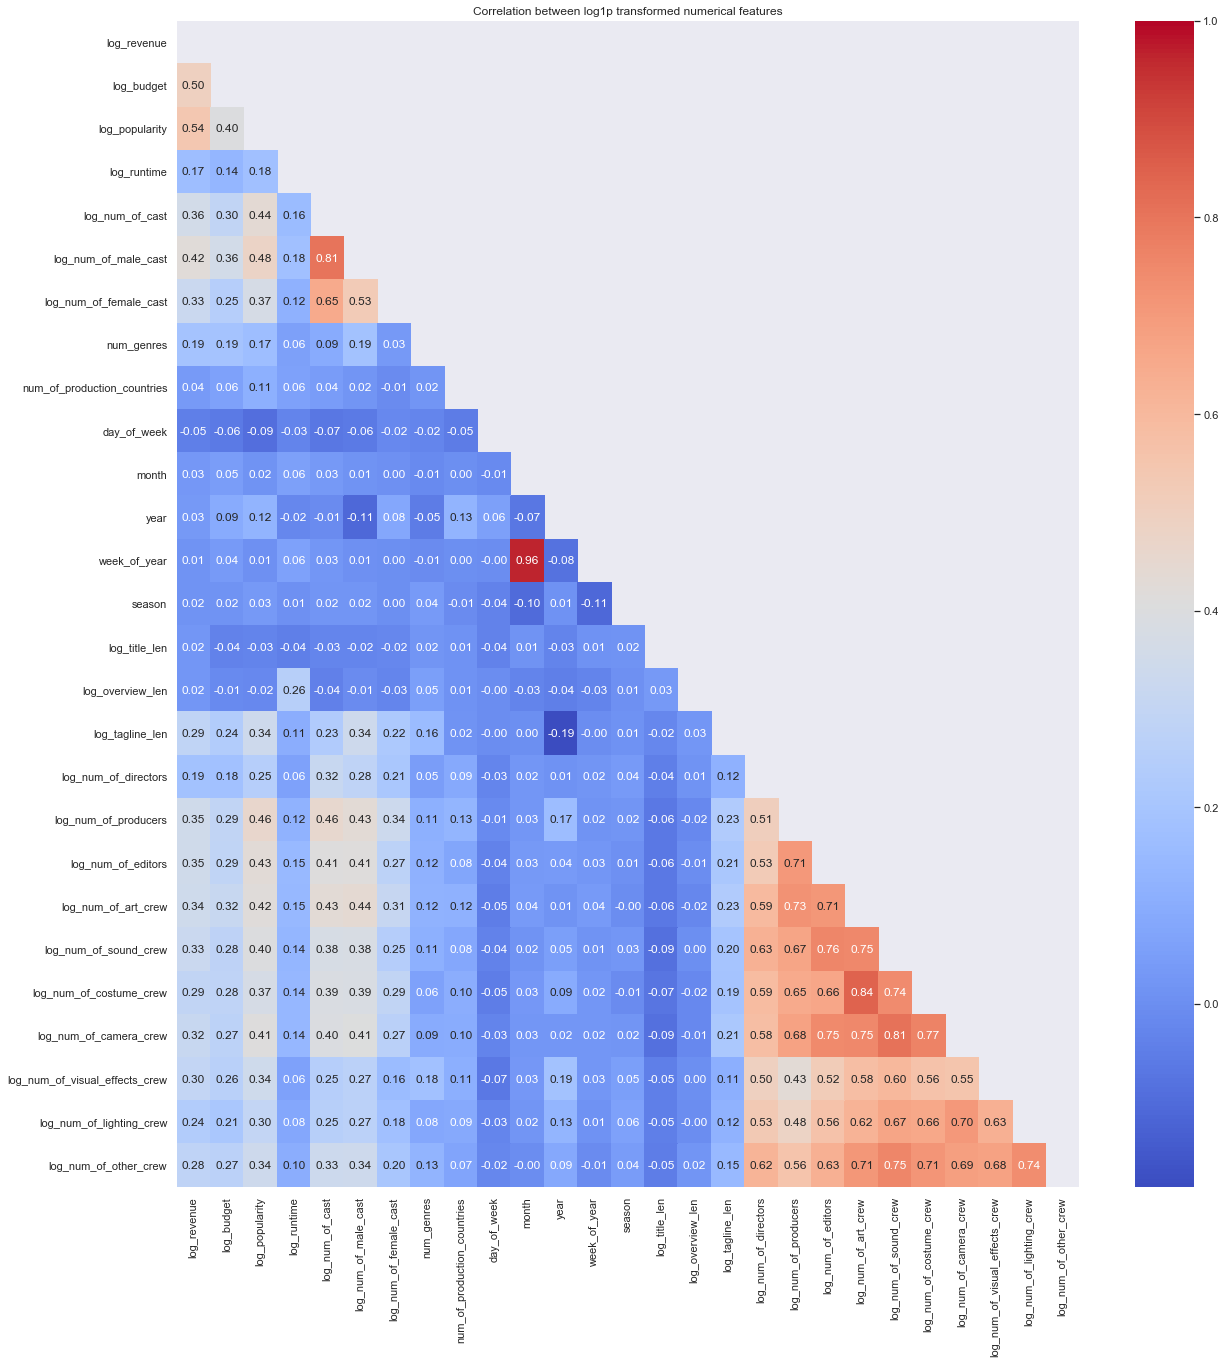

In [114]:
sns.set(rc = {'figure.figsize':(18,20)})

# Compute the correlation matrix
corr = train_df[["log_revenue", "log_budget", "log_popularity", "log_runtime",
                 "log_num_of_cast", "log_num_of_male_cast",
                 "log_num_of_female_cast", "num_genres", "num_of_production_countries",
                "day_of_week", "month", "year", "week_of_year", "season",
                "log_title_len", "log_overview_len", "log_tagline_len",
                "log_num_of_directors", "log_num_of_producers", "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew",
                       "log_num_of_costume_crew", "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

### Bivariate Analysis and Feature Engineering

#### has_collection and revenue

In [115]:
train_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
test_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in test_df['belongs_to_collection']]
print(train_df['has_collection'].value_counts())

0    2396
1     604
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

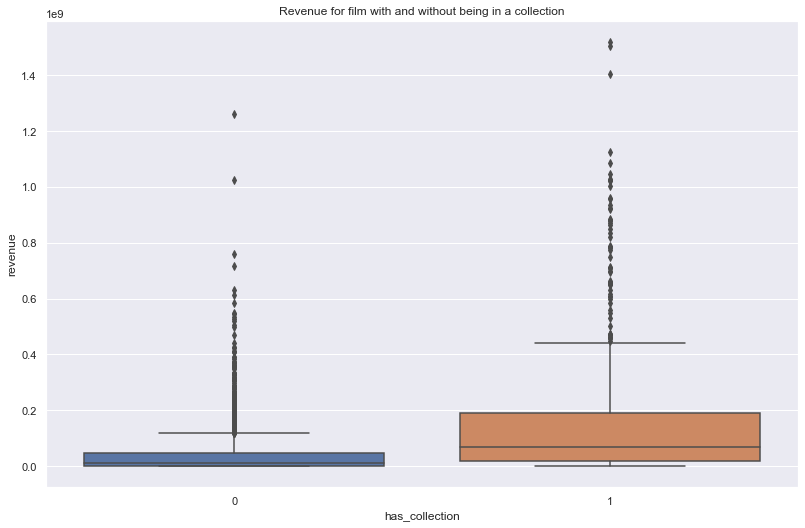

In [116]:
sns.set(rc = {'figure.figsize':(12, 8)})
sns.boxplot(x = 'has_collection', y = 'revenue', data = train_df)
plt.title('Revenue for film with and without being in a collection')

#### homepage and revenue

In [117]:
train_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]
print(train_df['has_homepage'].value_counts())

0    2054
1     946
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

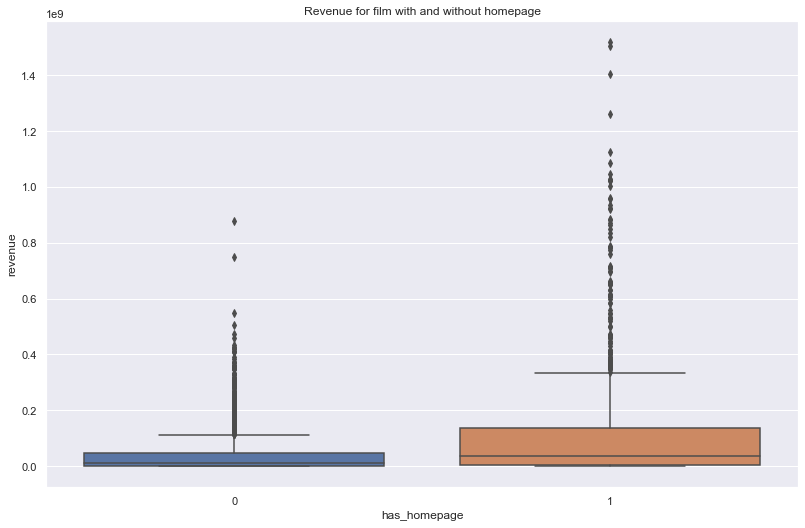

In [118]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=train_df)
plt.title('Revenue for film with and without homepage')

#### tagline and revenue

In [119]:
train_df['has_tag'] = [0 if len(x) == 0 else 1 for x in train_df['tagline']]
test_df['has_tag'] = [0 if len(x) == 0 else 1 for x in test_df['tagline']]
print(train_df['has_tag'].value_counts())

1    2403
0     597
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

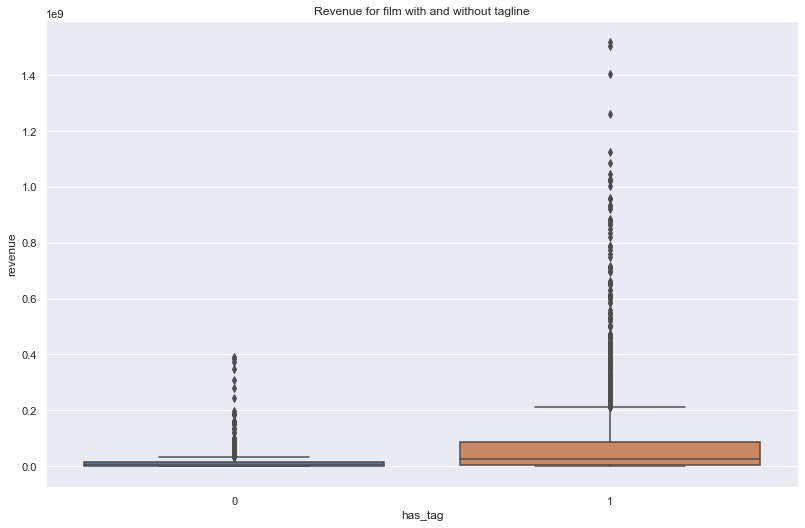

In [120]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=train_df)
plt.title('Revenue for film with and without tagline')

#### Number of Genres per movie and revenues

Text(0.5, 1.0, 'Revenues for films with multiple genres')

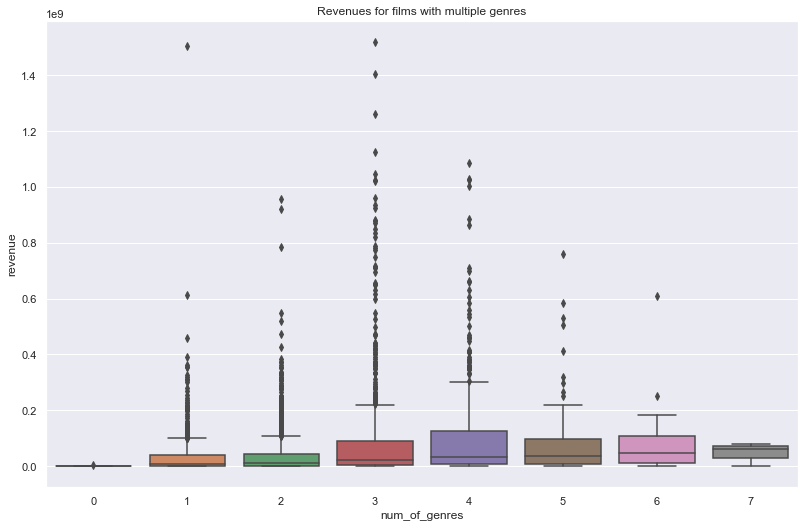

In [121]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=train_df)
plt.title('Revenues for films with multiple genres')

#### Bivariate Analysis between each genre and revenue

In [122]:
# for i, g in enumerate(genres_df.index.values):
#     genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

In [123]:
# genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [124]:
# genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
# plt.title("Sorted movie genres by median revenue")

In [125]:
# for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopGenre_' + p] = train_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
#     train_df['isTopGenre_Other'] = train_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)
#     test_df['isTopGenre_' + p] = test_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
#     test_df['isTopGenre_Other'] = test_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)

In [126]:
# f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

# for i, g in enumerate(genres_df.index.values):
#     sns.boxplot(x=train_df['isGenre_' + g], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isGenre_' + g +" and revenue boxplot")
# f.tight_layout()

#### original_language and revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

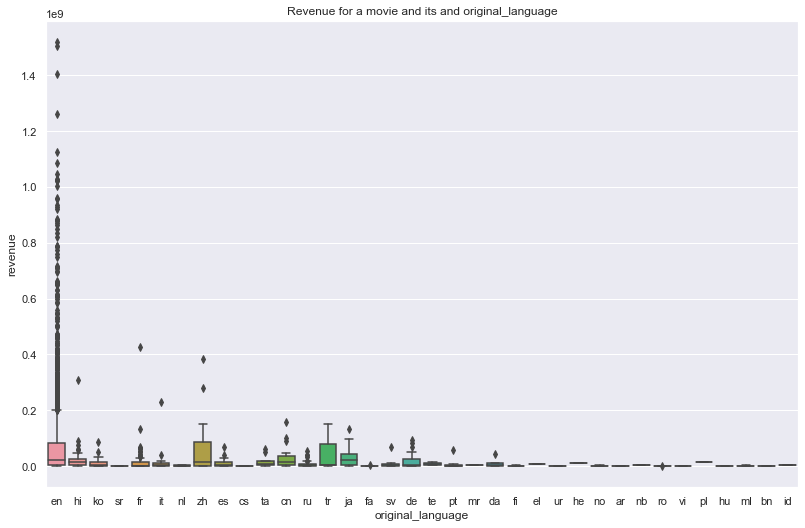

In [127]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=train_df)
plt.title('Revenue for a movie and its and original_language')

#### English and non english movies vs revenue

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

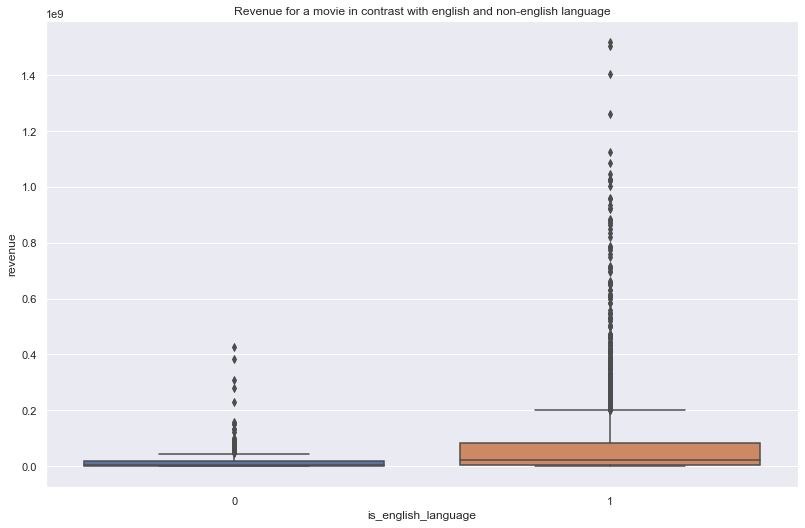

In [128]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=train_df)
plt.title('Revenue for a movie in contrast with english and non-english language')

#### production country and revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

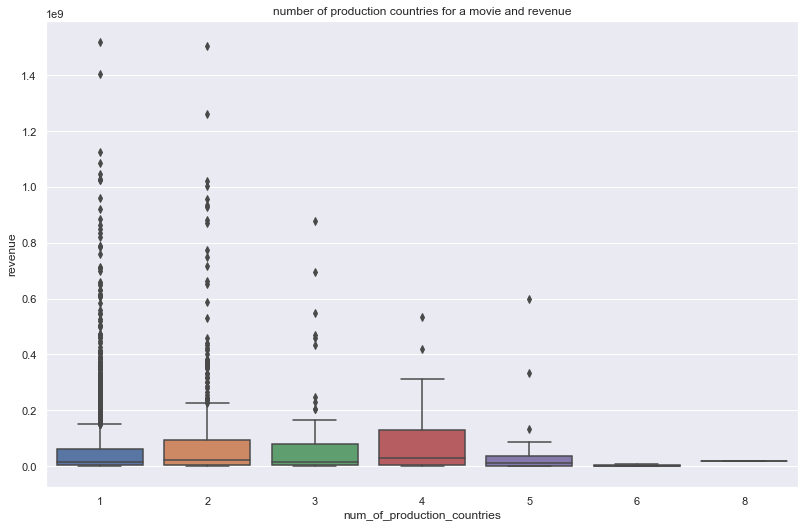

In [129]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=train_df)
plt.title('number of production countries for a movie and revenue')

In [130]:
# f, ax = plt.subplots(len(production_countries_df.index.values), 1, figsize=(15,350))

# for i, c in enumerate(production_countries_df.index.values):
#     sns.boxplot(x=train_df['isProductionCountry_' + c], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isProductionCountry_' + c +" and revenue boxplot")
# f.tight_layout()

In [131]:
# for i, c in enumerate(production_countries_df.index.values):
#     production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

# production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [132]:
# for i, p in enumerate(production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopProductionCountry_' + p] = train_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)
#     test_df['isTopProductionCountry_' + p] = test_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)

#### Day of the week when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

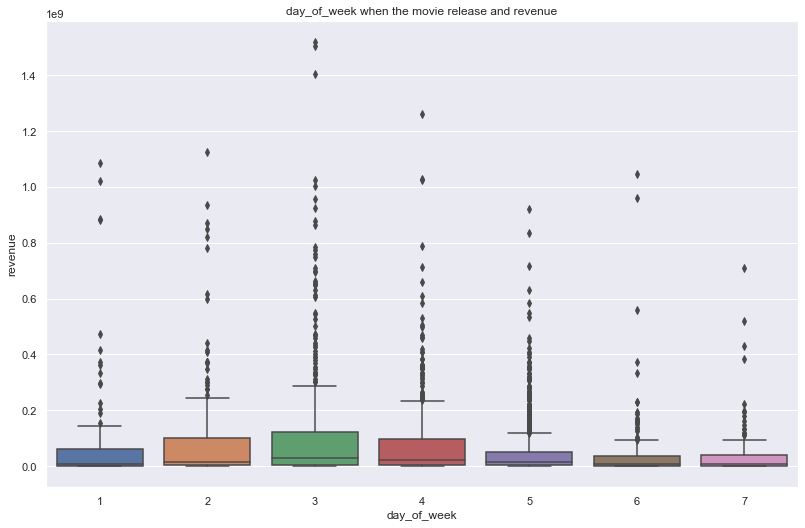

In [133]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Week of year when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

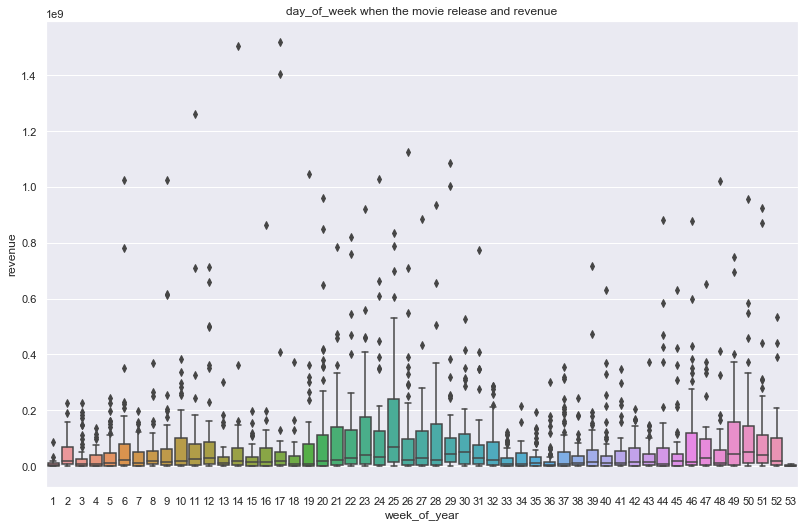

In [134]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='week_of_year', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Month when the movie released and revenue

Text(0.5, 1.0, 'month when the movie release and revenue')

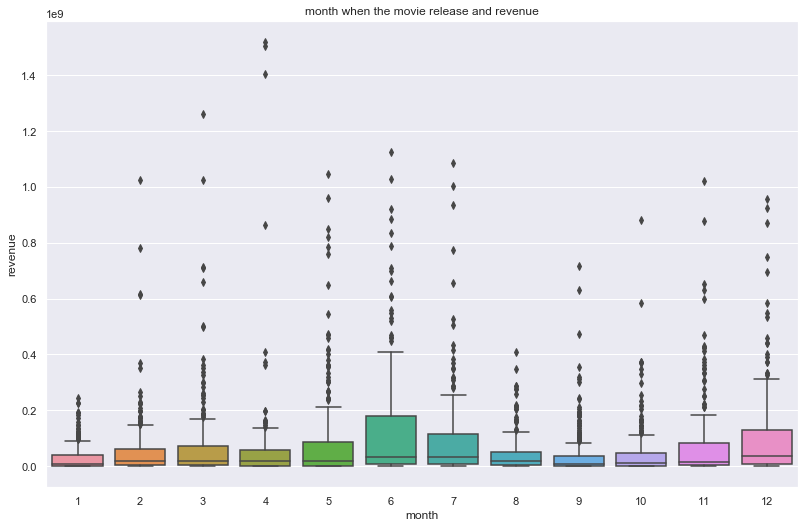

In [135]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=train_df)
plt.title('month when the movie release and revenue')

#### Season when the movie released and revenue

Text(0.5, 1.0, 'season when the movie release and revenue')

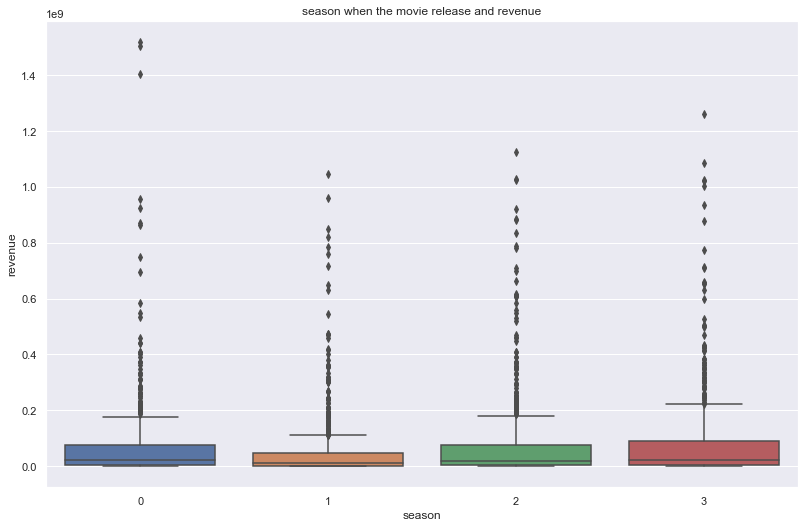

In [136]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='season', y='revenue', data=train_df)
plt.title('season when the movie release and revenue')

#### Year when the movie released and revenue

Text(0.5, 1.0, 'Year when the movie release and revenue')

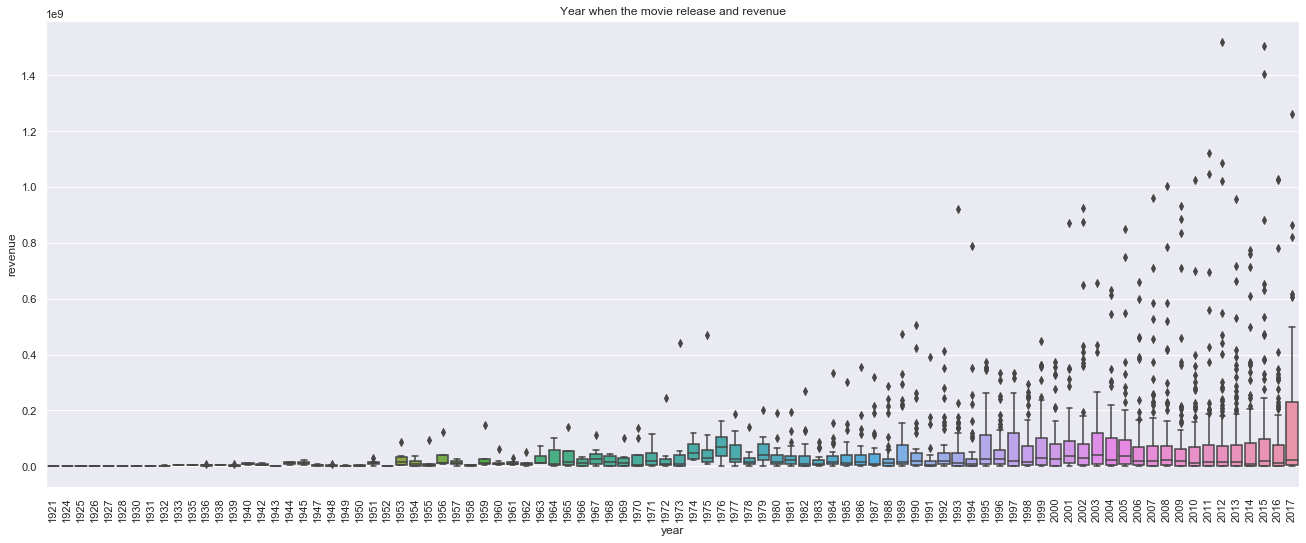

In [137]:
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=train_df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

#### Number of Production Companies and revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

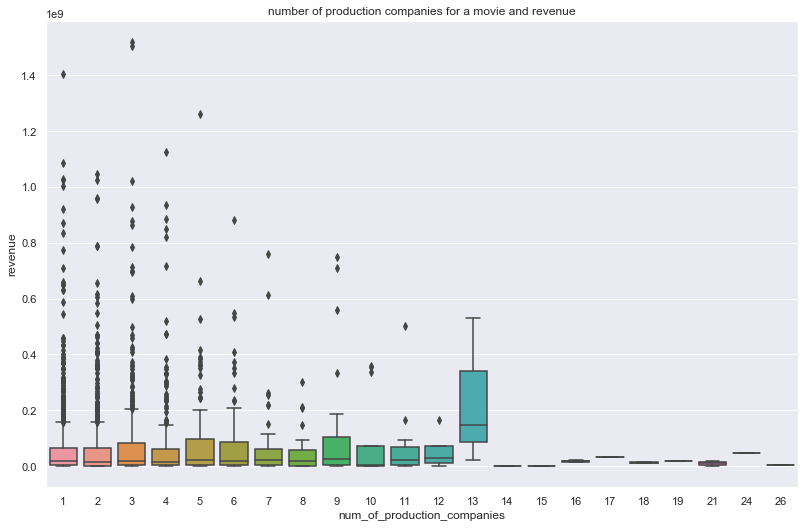

In [138]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=train_df)
plt.title('number of production companies for a movie and revenue')

In [139]:
# f, ax = plt.subplots(len(production_companies_df.head(5).index.values), 1, figsize=(15,20))

# for i, p in enumerate(production_companies_df.head(5).index.values):
#     sns.boxplot(x=train_df['isProductionCompany_' + p], y='revenue', ax=ax[i], data=train_df)
#     ax[i].set_title('isProductionCompany_' + p +" and revenue boxplot")
# f.tight_layout()

In [140]:
# for i, p in enumerate(production_companies_df.index.values):
#     production_companies_df.loc[p, "median_salary"] = train_df[train_df['isProductionCompany_' + p]==1].revenue.median()

# production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(5)

In [141]:
# for i, p in enumerate(production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
#     train_df['isTopProductionCompany_' + p] = train_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
#     #train_df['isTopProductionCompany_Other'] = train_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)
#     test_df['isTopProductionCompany_' + p] = test_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
#     #test_df['isTopProductionCompany_Other'] = test_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)

## Machine Learning

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

#### Preparations before ML modeling

In [142]:
pd.set_option('display.max_columns', None)
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'is_english_language',
       'production_companies_processed', 'num_of_production_companies',
       'production_countries_processed', 'log_popularity', 'runtime_in_hours',
       'log_runtime', 'month', 'season', 'year', 'day_of_week', 'week_of_year',
       'num_of_cast', 'log_num_of_cast', 'num_of_male_cast',
       'log_num_of_male_cast', 'num_of_female_cast', 'log_num_of_female_cast',
       'num_of_crew', 'log_num_of_crew', 'num_of_male_crew',
       '

In [143]:
columns_for_training = ["log_budget", "log_popularity", "log_runtime", "day_of_week", "year", "month", "week_of_year",
                        "season", "num_genres", "num_of_production_countries", "log_num_of_cast", "log_num_of_male_cast",
                        "log_num_of_female_cast", "has_collection", "has_homepage", "has_tag", "is_english_language",
                        "log_num_of_crew", "log_num_of_male_crew", "log_num_of_female_crew", "log_title_len",
                        "log_overview_len", "log_tagline_len", "log_num_of_directors", "log_num_of_producers",
                        "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew", "log_num_of_costume_crew",
                        "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]

In [144]:
# # adding isTopGenre_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopGenre_'), axis=1).columns.values)

# # adding isTopProductionCompany_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCompany_'), axis=1).columns.values)

# # adding isTopProductionCountry_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCountry_'), axis=1).columns.values)

# # adding has_top_actor_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_actor_'), axis=1).columns.values)

# # adding has_top_keyword_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_keyword_'), axis=1).columns.values)

# # adding has_top_director_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_director_'), axis=1).columns.values)

# # adding has_top_producer_ columns for features before ML modeling
# columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_producer_'), axis=1).columns.values)

columns_for_training

['log_budget',
 'log_popularity',
 'log_runtime',
 'day_of_week',
 'year',
 'month',
 'week_of_year',
 'season',
 'num_genres',
 'num_of_production_countries',
 'log_num_of_cast',
 'log_num_of_male_cast',
 'log_num_of_female_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'log_num_of_crew',
 'log_num_of_male_crew',
 'log_num_of_female_crew',
 'log_title_len',
 'log_overview_len',
 'log_tagline_len',
 'log_num_of_directors',
 'log_num_of_producers',
 'log_num_of_editors',
 'log_num_of_art_crew',
 'log_num_of_sound_crew',
 'log_num_of_costume_crew',
 'log_num_of_camera_crew',
 'log_num_of_visual_effects_crew',
 'log_num_of_lighting_crew',
 'log_num_of_other_crew']

In [145]:
train_df[columns_for_training].head(4)

log_budget  log_popularity  log_runtime  day_of_week  year  month  \
0   16.454568        2.024905     4.543295            5  2015      2   
1   17.504390        2.224504     4.736198            5  2004      8   
2   15.009433        4.178992     4.663439            5  2014     10   
3   13.997833        1.429099     4.812184            5  2012      3   

   week_of_year  season  num_genres  num_of_production_countries  \
0             8       2           1                            1   
1            32       0           4                            1   
2            41       2           1                            1   
3            10       3           2                            1   

   log_num_of_cast  log_num_of_male_cast  log_num_of_female_cast  \
0         3.218876              2.397895                2.197225   
1         3.044522              2.397895                2.397895   
2         3.951244              2.639057                2.079442   
3         2.079442              1.098612                0.693147   

   has_collection  has_homepage  has_tag  is_english_language  \
0               1             0        1                    1   
1               1             0        1                    1   
2               0             1        1                    1   
3               0             1        0                    0   

   log_num_of_crew  log_num_of_male_crew  log_num_of_female_crew  \
0         4.290459              2.639057                0.000000   
1         2.302585              1.609438                1.609438   
2         4.174387              2.484907                1.609438   
3         1.386294              0.000000                0.000000   

   log_title_len  log_overview_len  log_tagline_len  log_num_of_directors  \
0       3.135494          5.049856         3.970292              1.609438   
1       3.713572          5.976351         4.110874              0.693147   
2       2.197225          4.875197         3.871201              1.386294   
3       2.079442          6.366470         0.000000              0.693147   

   log_num_of_producers  log_num_of_editors  log_num_of_art_crew  \
0              2.708050            1.098612             2.944439   
1              1.609438            0.693147             0.000000   
2              3.044522            1.945910             2.197225   
3              0.693147            0.000000             0.000000   

   log_num_of_sound_crew  log_num_of_costume_crew  log_num_of_camera_crew  \
0               2.772589                 2.639057                2.197225   
1               0.693147                 0.000000                0.693147   
2               2.708050                 1.791759                1.609438   
3               0.000000                 0.000000                0.000000   

   log_num_of_visual_effects_crew  log_num_of_lighting_crew  \
0                        1.609438                  1.609438   
1                        0.000000                  0.000000   
2                        1.386294                  0.693147   
3                        0.000000                  0.000000   

   log_num_of_other_crew  
0               1.609438  
1               0.000000  
2               2.302585  
3               0.000000

### Checking for NA values in feature before training

In [146]:
train_df[columns_for_training].isna().sum().sum()

0

In [147]:
len(columns_for_training)

33

In [148]:
### a small snippet code for t-test significance between 2 groups, I may use it in the future:


#from scipy import stats

#columns_to_test = train_df.select(lambda col: col.startswith('isProductionCompany_'), axis=1).columns.values

#def check_catagorical_to_revenue_statistical_difference(train_df):
    
#    for col in columns_to_test:

#        a = train_df[train_df[col]==0].revenue
#        b = train_df[train_df[col]==1].revenue
#        t2, p2 = stats.ttest_ind(a,b)
#        if p2<0.05:
#            print(col , " is important for prediction with p-value:", p2)
        
#check_catagorical_to_revenue_statistical_difference(train_df)
    

In [149]:
y = train_df['log_revenue']
X = train_df[columns_for_training]
kfold_splits = 5

### Baseline XGBoost modeling

In [164]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

In [165]:
# create a 70/30 stratified split of the data 

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state = 0, test_size = 0.2)

predictions_test_xgb = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits = num_of_splits, shuffle = False, random_state = 0)

In [166]:
for train_index, valid_index in folds.split(xtrain, ytrain):
    print(train_index, '\n*****\n',  valid_index)

[ 480  481  482 ... 2397 2398 2399] 
*****
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

In [167]:
for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_stra_xgb = xgb.XGBRegressor(n_estimators=10000, seed = 0, n_jobs=-1)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set = [(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                     early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    
    print("Fold",num_fold,"xvalid rmse:",rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb += clf_stra_xgb.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

[11:15:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.1776	validation_1-rmse:14.2841
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.75536	validation_1-rmse:2.13473
[200]	validation_0-rmse:1.52493	validation_1-rmse:2.12986
[300]	validation_0-rmse:1.36189	validation_1-rmse:2.17049
[400]	validation_0-rmse:1.236	validation_1-rmse:2.18821
[500]	validation_0-rmse:1.12122	validation_1-rmse:2.20981
[600]	validation_0-rmse:1.02104	validation_1-rmse:2.22889
[700]	validation_0-rmse:0.938805	validation_1-rmse:2.23951
[800]	validation_0-rmse:0.870943	validation_1-rmse:2.25258
[900]	validation_0-rmse:0.798975	validation_1-rmse:2.26301
[1000]	validation_0-rmse:0.741675	validation_1-rmse:2.27054
[1100]	validation_0-rmse:0.692302	validation_1-rmse:2.27752
Stopping. Best

In [171]:
predictions_test_xgb.shape

(4398,)

In [172]:
predictions_test_xgb = np.expm1(predictions_test_xgb)
print()
print(predictions_test_xgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 1735961.51676635   248439.42914325  4291647.62058673 ...
 39440978.16755334  4522223.72925275   927418.41027402]
OOF Out-of-fold rmse: 2.0695330996712853


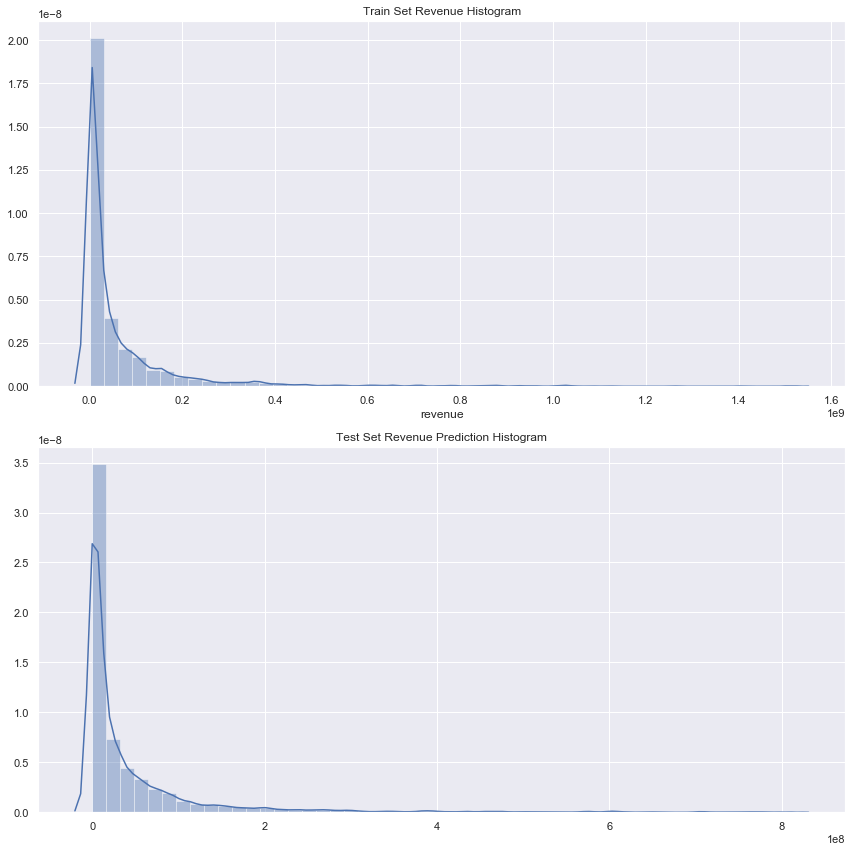

In [173]:
f, ax = plt.subplots(2, figsize=(12,12))


sns.set(rc={'figure.figsize':(9,86)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_xgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

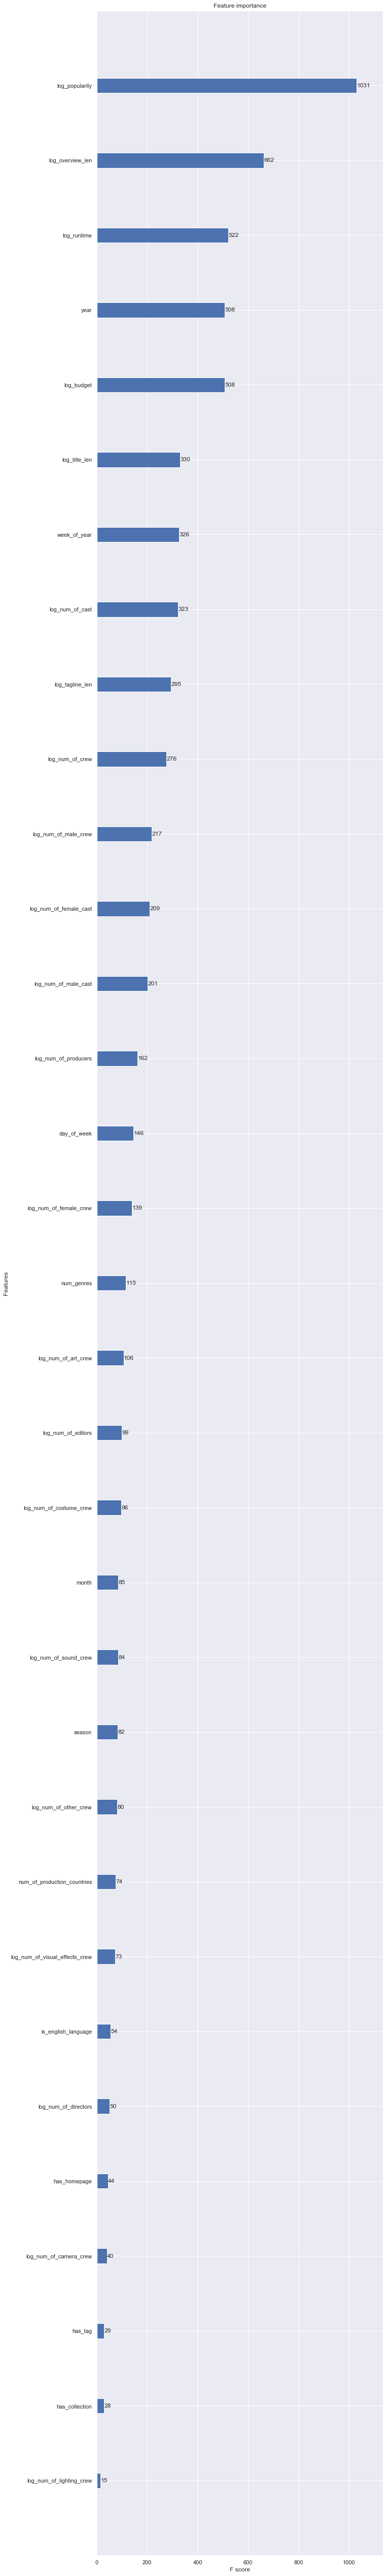

In [174]:
xgb.plot_importance(clf_stra_xgb)

### Bayesian Tuning

In [177]:
from skopt import BayesSearchCV

In [187]:
xgb.XGBRegressor?

In [206]:
# 'gamma': (0.1, 1, 'log-uniform'), 
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    import xgboost as xgb
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(estimator = xgb.XGBRegressor(n_jobs = -1, objective = 'reg:squarederror', verbosity=1, 
                                                                random_state = 42),
                                   search_spaces = {'learning_rate': (0.1, 1.0, 'log-uniform'), 'min_child_weight': (0, 10),
                                                    'n_estimators': (50, 300), 'max_depth': (2, 12), 
                                                    'subsample': (0.1, 1.0, 'uniform'),
                                                    'colsample_bytree': (0.01, 1.0, 'uniform'),
                                                    'colsample_bylevel': (0.01, 1.0, 'uniform'),
                                                    'reg_lambda': (1, 10, 'log-uniform'), 
                                                    'reg_alpha': (1e-2, 1.0, 'log-uniform')},
                                   cv = KFold(n_splits = kfold_splits, shuffle = True, random_state = 42), 
                                   scoring = 'neg_mean_squared_error', n_jobs = -1, n_iter = 12, verbose=0, refit = True,
                                   random_state = 42)

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result

In [207]:
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -17.1999
Best params: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('learning_rate', 0.8567773934012717), ('max_depth', 5), ('min_child_weight', 7), ('n_estimators', 154), ('reg_alpha', 0.050334141977735516), ('reg_lambda', 8), ('subsample', 0.37401697993285554)])

Model #2
Best score: -5.2024
Best params: OrderedDict([('colsample_bylevel', 0.8390144719977516), ('colsample_bytree', 0.8844821246070537), ('learning_rate', 0.20109909209436555), ('max_depth', 12), ('min_child_weight', 9), ('n_estimators', 66), ('reg_alpha', 0.018906758484967926), ('reg_lambda', 4), ('subsample', 0.6721561916912533)])

Model #3
Best score: -5.1795
Best params: OrderedDict([('colsample_bylevel', 0.4503841871781403), ('colsample_bytree', 0.9195352964526833), ('learning_rate', 0.12730901516699064), ('max_depth', 6), ('min_child_weight', 2), ('n_estimators', 163), ('reg_alpha', 0.020459551449165617), ('reg_lambda', 8), ('subsample', 0.601

In [208]:
result

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              error_score='raise',
              estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     importance_type='gain', learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=-1, nthread=None,
                                     obj...
              scoring='neg_mean_squared_error',
              search_spaces={'colsample_bylevel': (0.01, 1.0, 'uniform'),
                             'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'learning_rate': (0.1, 1.0, 'log-uniform'),
                             'max_depth': (2, 12), 'min_child_weight': (

In [209]:
result.best_params_

OrderedDict([('colsample_bylevel', 0.7366877378057127),
             ('colsample_bytree', 0.9399760402267441),
             ('learning_rate', 0.14574953526191625),
             ('max_depth', 4),
             ('min_child_weight', 8),
             ('n_estimators', 143),
             ('reg_alpha', 0.08280356368997302),
             ('reg_lambda', 6),
             ('subsample', 0.8067555434282462)])

### XGBoost Training after tuning

In [210]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2)

predictions_test_xgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

In [212]:
for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_stra_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                          colsample_bylevel = result.best_params_["colsample_bylevel"],
                                    #gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    n_jobs = -1)

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold", num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_tuned += clf_stra_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

[12:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13.5156	validation_1-rmse:13.5655
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.48526	validation_1-rmse:1.95843
[200]	validation_0-rmse:1.09317	validation_1-rmse:1.99732
[300]	validation_0-rmse:0.835218	validation_1-rmse:2.02531
[400]	validation_0-rmse:0.646475	validation_1-rmse:2.04613
[500]	validation_0-rmse:0.505394	validation_1-rmse:2.06397
[600]	validation_0-rmse:0.398222	validation_1-rmse:2.07442
[700]	validation_0-rmse:0.317025	validation_1-rmse:2.07563
[800]	validation_0-rmse:0.256501	validation_1-rmse:2.08557
[900]	validation_0-rmse:0.205149	validation_1-rmse:2.09146
[1000]	validation_0-rmse:0.165381	validation_1-rmse:2.09309
[1100]	validation_0-rmse:0.136451	validation_1-rmse:2.09872
Stopping

In [213]:
print()
predictions_test_xgb_tuned = np.expm1(predictions_test_xgb_tuned)
print(predictions_test_xgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2289798.96332452   368236.45204944  8284522.49109684 ...
 56772331.4326326   6227724.35948169   570885.5343705 ]
OOF Out-of-fold rmse: 2.040137145106024


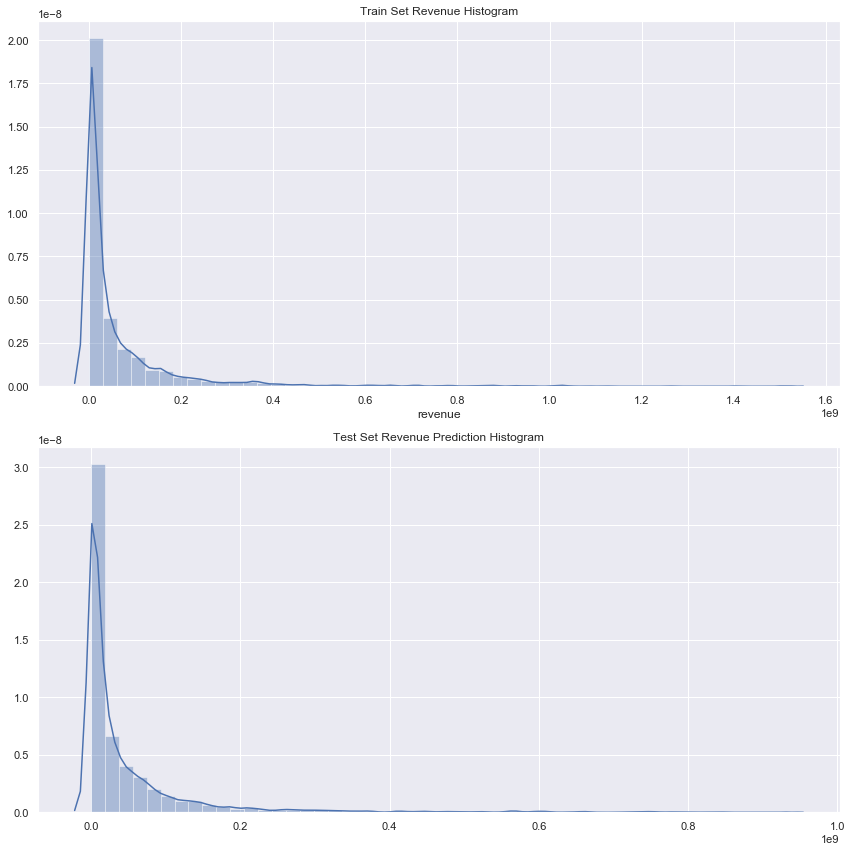

In [215]:
f, ax = plt.subplots(2, figsize=(12,12))

sns.set(rc = {'figure.figsize':(9,86)})

sns.distplot(train_df.revenue, ax = ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_xgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

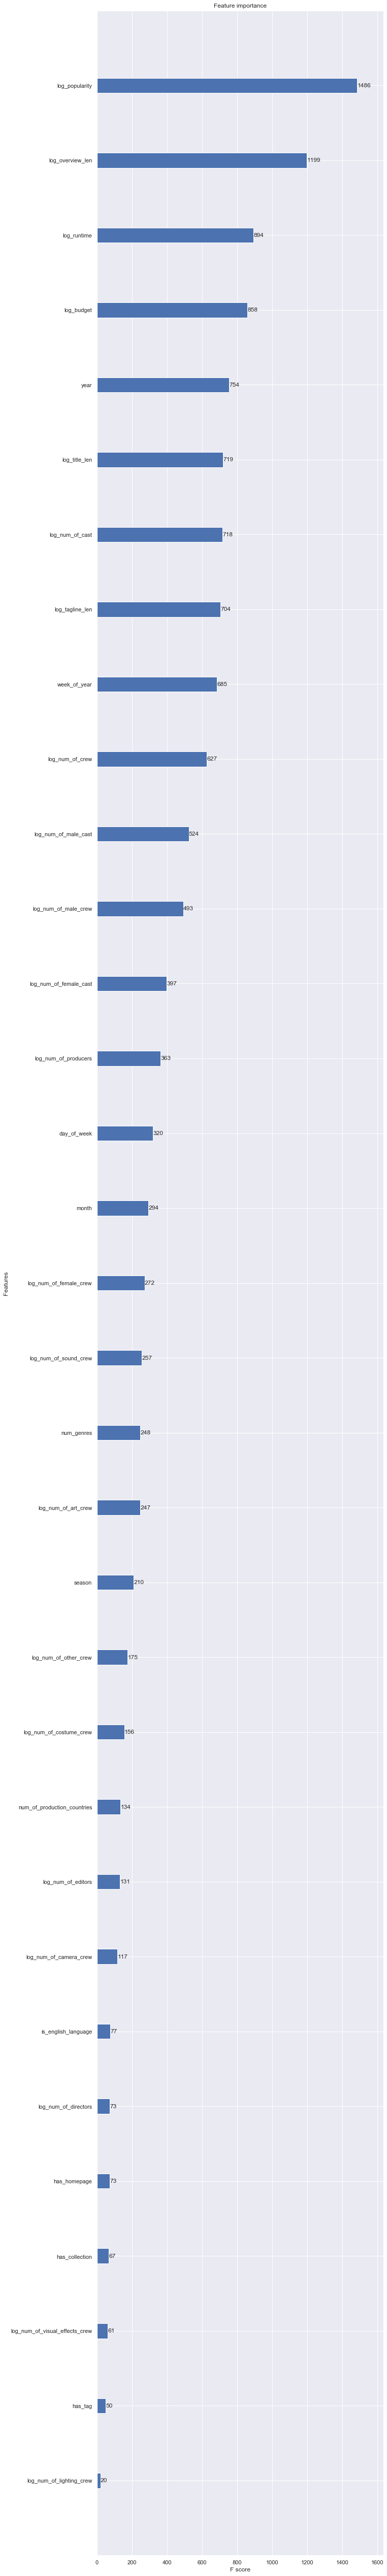

In [216]:
xgb.plot_importance(clf_stra_tuned_xgb)

### Extra Trees Baseline Modeling

In [217]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

In [218]:
# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2)

predictions_extra_trees_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits = num_of_splits, shuffle = False, random_state = 42)

In [219]:
for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_extra_trees = ExtraTreesRegressor(n_estimators = 100, random_state = 42)

    clf_extra_trees.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_test += clf_extra_trees.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Fold 0 xvalid rmse: 2.080986433160636
**************************************************

Fold: 1

Fold 1 xvalid rmse: 2.0643670736091826
**************************************************

Fold: 2

Fold 2 xvalid rmse: 2.014749044017871
**************************************************

Fold: 3

Fold 3 xvalid rmse: 2.0486815879268514
**************************************************

Fold: 4

Fold 4 xvalid rmse: 2.0752348444041635
**************************************************


In [220]:
predictions_extra_trees_test = np.expm1(predictions_extra_trees_test)
print()
print(predictions_extra_trees_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2889016.08388981   755097.10983966  8267607.57784905 ...
 28110630.57701315  4697289.27605215  1099015.67308838]

OOF Out-of-fold rmse: 2.056803796623741


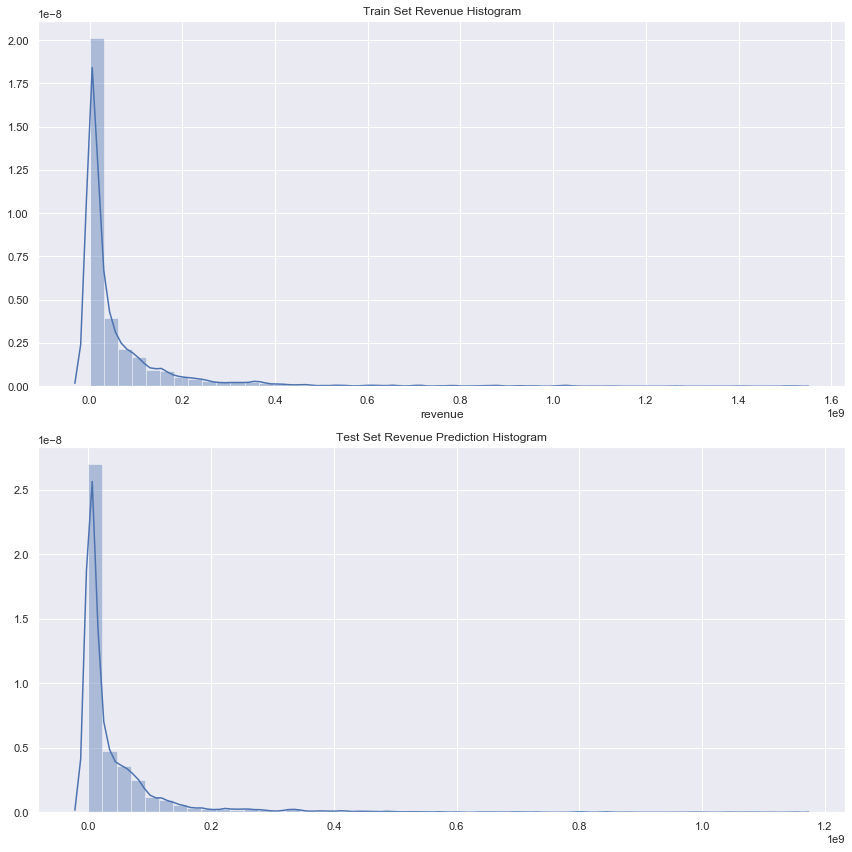

In [221]:
f, ax = plt.subplots(2, figsize=(12,12))


sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_extra_trees_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

### Extra Trees Tuning

In [241]:
def bayesian_tuning_extra_trees(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(estimator = ExtraTreesRegressor(random_state=42),
                                   search_spaces = {'n_estimators': (10, 500), 'max_depth': (1, 12),
                                                    'min_samples_split': (2, 20), 'min_samples_leaf': (1, 20)},
                                   cv = KFold(n_splits = kfold_splits, shuffle=True, random_state=42),
                                   scoring = 'neg_mean_squared_error', n_jobs = 2, n_iter = 12, verbose = 0, refit = True,
                                   random_state = 42)

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)

        # Get current parameters and the best parameters
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_))
        
    result_extra_trees = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_extra_trees

In [242]:
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_extra_trees = bayesian_tuning_extra_trees(xtrain, ytrain)

Model #1
Best score: -4.9951
Best params: OrderedDict([('max_depth', 6), ('min_samples_leaf', 15), ('min_samples_split', 19), ('n_estimators', 165)])

Model #2
Best score: -4.9132
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 18), ('min_samples_split', 7), ('n_estimators', 476)])

Model #3
Best score: -4.9132
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 18), ('min_samples_split', 7), ('n_estimators', 476)])

Model #4
Best score: -4.7696
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #5
Best score: -4.7696
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #6
Best score: -4.7696
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #7
Best score: -4.7696
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf',

In [243]:
result_extra_trees.best_params_

OrderedDict([('max_depth', 10),
             ('min_samples_leaf', 1),
             ('min_samples_split', 14),
             ('n_estimators', 362)])

### Extra Trees Training after tuning

In [244]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2)

predictions_extra_trees_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits = num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_extra_trees_tuned = ExtraTreesRegressor(random_state=42, 
                                                max_depth = result_extra_trees.best_params_['max_depth'], 
                                                min_samples_leaf = result_extra_trees.best_params_['min_samples_leaf'], 
                                                min_samples_split = result_extra_trees.best_params_['min_samples_split'], 
                                                n_estimators = result_extra_trees.best_params_['n_estimators'])

    clf_extra_trees_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_tuned_test += clf_extra_trees_tuned.predict(test_df[xtrain.columns])/num_of_splits


Fold: 0

Fold 0 xvalid rmse: 2.046020111762375

Fold: 1

Fold 1 xvalid rmse: 2.036046072874011

Fold: 2

Fold 2 xvalid rmse: 2.0166136936815575

Fold: 3

Fold 3 xvalid rmse: 2.0273023753173933

Fold: 4

Fold 4 xvalid rmse: 2.04397025611396


In [245]:
predictions_extra_trees_tuned_test = np.expm1(predictions_extra_trees_tuned_test)
print()
print(predictions_extra_trees_tuned_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 1724132.7974753   1000721.57954864  7387577.15594556 ...
 26518794.72558952  5732570.66008433  1578095.41814792]

OOF Out-of-fold rmse: 2.0339905019498596


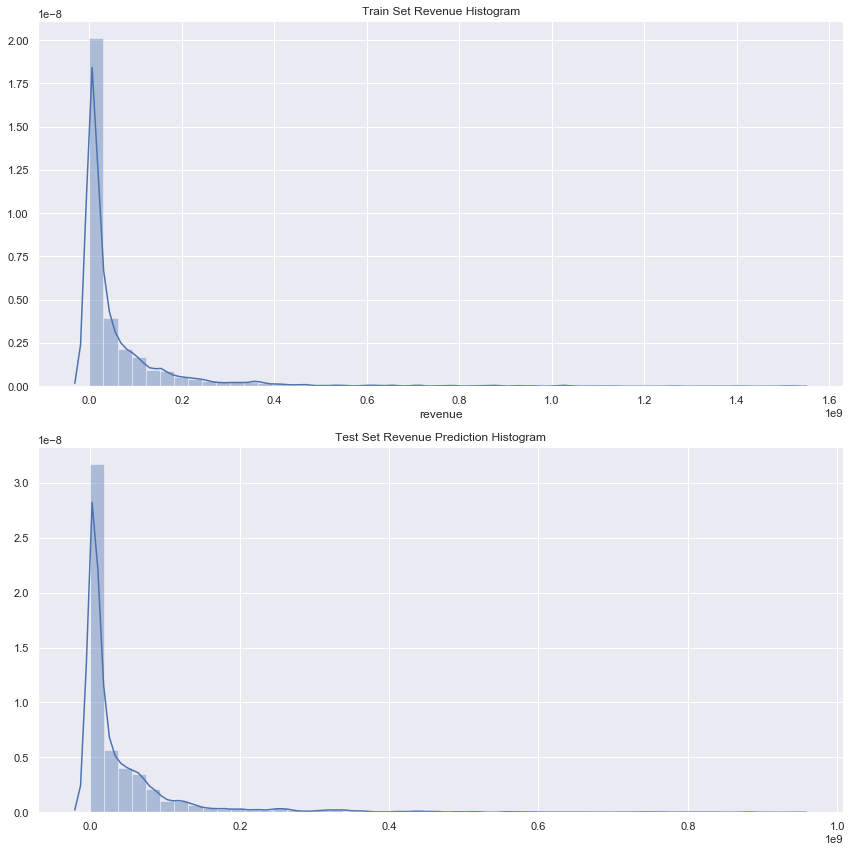

In [246]:
f, ax = plt.subplots(2, figsize=(12,12))


sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_extra_trees_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

### Random Forest Baseline

In [247]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2)

predictions_random_forest_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

In [248]:
for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_random_forest = RandomForestRegressor(random_state = 42, n_estimators = 100)

    clf_random_forest.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_random_forest_test += clf_random_forest.predict(test_df[xtrain.columns])/num_of_splits


Fold: 0

Fold 0 xvalid rmse: 2.0970103340078303

Fold: 1

Fold 1 xvalid rmse: 2.120828118896155

Fold: 2

Fold 2 xvalid rmse: 2.1067434215821903

Fold: 3

Fold 3 xvalid rmse: 2.1355875935636286

Fold: 4

Fold 4 xvalid rmse: 2.1062431729188478


In [249]:
predictions_random_forest_test = np.expm1(predictions_random_forest_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 1918685.0378077    224739.58609018 11780731.51708345 ...
 35533299.98518002  3607696.34906662   547358.57026669]

OOF Out-of-fold rmse: 2.1132825281937304


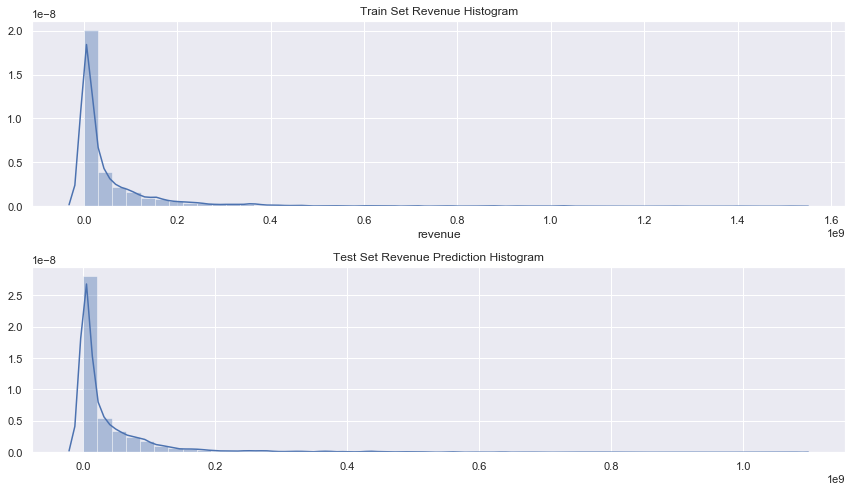

In [250]:
f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Tuning

In [251]:
def bayesian_tuning_random_forest(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import RandomForestRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(estimator = RandomForestRegressor(random_state = 42),
                                   search_spaces = {'n_estimators': (10, 500), 'max_depth': (1, 10),
                                                    'min_samples_split': (2, 20), 'min_samples_leaf': (1, 20)},
                                   cv = KFold(n_splits = kfold_splits, shuffle = True, random_state = 42),
                                   scoring = 'neg_mean_squared_error', n_jobs = -1, n_iter = 12, verbose = 0, refit = True,
                                   random_state = 42)

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(len(all_models),
                                                                    np.round(bayes_cv_tuner.best_score_, 4),
                                                                    bayes_cv_tuner.best_params_))
        
    result_random_forest = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_random_forest

In [252]:
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_random_forest = bayesian_tuning_random_forest(xtrain, ytrain)

Model #1
Best score: -4.8689
Best params: OrderedDict([('max_depth', 5), ('min_samples_leaf', 15), ('min_samples_split', 19), ('n_estimators', 165)])

Model #2
Best score: -4.7814
Best params: OrderedDict([('max_depth', 9), ('min_samples_leaf', 18), ('min_samples_split', 7), ('n_estimators', 476)])

Model #3
Best score: -4.7814
Best params: OrderedDict([('max_depth', 9), ('min_samples_leaf', 18), ('min_samples_split', 7), ('n_estimators', 476)])

Model #4
Best score: -4.7649
Best params: OrderedDict([('max_depth', 8), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #5
Best score: -4.7649
Best params: OrderedDict([('max_depth', 8), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #6
Best score: -4.7649
Best params: OrderedDict([('max_depth', 8), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #7
Best score: -4.7649
Best params: OrderedDict([('max_depth', 8), ('min_samples_leaf', 4), (

In [253]:
result_random_forest.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 4),
             ('min_samples_split', 13),
             ('n_estimators', 403)])

### Random Forest After tuning

In [255]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2)

predictions_random_forest_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_random_forest_tuned = RandomForestRegressor(random_state=42, 
                                              n_estimators = result_random_forest.best_params_['n_estimators'],
                                              min_samples_leaf = result_random_forest.best_params_['min_samples_leaf'],
                                              min_samples_split = result_random_forest.best_params_['min_samples_split'])

    clf_random_forest_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_random_forest_tuned_test += clf_random_forest_tuned.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Fold xvalid rmse: 2.086290096835683
**************************************************

Fold: 1

Fold xvalid rmse: 2.1114258554736396
**************************************************

Fold: 2

Fold xvalid rmse: 2.0821453016623166
**************************************************

Fold: 3

Fold xvalid rmse: 2.076505174134278
**************************************************

Fold: 4

Fold xvalid rmse: 2.084969378793766
**************************************************


In [256]:
predictions_random_forest_tuned_test = np.expm1(predictions_random_forest_tuned_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 1918685.0378077    224739.58609018 11780731.51708345 ...
 35533299.98518002  3607696.34906662   547358.57026669]

OOF Out-of-fold rmse: 2.0882671613799366


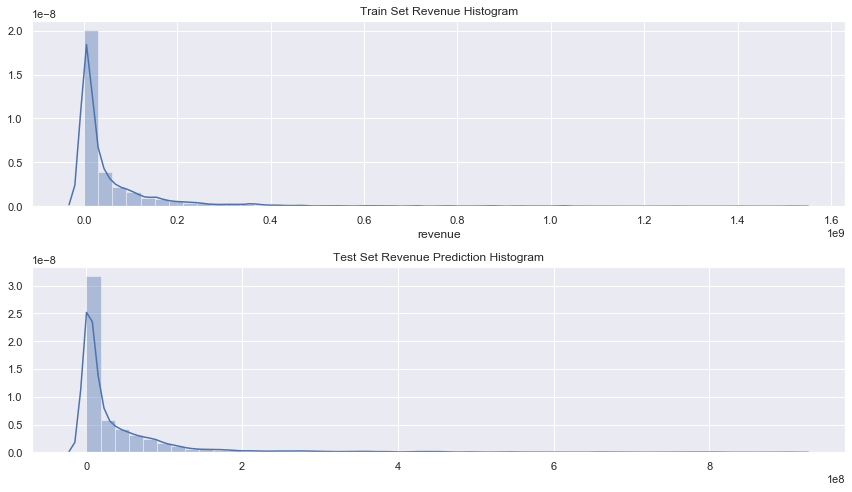

In [257]:
f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_random_forest_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

### LightGBM Boosting

In [258]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

params = {"metric": 'rmse', "verbosity": -1}

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state = 42, test_size = 0.2)

predictions_test_lgb = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
    model_lgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                  eval_metric='rmse', verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_lgb += model_lgb.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.906496	valid_1's rmse: 2.03422
[200]	training's rmse: 0.499253	valid_1's rmse: 2.05707
[300]	training's rmse: 0.28641	valid_1's rmse: 2.07778
[400]	training's rmse: 0.170516	valid_1's rmse: 2.08723
[500]	training's rmse: 0.104868	valid_1's rmse: 2.09051
[600]	training's rmse: 0.0648611	valid_1's rmse: 2.09267
[700]	training's rmse: 0.0409589	valid_1's rmse: 2.09503
[800]	training's rmse: 0.0258241	valid_1's rmse: 2.09636
[900]	training's rmse: 0.0167078	valid_1's rmse: 2.09674
[1000]	training's rmse: 0.0109219	valid_1's rmse: 2.097
Early stopping, best iteration is:
[24]	training's rmse: 1.69094	valid_1's rmse: 1.99019
Fold 0 xvalid rmse: 2.1152529984031387
**************************************************

Fold: 1

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.86683	valid_1's rmse: 2.2154
[200]	training's rmse: 0.468575	valid_1's rmse: 2.24918
[3

In [259]:
predictions_test_lgb = np.expm1(predictions_test_lgb)
print()
print(predictions_test_lgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2908794.38120754   260921.61681481 12834818.36570298 ...
 37536908.95236896  3281227.96179158   307637.13097532]
OOF Out-of-fold rmse: 2.1145124483798194


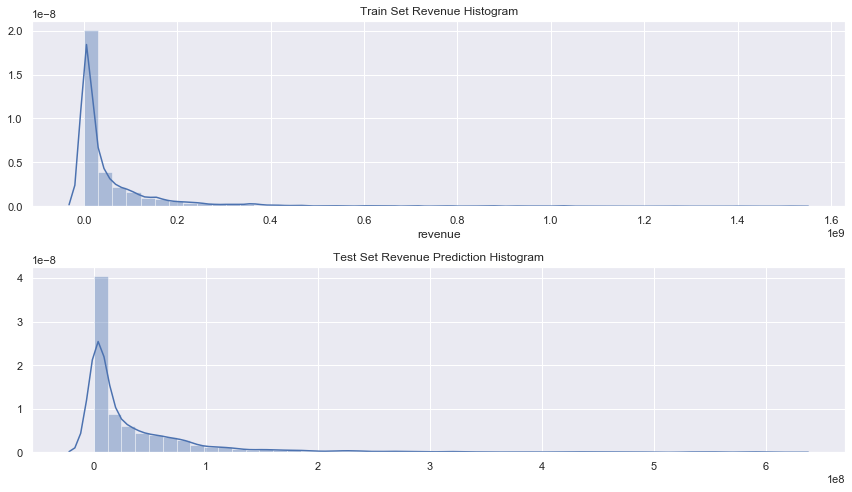

In [260]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_lgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

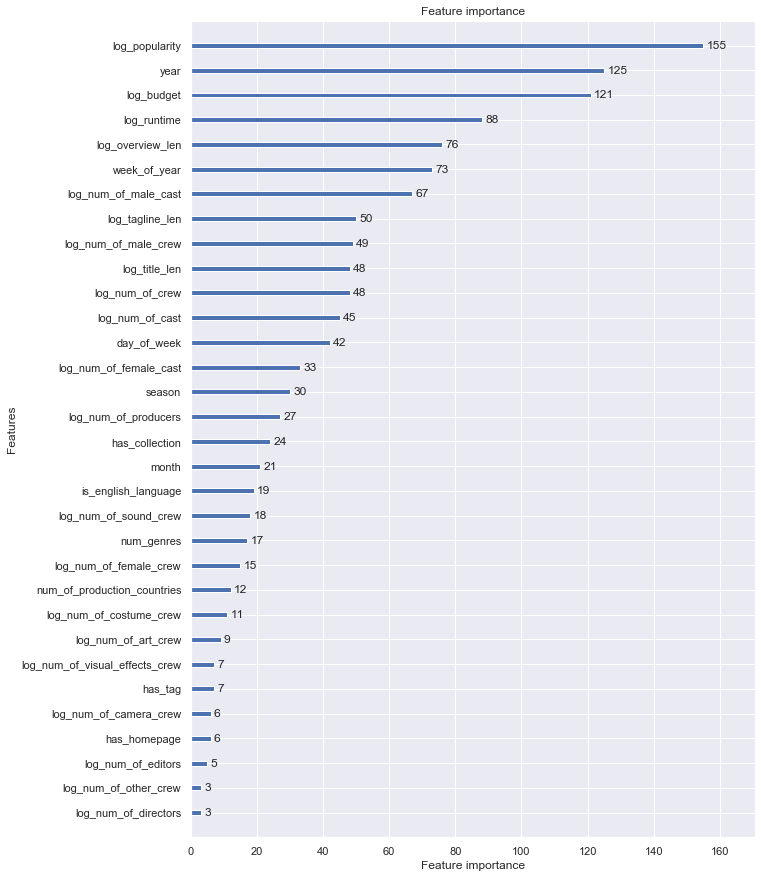

In [261]:
lgb.plot_importance(model_lgb)

### Tuning the LightGBM

In [299]:
def bayesian_tuning_lgb(xtrain, ytrain):
    
    from skopt import BayesSearchCV    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(estimator = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs = -1, verbose=-1),
                                   search_spaces = {'num_leaves': (10, 100), 'min_data_in_leaf': (10, 100),
                                                    'n_estimators': (50, 100), 'max_depth': (3, 12),
                                                    'learning_rate': (0.01, 0.2, 'log-uniform'),
#                                                     "feature_fraction": (0.1, 1, 'uniform'),
#                                                     "bagging_fraction": (0.1, 1, 'uniform'),
                                                    'lambda_l1': (1, 10, 'log-uniform'),
                                                    'lambda_l2': (1, 10, 'log-uniform')},
                                   cv = KFold(n_splits=kfold_splits, shuffle=True, random_state=42),
                                   scoring = 'neg_mean_squared_error', n_jobs = -1, n_iter = 12, verbose = 0, refit = True,
                                   random_state = 42)

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(len(all_models), np.round(bayes_cv_tuner.best_score_, 4),
                                                                    bayes_cv_tuner.best_params_))
        
    result_lgbm = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_lgbm

In [300]:
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_lgbm = bayesian_tuning_lgb(xtrain, ytrain)

Model #1
Best score: -4.7567
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #2
Best score: -4.7567
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #3
Best score: -4.7567
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #4
Best score: -4.7446
Best params: OrderedDict([('lambda_l1', 8), ('lambda_l2', 3), ('learning_rate', 0.059989768591227254), ('max_depth', 10), ('min_data_in_leaf', 57), ('n_estimators', 55), ('num_leaves', 78)])

Model #5
Best score: -4.72
Best params: OrderedDict([('lambda_l1', 8), ('lambda_l2', 5), ('learning_rate', 0.0484338201564

In [301]:
result_lgbm.best_params_

OrderedDict([('lambda_l1', 1),
             ('lambda_l2', 8),
             ('learning_rate', 0.09213636741693375),
             ('max_depth', 5),
             ('min_data_in_leaf', 62),
             ('n_estimators', 64),
             ('num_leaves', 38)])

### LGBM training after tuning

In [ ]:
params = {'num_leaves': result_lgbm.best_params_["num_leaves"],
          'min_data_in_leaf': result_lgbm.best_params_["min_data_in_leaf"],
          'max_depth': result_lgbm.best_params_["max_depth"],
          'learning_rate': result_lgbm.best_params_["learning_rate"],
          "boosting": "gbdt",
          #"feature_fraction": result_lgbm.best_params_["feature_fraction"],
          "bagging_freq": 1,
          #"bagging_fraction": result_lgbm.best_params_["bagging_fraction"],
          "bagging_seed": 11,
          "metric": 'rmse',
          "lambda_l1": result_lgbm.best_params_["lambda_l1"],
          "lambda_l2": result_lgbm.best_params_["lambda_l2"],
          "verbosity": -1}

In [303]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state = 42, test_size = 0.2)

predictions_test_lgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits = num_of_splits, shuffle = False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_tuned = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
    model_lgb_tuned.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                        eval_metric='rmse', verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_test_lgb_tuned += model_lgb_tuned.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.906496	valid_1's rmse: 2.03422
[200]	training's rmse: 0.499253	valid_1's rmse: 2.05707
[300]	training's rmse: 0.28641	valid_1's rmse: 2.07778
[400]	training's rmse: 0.170516	valid_1's rmse: 2.08723
[500]	training's rmse: 0.104868	valid_1's rmse: 2.09051
[600]	training's rmse: 0.0648611	valid_1's rmse: 2.09267
[700]	training's rmse: 0.0409589	valid_1's rmse: 2.09503
[800]	training's rmse: 0.0258241	valid_1's rmse: 2.09636
[900]	training's rmse: 0.0167078	valid_1's rmse: 2.09674
[1000]	training's rmse: 0.0109219	valid_1's rmse: 2.097
Early stopping, best iteration is:
[24]	training's rmse: 1.69094	valid_1's rmse: 1.99019
Fold 0 xvalid rmse: 2.1152529984031387
**************************************************

Fold: 1

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.86683	valid_1's rmse: 2.2154
[200]	training's rmse: 0.468575	valid_1's rmse: 2.24918
[3

In [304]:
predictions_test_lgb_tuned = np.expm1(predictions_test_lgb_tuned)
print()
print(predictions_test_lgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2908794.38120754   260921.61681481 12834818.36570298 ...
 37536908.95236896  3281227.96179158   307637.13097532]
OOF Out-of-fold rmse: 2.1145124483798194


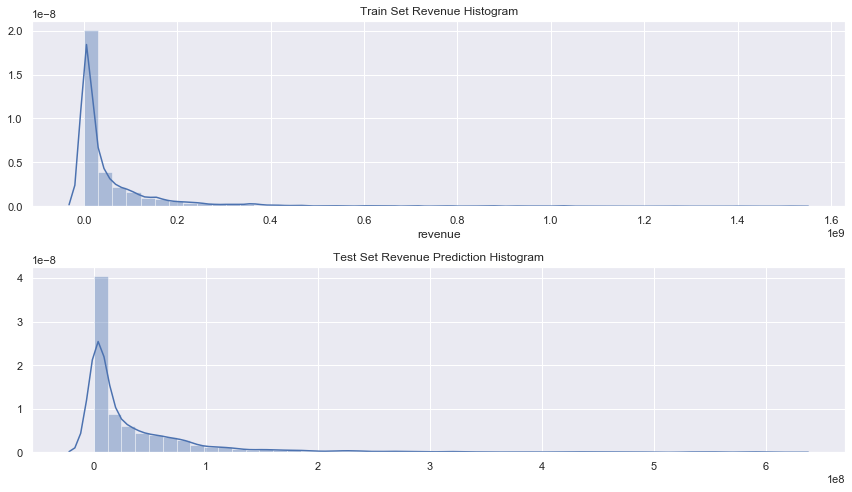

In [305]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_lgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

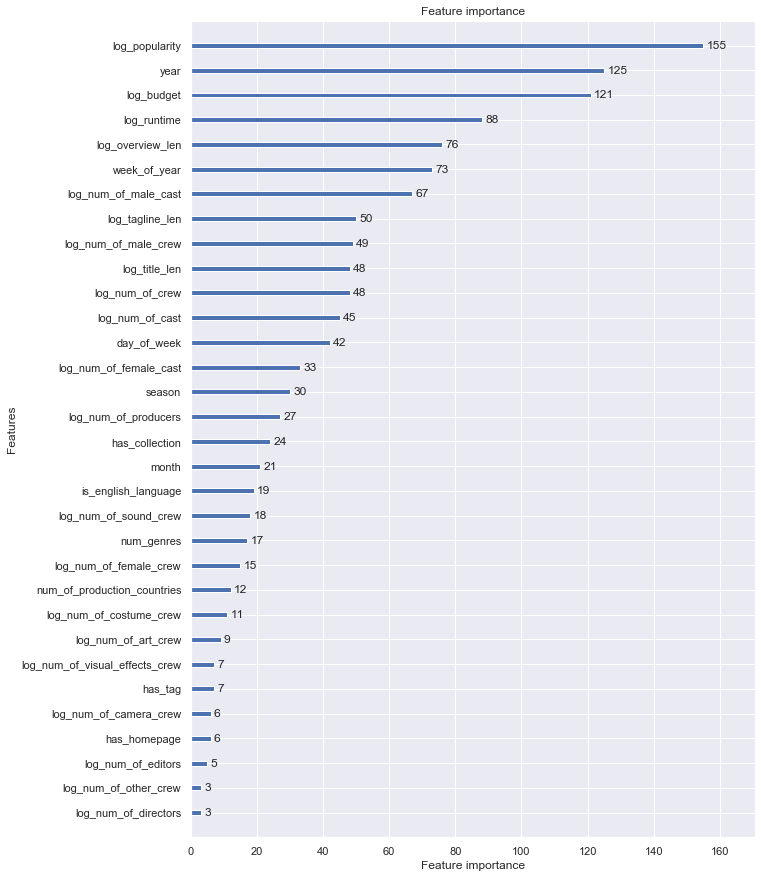

In [306]:
lgb.plot_importance(model_lgb_tuned)

## Feature Selection

### Feature Selection for xgboost

In [308]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 20
sel = SelectFromModel(clf_stra_xgb, max_features = max_selected_features, threshold=0.005, prefit=True)

In [312]:
feature_idx = sel.get_support()

In [315]:
selected_features_xgb = X.columns[feature_idx]

In [316]:
selected_features_xgb

Index(['log_budget', 'log_popularity', 'log_runtime', 'day_of_week', 'year',
       'month', 'week_of_year', 'season', 'num_of_production_countries',
       'log_num_of_cast', 'log_num_of_female_cast', 'has_collection',
       'has_tag', 'is_english_language', 'log_num_of_male_crew',
       'log_num_of_female_crew', 'log_num_of_editors',
       'log_num_of_costume_crew', 'log_num_of_camera_crew',
       'log_num_of_other_crew'],
      dtype='object')

### Baseline XGBoost with Feature Selection

In [318]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_xgb], y, random_state = 42, test_size = 0.2)

start_time = time.time()

predictions_test_xgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits = num_of_splits, shuffle = False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    
    clf_stra_fs_xgb = xgb.XGBRegressor(n_estimators = 10000, seed = 42, n_jobs = -1)

    clf_stra_fs_xgb.fit(xtrain_stra, ytrain_stra, eval_set = [(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                        early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_fs += clf_stra_fs_xgb.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

[19:49:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.1835	validation_1-rmse:14.2473
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.79664	validation_1-rmse:1.95991
[200]	validation_0-rmse:1.5916	validation_1-rmse:1.97331
[300]	validation_0-rmse:1.4477	validation_1-rmse:1.99433
[400]	validation_0-rmse:1.32816	validation_1-rmse:2.0294
[500]	validation_0-rmse:1.23783	validation_1-rmse:2.05657
[600]	validation_0-rmse:1.14233	validation_1-rmse:2.08342
[700]	validation_0-rmse:1.05827	validation_1-rmse:2.10017
[800]	validation_0-rmse:0.980134	validation_1-rmse:2.1215
[900]	validation_0-rmse:0.912312	validation_1-rmse:2.13429
[1000]	validation_0-rmse:0.856745	validation_1-rmse:2.14135
[1100]	validation_0-rmse:0.806662	validation_1-rmse:2.15139
Stopping. Best it

In [319]:
predictions_test_xgb_fs = np.expm1(predictions_test_xgb_fs)
print(predictions_test_xgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

[  881200.93640327   162020.92988546  5445048.62518403 ...
 52242436.25849339  5452080.32360632   783913.01969138]
OOF Out-of-fold rmse: 2.061138312481158


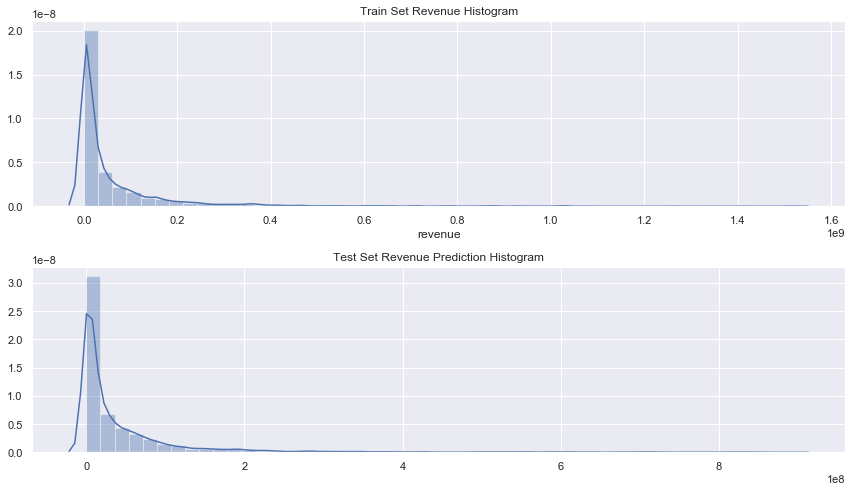

In [320]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_xgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

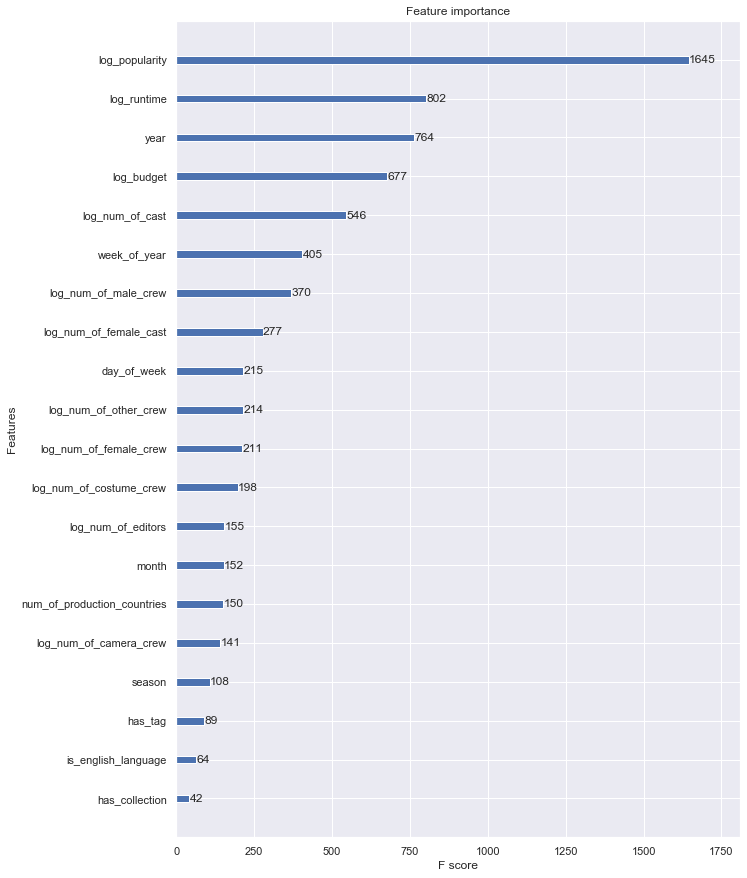

In [321]:
xgb.plot_importance(clf_stra_fs_xgb)

### Tuning with feature Selection

In [322]:
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -13.9085
Best params: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('learning_rate', 0.8567773934012717), ('max_depth', 5), ('min_child_weight', 7), ('n_estimators', 154), ('reg_alpha', 0.050334141977735516), ('reg_lambda', 8), ('subsample', 0.37401697993285554)])

Model #2
Best score: -5.2035
Best params: OrderedDict([('colsample_bylevel', 0.8390144719977516), ('colsample_bytree', 0.8844821246070537), ('learning_rate', 0.20109909209436555), ('max_depth', 12), ('min_child_weight', 9), ('n_estimators', 66), ('reg_alpha', 0.018906758484967926), ('reg_lambda', 4), ('subsample', 0.6721561916912533)])

Model #3
Best score: -5.012
Best params: OrderedDict([('colsample_bylevel', 0.4503841871781403), ('colsample_bytree', 0.9195352964526833), ('learning_rate', 0.12730901516699064), ('max_depth', 6), ('min_child_weight', 2), ('n_estimators', 163), ('reg_alpha', 0.020459551449165617), ('reg_lambda', 8), ('subsample', 0.6016

### XGBoost training with Feature Selection and tuning

In [324]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_xgb], y, random_state=42, test_size=0.2)

predictions_test_xgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle = False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    
    clf_stra_fs_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    #gamma = result.best_params_["gamma"],                 
                                    learning_rate = result.best_params_["learning_rate"],
                                    max_depth = result.best_params_["max_depth"],
                                    min_child_weight = result.best_params_["min_child_weight"],
                                    n_estimators = 10000,
                                    reg_alpha = result.best_params_["reg_alpha"],
                                    reg_lambda = result.best_params_["reg_lambda"],
                                    subsample = result.best_params_["subsample"],
                                    seed = 42,
                                    nthread = -1)

    clf_stra_fs_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set = [(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                              early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_fs_tuned += clf_stra_fs_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

[19:55:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13.5082	validation_1-rmse:13.5766
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.55548	validation_1-rmse:1.9707
[200]	validation_0-rmse:1.18417	validation_1-rmse:2.02003
[300]	validation_0-rmse:0.945801	validation_1-rmse:2.05076
[400]	validation_0-rmse:0.776981	validation_1-rmse:2.07942
[500]	validation_0-rmse:0.63658	validation_1-rmse:2.11811
[600]	validation_0-rmse:0.527552	validation_1-rmse:2.13369
[700]	validation_0-rmse:0.442549	validation_1-rmse:2.14701
[800]	validation_0-rmse:0.371624	validation_1-rmse:2.15394
[900]	validation_0-rmse:0.312913	validation_1-rmse:2.16593
[1000]	validation_0-rmse:0.267747	validation_1-rmse:2.17357
Stopping. Best iteration:
[72]	validation_0-rmse:1.67909	validation_1-

In [325]:
predictions_test_xgb_fs_tuned = np.expm1(predictions_test_xgb_fs_tuned)
print(predictions_test_xgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

[ 1758260.8976025    231214.33381911  7267061.39542166 ...
 57002590.64237457  8212523.70455863  1110491.39448473]
OOF Out-of-fold rmse: 2.0626688079718702


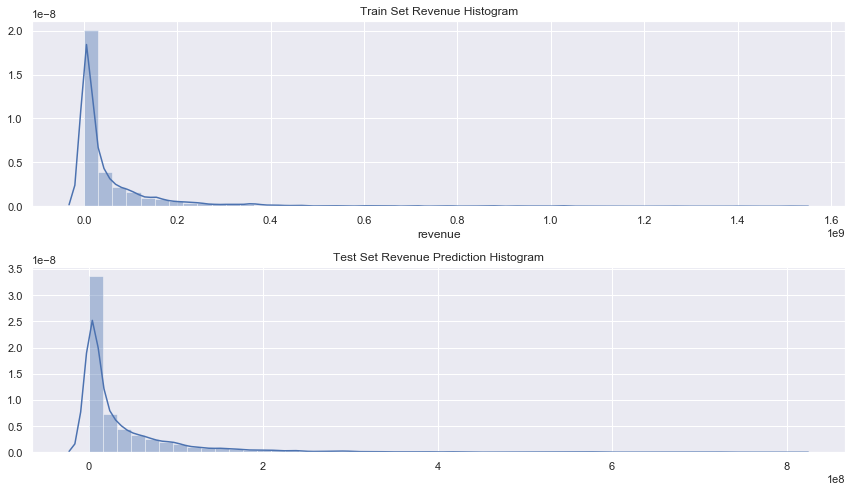

In [326]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_xgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

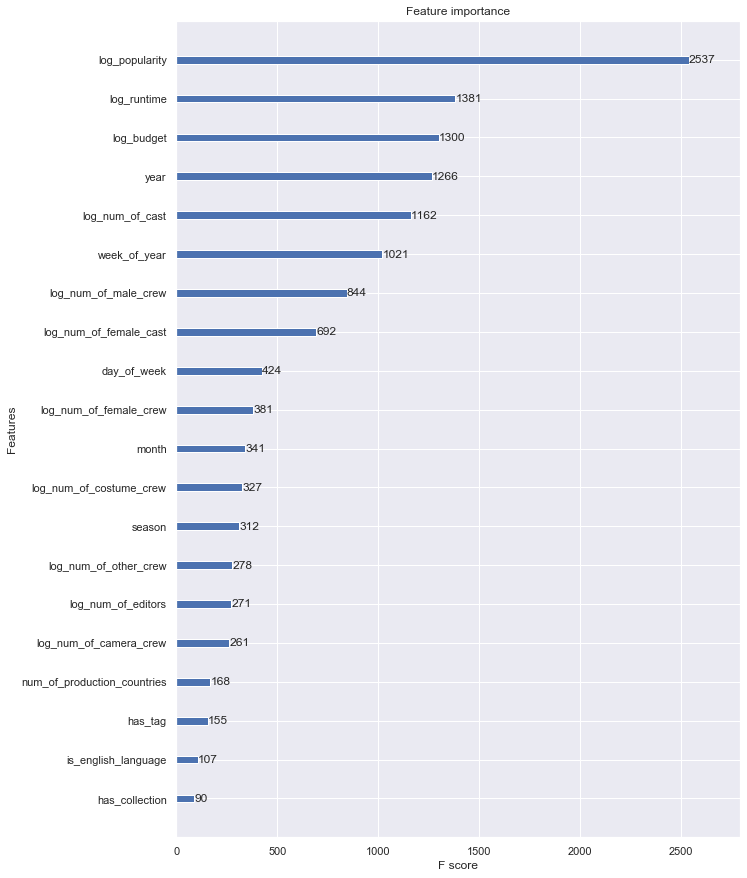

In [327]:
xgb.plot_importance(clf_stra_fs_tuned_xgb)

### Feature Selection for LGBM

In [328]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 20
sel = SelectFromModel(model_lgb, max_features = max_selected_features, threshold=0.005, prefit=True)

In [329]:
feature_idx = sel.get_support()

In [330]:
feature_idx

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True, False, False, False, False, False])

In [331]:
selected_features_lgb = X.columns[feature_idx]

In [332]:
selected_features_lgb

Index(['log_budget', 'log_popularity', 'log_runtime', 'day_of_week', 'year',
       'month', 'week_of_year', 'season', 'log_num_of_cast',
       'log_num_of_male_cast', 'log_num_of_female_cast', 'has_collection',
       'is_english_language', 'log_num_of_crew', 'log_num_of_male_crew',
       'log_title_len', 'log_overview_len', 'log_tagline_len',
       'log_num_of_producers', 'log_num_of_sound_crew'],
      dtype='object')

### Baseline LGB Training with Feature Selection

In [333]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

params = {"metric": 'rmse', "verbosity": -1}

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_lgb], y, random_state = 42, test_size=0.2)

predictions_test_lgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_fs = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
    model_lgb_fs.fit(xtrain_stra, ytrain_stra, eval_set = [(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                     eval_metric = 'rmse', verbose = 100, early_stopping_rounds = 1000)

    predictions_valid = model_lgb_fs.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_lgb_fs += model_lgb_fs.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.94556	valid_1's rmse: 2.00587
[200]	training's rmse: 0.541303	valid_1's rmse: 2.02985
[300]	training's rmse: 0.32859	valid_1's rmse: 2.04169
[400]	training's rmse: 0.205462	valid_1's rmse: 2.04563
[500]	training's rmse: 0.129167	valid_1's rmse: 2.05656
[600]	training's rmse: 0.0830182	valid_1's rmse: 2.05934
[700]	training's rmse: 0.0535625	valid_1's rmse: 2.06064
[800]	training's rmse: 0.0349595	valid_1's rmse: 2.06209
[900]	training's rmse: 0.0227706	valid_1's rmse: 2.06232
[1000]	training's rmse: 0.0151333	valid_1's rmse: 2.06226
Early stopping, best iteration is:
[25]	training's rmse: 1.67317	valid_1's rmse: 1.94311
Fold 0 xvalid rmse: 2.1103561486250095
**************************************************

Fold: 1

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 0.908436	valid_1's rmse: 2.2031
[200]	training's rmse: 0.520819	valid_1's rmse: 2.23406


In [334]:
predictions_test_lgb_fs = np.expm1(predictions_test_lgb_fs)
print()
print(predictions_test_lgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2646040.2218706    317996.0485546  12423266.00291447 ...
 36906130.87922417  3913595.99554496   430526.02568225]
OOF Out-of-fold rmse: 2.1049708056031617


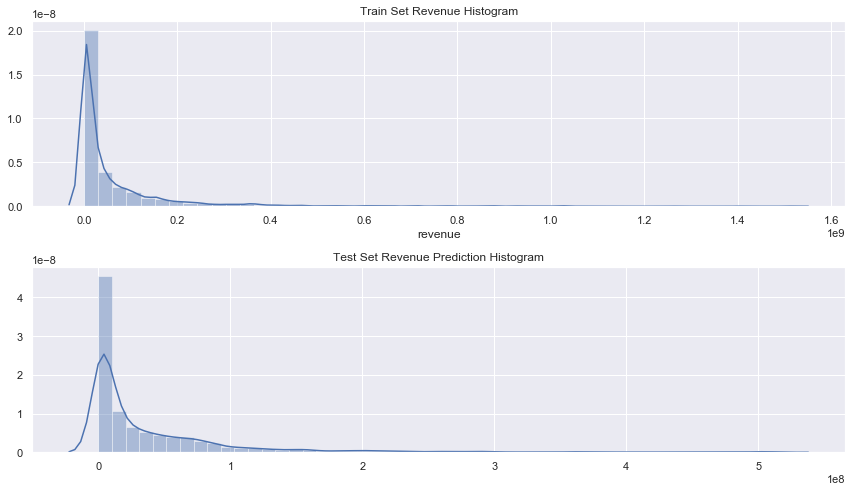

In [335]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_lgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

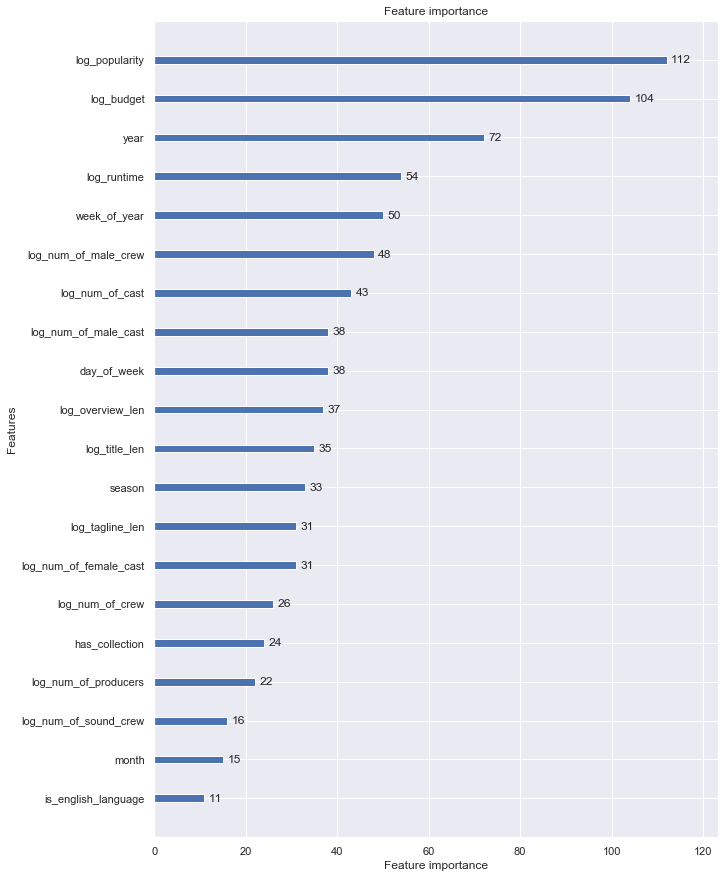

In [336]:
lgb.plot_importance(model_lgb_fs)

### LGB Tuning with Feature Selection

In [337]:
result_lgb = bayesian_tuning_lgb(xtrain, ytrain)

Model #1
Best score: -4.7434
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #2
Best score: -4.7434
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #3
Best score: -4.7434
Best params: OrderedDict([('lambda_l1', 5), ('lambda_l2', 8), ('learning_rate', 0.16356457461011642), ('max_depth', 6), ('min_data_in_leaf', 70), ('n_estimators', 71), ('num_leaves', 42)])

Model #4
Best score: -4.7328
Best params: OrderedDict([('lambda_l1', 8), ('lambda_l2', 3), ('learning_rate', 0.059989768591227254), ('max_depth', 10), ('min_data_in_leaf', 57), ('n_estimators', 55), ('num_leaves', 78)])

Model #5
Best score: -4.7076
Best params: OrderedDict([('lambda_l1', 8), ('lambda_l2', 5), ('learning_rate', 0.04843382015

### LGB Training after Feature Selection and Tuning

In [338]:
params = {'num_leaves': result_lgbm.best_params_["num_leaves"],
          'min_data_in_leaf': result_lgbm.best_params_["min_data_in_leaf"],
          'max_depth': result_lgbm.best_params_["max_depth"],
          'learning_rate': result_lgbm.best_params_["learning_rate"],
          "boosting": "gbdt",
          #"feature_fraction": result_lgbm.best_params_["feature_fraction"],
          "bagging_freq": 1,
          #"bagging_fraction": result_lgbm.best_params_["bagging_fraction"],
          "bagging_seed": 11,
          "metric": 'rmse',
          "lambda_l1": result_lgbm.best_params_["lambda_l1"],
          "lambda_l2": result_lgbm.best_params_["lambda_l2"],
          "verbosity": -1}

In [339]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_lgb], y, random_state=42, test_size=0.2)

predictions_test_lgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_fs_tuned = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
    model_lgb_fs_tuned.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
                           eval_metric='rmse', verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb_fs_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_test_lgb_fs_tuned += model_lgb_fs_tuned.predict(test_df[xtrain.columns])/num_of_splits
    print('*'*50)


Fold: 0

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 1.75605	valid_1's rmse: 1.96682
[200]	training's rmse: 1.52759	valid_1's rmse: 1.95237
[300]	training's rmse: 1.35602	valid_1's rmse: 1.96296
[400]	training's rmse: 1.2389	valid_1's rmse: 1.97889
[500]	training's rmse: 1.11917	valid_1's rmse: 1.98958
[600]	training's rmse: 1.02096	valid_1's rmse: 2.01429
[700]	training's rmse: 0.927781	valid_1's rmse: 2.03195
[800]	training's rmse: 0.847668	valid_1's rmse: 2.05275
[900]	training's rmse: 0.790939	valid_1's rmse: 2.06076
[1000]	training's rmse: 0.729994	valid_1's rmse: 2.07821
[1100]	training's rmse: 0.675458	valid_1's rmse: 2.08984
Early stopping, best iteration is:
[193]	training's rmse: 1.53903	valid_1's rmse: 1.95111
Fold 0 xvalid rmse: 2.104789552675134
**************************************************

Fold: 1

Training until validation scores don't improve for 1000 rounds
[100]	training's rmse: 1.70803	valid_1's rmse: 2.1822
[200]	trai

In [340]:
predictions_test_lgb_fs_tuned = np.expm1(predictions_test_lgb_fs_tuned)
print()
print(predictions_test_lgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)


[ 2385160.33797538   218443.75045365 11534174.40680218 ...
 43634333.12774913  2725401.73067504   753015.51772878]
OOF Out-of-fold rmse: 2.1002389635008925


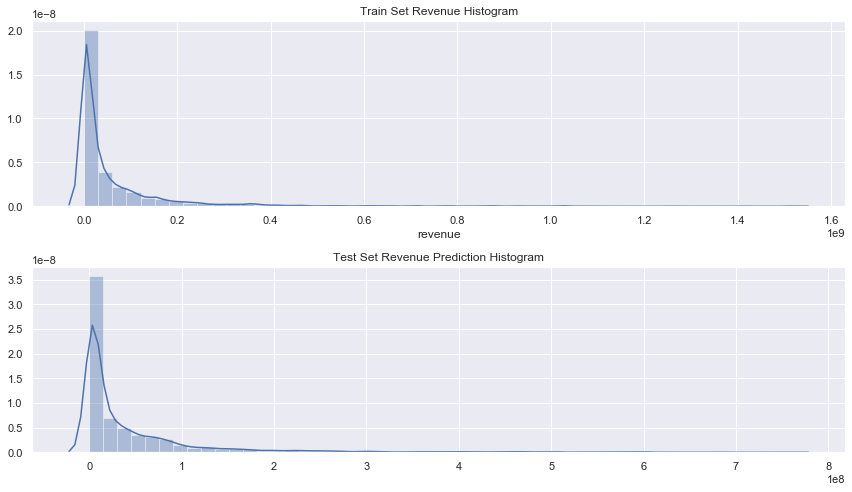

In [341]:
f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})

sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")

sns.distplot(predictions_test_lgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")

f.tight_layout()

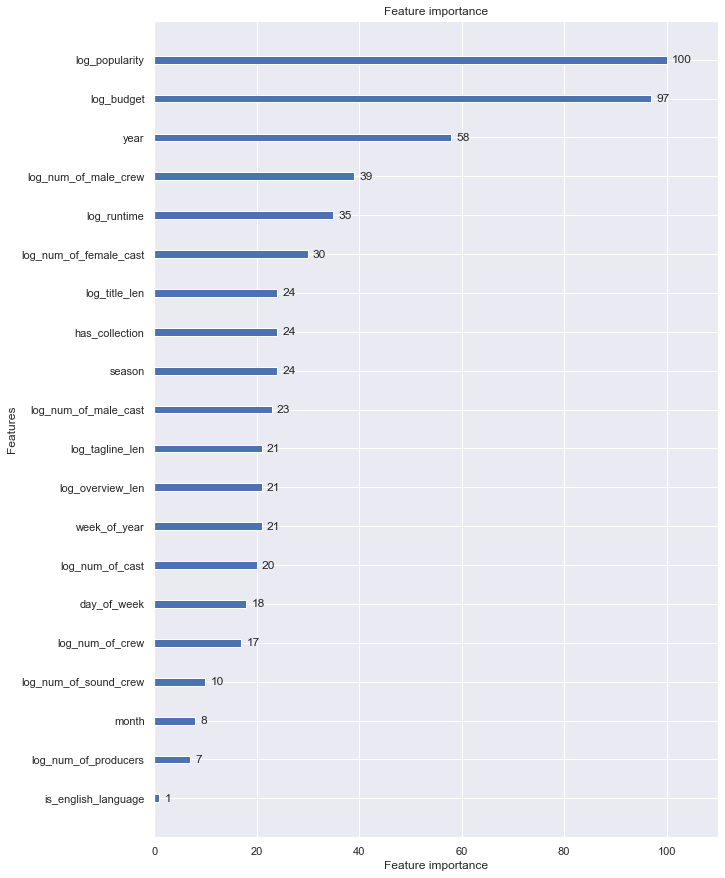

In [342]:
lgb.plot_importance(model_lgb_fs_tuned)

## ML Blends

In [343]:
####### xgb with the other models

predictions_test_xgb_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_random_forest = (0.5 * predictions_test_xgb) + (0.5 * predictions_random_forest_test)
predictions_test_extra_trees_random_forest = (0.5 * predictions_extra_trees_test) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_xgb_extra_trees = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_xgb_random_forest = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_random_forest_tuned_test)
predictions_test_tuned_extra_trees_random_forest = (0.5 * predictions_extra_trees_tuned_test) + (0.5 * predictions_random_forest_tuned_test)

predictions_test_xgb_fs_extra_trees =  (0.5 * predictions_test_xgb_fs) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_fs_tuned_extra_trees = (0.5 * predictions_test_xgb_fs_tuned) + (0.5 * predictions_extra_trees_test)

predictions_test_baseline_xgb_tuned_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_tuned_test)

####### lgb with the other models

predictions_test_lgb_xgb = (0.5 * predictions_test_lgb) + (0.5 * predictions_test_xgb)
predictions_test_tuned_lgb_xgb = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_test_xgb_tuned)

predictions_test_lgb_extra_trees = (0.5 * predictions_test_lgb) + (0.5 * predictions_extra_trees_test)
predictions_test_lgb_random_forest = (0.5 * predictions_test_lgb) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_lgb_extra_trees = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_lgb_random_forest = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_random_forest_tuned_test)

predictions_test_xgb_fs_lgb =  (0.5 * predictions_test_xgb_fs) + (0.5 * predictions_test_lgb_fs)
predictions_test_xgb_fs_tuned_lgb = (0.5 * predictions_test_xgb_fs_tuned) + (0.5 * predictions_test_lgb_fs_tuned)


predictions_test_baseline_lgb_tuned_extra_trees = (0.5 * predictions_test_lgb) + (0.5 * predictions_extra_trees_tuned_test)

## Preparing for submission

In [344]:
# xgb baseline
submission = pd.read_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\sample_submission.csv')
submission['revenue'] = predictions_test_xgb
submission.to_csv('E:\\IIT Kanpur\\IME 1st Sem Courses\\IME672 - DM&KD\\Dataset\\tmdb-box-office-prediction\\\\clf_xgb_baseline.csv', index=False)

In [ ]:
# xgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_tuned
submission.to_csv('clf_xgb_tuned.csv', index=False)

# lgb baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb
submission.to_csv('clf_lgb_baseline.csv', index=False)

# lgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_tuned
submission.to_csv('clf_lgb_tuned.csv', index=False)

# extra trees baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_test
submission.to_csv('clf_extra_trees_baseline.csv', index=False)

# extra trees tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_tuned_test
submission.to_csv('clf_extra_trees_tuned.csv', index=False)

# xgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs
submission.to_csv('clf_xgb_fs_baseline.csv', index=False)

# xgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned
submission.to_csv('clf_xgb_fs_tuned.csv', index=False)

# lgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_fs
submission.to_csv('clf_lgb_fs_baseline.csv', index=False)

# lgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_fs_tuned
submission.to_csv('clf_lgb_fs_tuned.csv', index=False)

# Blend 1
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_baselines.csv', index=False)

# Blend 2
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_baselines.csv', index=False)

# Blend 3
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_baselines.csv', index=False)

# Blend 4
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_tuned.csv', index=False)

# Blend 5
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_tuned.csv', index=False)

# Blend 6
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_tuned.csv', index=False)

# Blend 7
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_baseline_xgb_tuned_extra_trees
submission.to_csv('blend_baseline_xgb_tuned_extra_trees.csv', index=False)

# Blend 8
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_extra_trees
submission.to_csv('blend_xgb_fs_extra_trees.csv', index=False)

# Blend 9
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned_extra_trees
submission.to_csv('blend_xgb_fs_tuned_extra_trees.csv', index=False)

# Blend 10
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_xgb
submission.to_csv('blend_lgb_xgb.csv', index=False)

# Blend 11
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_xgb
submission.to_csv('blend_tuned_lgb_xgb.csv', index=False)

# Blend 12
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 13
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 14
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_random_forest
submission.to_csv('blend_tuned_lgb_random_forest.csv', index=False)

# Blend 15
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 16
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_random_forest
submission.to_csv('blend_tuned_lgb_random_forest.csv', index=False)

# Blend 17
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_baseline_lgb_tuned_extra_trees
submission.to_csv('blend_baseline_lgb_tuned_extra_trees.csv', index=False)

# Blend 18
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_lgb
submission.to_csv('blend_xgb_fs_lgb.csv', index=False)

# Blend 19
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned_lgb
submission.to_csv('blend_xgb_fs_tuned_lgb.csv', index=False)


#### *Thank for your time! Any suggestions are welcomed on how to improve my models performance*